<h1><i><b> Super Market Data Analysis. </i></b></h1>

<h1>This is our academic group project for Data Mining (Subject Code:ITE355)
Instructor: Ajarn. Atikom Srivallop</h1>


<h3>A supermarket is self-service shop offering a wide variety of food, beverages and household products, organized into sections. This project is going to analyze Supermarket Sales Dataset collected from<a href=" https://www.kaggle.com/aungpyaeap/supermarket-sales"> Kaggle: Click here to Visit Dataset Source</a></h3>

<br>This dataset has 17 columns and 1000 rows,
This dataset has 3 months data starting from January-March 
Also it has 3 branches data naming A,B,C from 3 different cities Yangon, Naypyitaw and Mandalay.

This project is going to analyze thorugh differetn models to find customer behavior in Supermarket.
We will be using Data Mining Techniques for that. 

<img src = "https://www.bereketinvestment.com/images/111X1250X600X1/1.1939257985995600424afa.jpg" width="500" height="500">

There will be 5 stages involved in this project:
    1. Preprocessing
    2. Data Visulizationn
    3. Data Analysis
    4. Model Creation 
    5. Discussion and Conclusion

# Stage-1: Data Preprocessing

In [1]:
#Dataset Source: https://www.kaggle.com/aungpyaeap/supermarket-sales
# This Python 3 environment comes with many helpful analytics libraries installed


#Import Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
import statsmodels.tsa.api as smt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults
from datetime import datetime
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['font.size'] = 15
from typing import Dict, List
from datetime import datetime, timedelta
plt.style.use("ggplot")
from matplotlib.colors import ListedColormap


# Aliases
from pandas.core.series import Series
np.random.seed(10000) # Inital seeding
from pandas import Timestamp
from pandas.core.frame import DataFrame

#Set style
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

#To ignore some unimportant arnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
sales = pd.read_csv(r"C:\Users\tahmi\Documents\GitHub\DataMiningGroupProject\supermarket_sales.csv")

In [3]:
#checking headings
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
#checking data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime

# Changing Data Types

In [5]:
#process of converting date column in ISO format
def to_isoformat(row:Series) -> Series:
    """
    Note: Original date format MM/DD/YYYY, Concat ['Date'] + ['Time']
    This funciton converts the given rows into isoformat 
    :row: given a row vector that contains Date and Time 
    :return: a Series of datetime vectors 
    """
    
    date: Series = row[0].split("/")
    time: Series = row[1]

    date[0] = date[0] if eval(date[0]) >=10 else f"0{date[0]}"
    date[1] = date[1] if eval(date[1]) >=10 else f"0{date[1]}"
    seconds: int = int( np.random.randint(10,60,size=1) ) 
    return datetime.fromisoformat( f"{date[-1]}-{date[0] }-{date[1]}T{time}:{seconds}")
    

In [6]:
def get_col_desc(col_one:List, col_two: List[str]) -> Dict:
    """
    This is a helper function, that return the map description of the given 2 columns 
    :col_one: given a list of column data 
    :col_two: given a list of column names 
    :return: a dictionary that contains column attributes
    """
    if len(col_one) != len(col_two):
        raise ValueError("Column one must be unique.")
    return dict(zip(col_two, col_one ))

In [7]:
#sales['date'] = pd.to_datetime(sales['Date'])
sales['Date'] = pd.to_datetime( sales[['Date','Time']].apply(to_isoformat,axis=1) ) # Concat Date and Time together to see the sale trend
sales.set_index('Date', inplace=True)
sales.drop('Time',inplace=True, axis=1)

In [8]:
#checking the column is not object
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
#verify result
sales.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                                       
2019-01-05 13:08:22  750-67-8428      A     Yangon        Member  Female   
2019-03-08 10:29:41  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03 13:23:50  631-41-3108      A     Yangon        Normal    Male   
2019-01-27 20:33:57  123-19-1176      A     Yangon        Member    Male   
2019-02-08 10:37:12  373-73-7910      A     Yangon        Normal    Male   

                               Product line  Unit price  Quantity   Tax 5%  \
Date                                                                         
2019-01-05 13:08:22       Health and beauty       74.69         7  26.1415   
2019-03-08 10:29:41  Electronic accessories       15.28         5   3.8200   
2019-03-03 13:23:50      Home and lifestyle       46.33         7  16.2155   
2019-01-27 20:33:57       Health and beauty       58.22         8  23.2880   
2019-02-08 10:37:12       Sports and travel       86.31         7  30.2085   

                        Total      Payment    cogs  gross margin percentage  \
Date                                                                          
2019-01-05 13:08:22  548.9715      Ewallet  522.83                 4.761905   
2019-03-08 10:29:41   80.2200         Cash   76.40                 4.761905   
2019-03-03 13:23:50  340.5255  Credit card  324.31                 4.761905   
2019-01-27 20:33:57  489.0480      Ewallet  465.76                 4.761905   
2019-02-08 10:37:12  634.3785      Ewallet  604.17                 4.761905   

                     gross income  Rating  
Date                                       
2019-01-05 13:08:22       26.1415     9.1  
2019-03-08 10:29:41        3.8200     9.6  
2019-03-03 13:23:50       16.2155     7.4  
2019-01-27 20:33:57       23.2880     8.4  
2019-02-08 10:37:12       30.2085     5.3

## So now we can see that our Date and Timme column is gone and we set date,time as index

In [10]:
#data description
sales.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.220360e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

# Checking Missing Values

In [11]:
#check for missing values
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Stage-2: Data Visualization

## Now we try to look for Dataset columns to visualize and we can understand more about the dataset

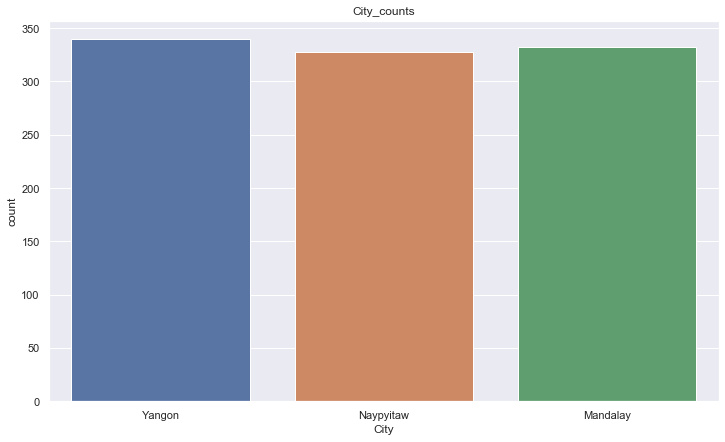

In [12]:
#Count function for cities
sns.set(style="darkgrid")       #style the plot background to become a grid
cityCount  = sns.countplot(x="City", data =sales).set_title("City_counts")

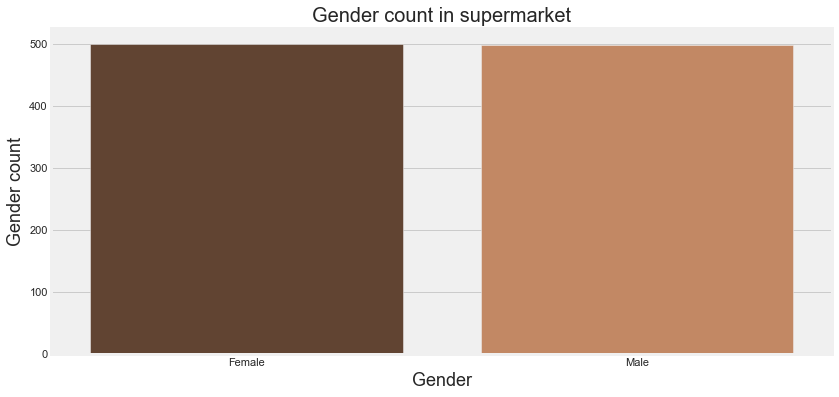

In [13]:
#Gender Count
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=sales , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

In [14]:
#Calculate Gender
sales.groupby(['Gender']). agg({'Total':'sum'})

Total
Gender            
Female  167882.925
Male    155083.824

Text(0, 0.5, 'Customer Count')

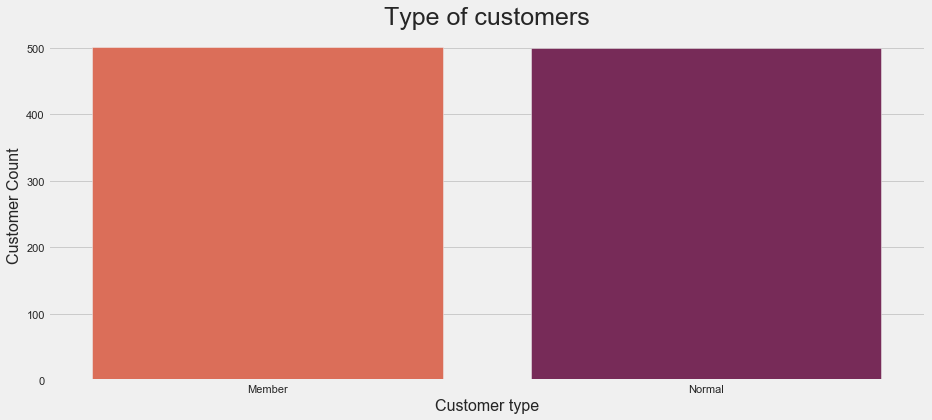

In [15]:
#Count Customer Type
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "Customer type", data = sales, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 25)
ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)

Text(0, 0.5, 'Customer Count')

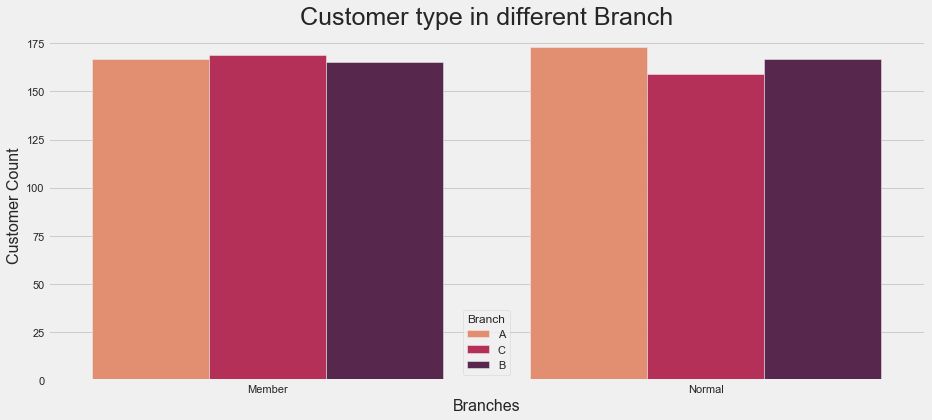

In [16]:
#Check Customer Type in Different Branch
plt.figure(figsize=(14,6))
ax = sns.countplot(x = "Customer type", hue = "Branch", data = sales, palette= "rocket_r")
ax.set_title(label = "Customer type in different Branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

Text(0.5, 1.0, 'Ratings by Branch')

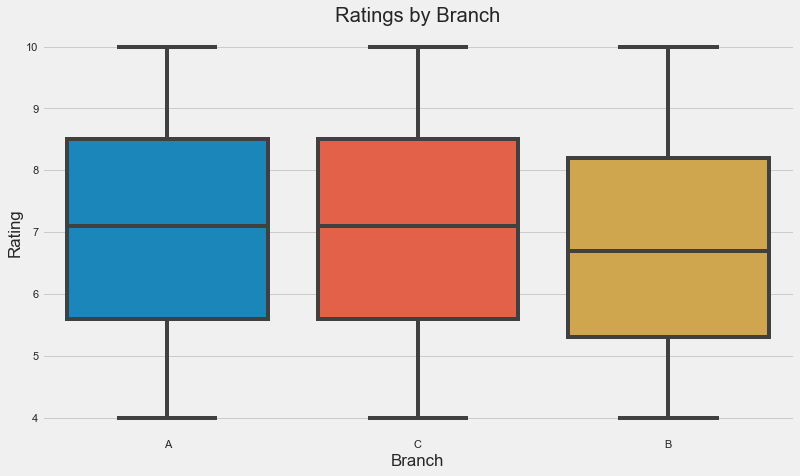

In [17]:
#Checking Ratings of each bracnch 
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch")

Branch B has the lowest rating among all the branches

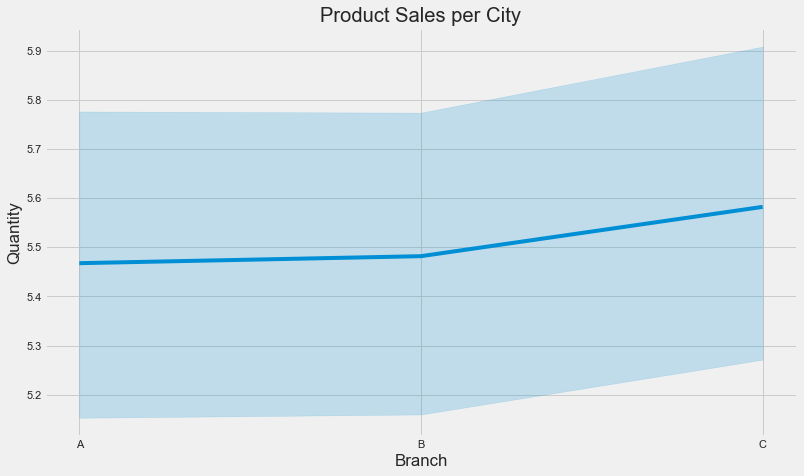

In [18]:
#Checking Product Sale per City
genderCount  = sns.lineplot(x="Branch",  y = 'Quantity',data =sales).set_title("Product Sales per City")

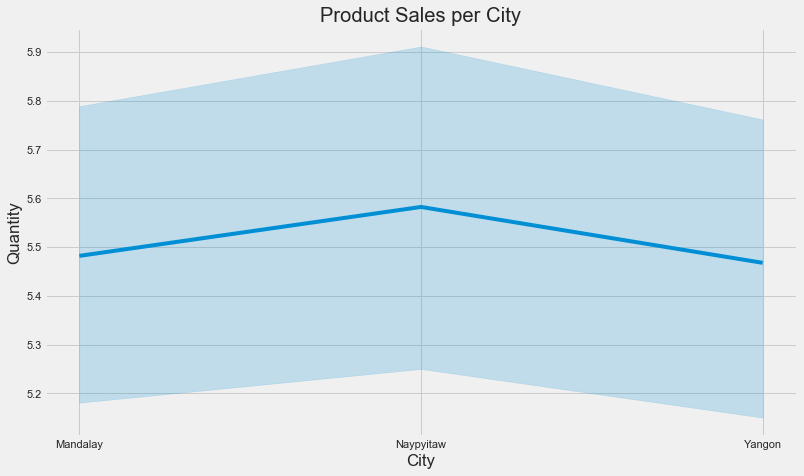

In [19]:
#Checking Product Sales per city
genderCount  = sns.lineplot(x="City",  y = 'Quantity',data =sales).set_title("Product Sales per City")

Text(0, 0.5, 'Rating distribution')

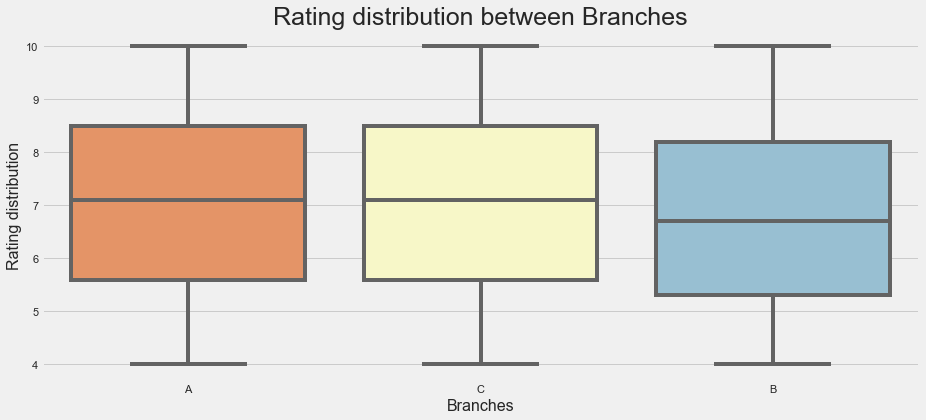

In [20]:
#Rating of 3 different branches
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =sales, palette= "RdYlBu")
ax.set_title("Rating distribution between Branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

Text(0, 0.5, ' Customer Count')

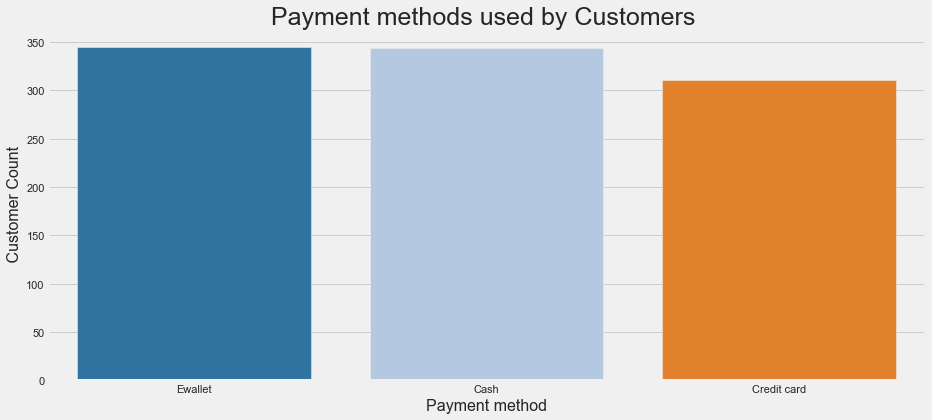

In [21]:
#Checking which payment method is highly used
plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = sales, palette = "tab20")
ax.set_title(label = "Payment methods used by Customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

Text(0, 0.5, 'Peple Count')

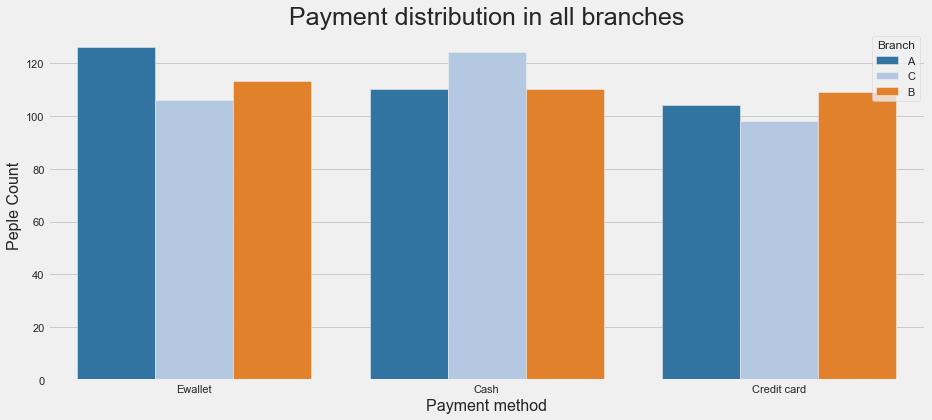

In [22]:
#Check Payments of 3 branches
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Payment", hue = "Branch", data = sales, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

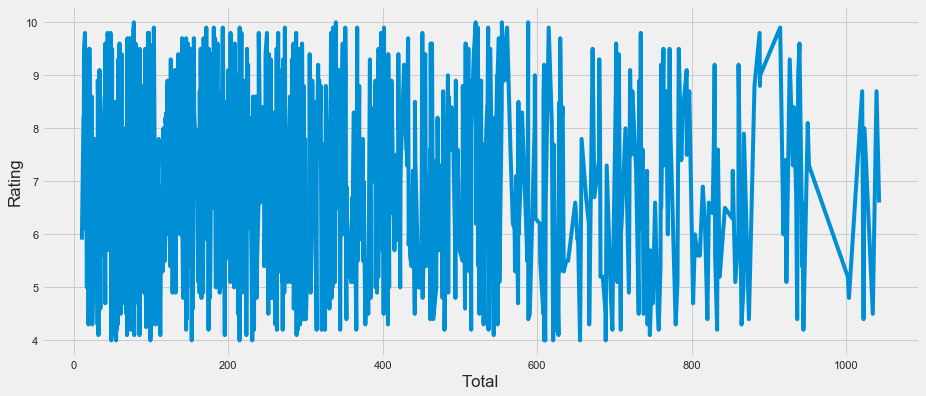

In [23]:
#Cheking the Total Amount of Sale Vs Rating
plt.figure(figsize=(14,6)) 
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=sales)

Text(0, 0.5, 'Product Line')

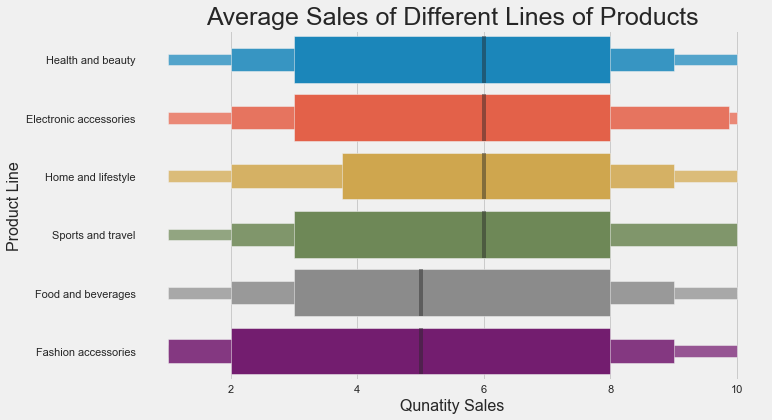

In [24]:
#Average Sales from Product Lines
plt.figure(figsize=(10,6)) 
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = sales,)
ax.set_title(label = "Average Sales of Different Lines of Products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Text(0, 0.5, 'Product Line')

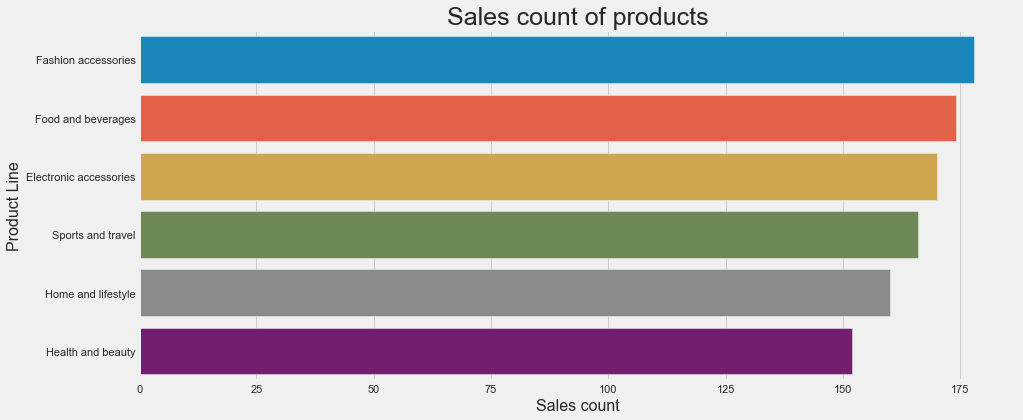

In [25]:
#Sales from each category of Product/Product Line
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=sales, order = sales['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

Text(0, 0.5, 'Product Line')

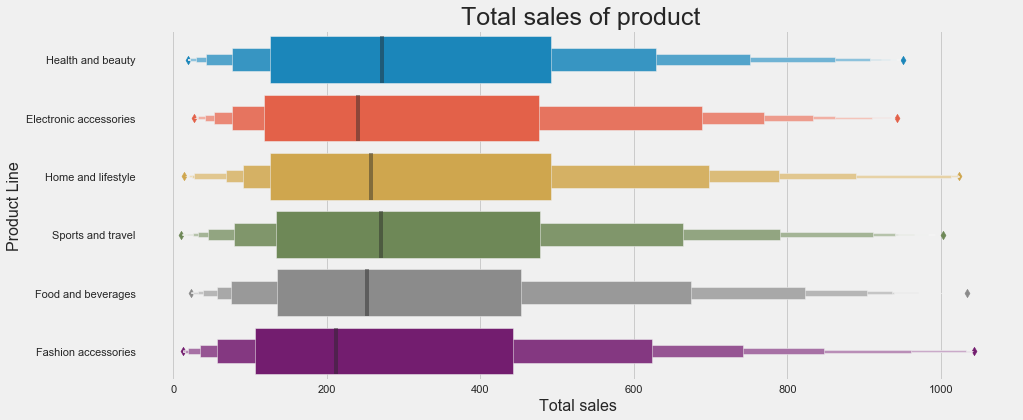

In [26]:
#Total Sales from Product Line in boxplot
plt.figure(figsize=(14,6))
ax = sns.boxenplot(y= "Product line", x= "Total", data = sales)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Text(0, 0.5, 'Product line')

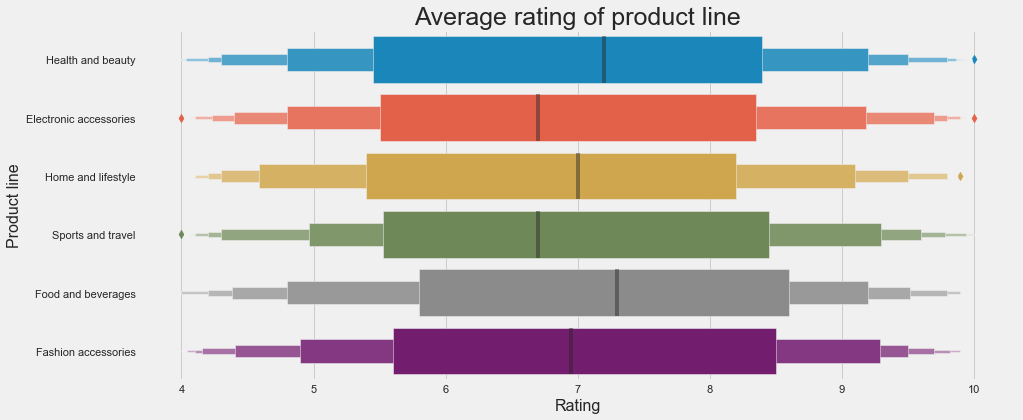

In [27]:
#Checking average ratings of product line
plt.figure(figsize = (14,6))
ax = sns.boxenplot(y = "Product line", x = "Rating", data = sales)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

Text(0, 0.5, 'Product Line')

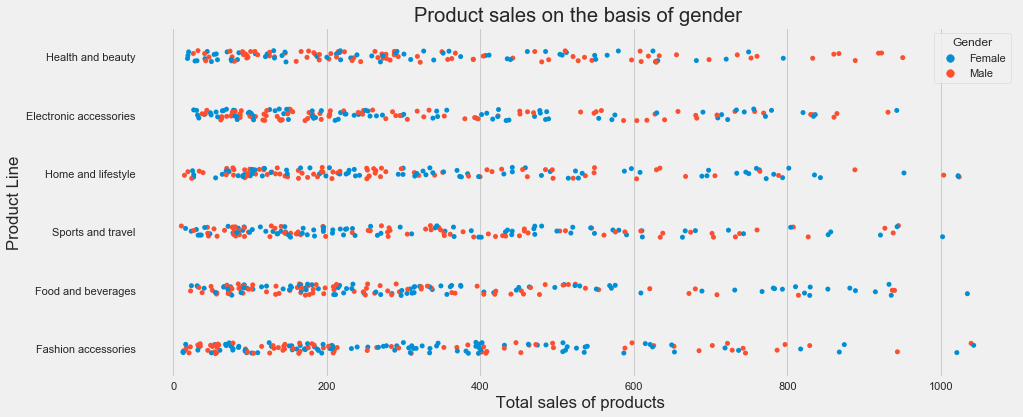

In [28]:
#Product sales on the basis of Gender
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = sales)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

<Figure size 1008x432 with 0 Axes>

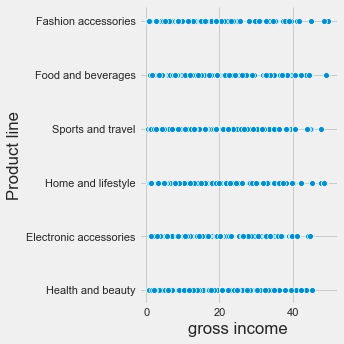

In [29]:
#Checking Gross Income from Product Line
plt.figure(figsize = (14,6))
ax = sns.relplot(y= "Product line", x = "gross income", data = sales)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")

# Data Analysis

In [30]:
#Cheking Correlation
sales.corr() 

Unit price      Quantity        Tax 5%  \
Unit price               1.000000e+00  1.077756e-02  6.339621e-01   
Quantity                 1.077756e-02  1.000000e+00  7.055102e-01   
Tax 5%                   6.339621e-01  7.055102e-01  1.000000e+00   
Total                    6.339621e-01  7.055102e-01  1.000000e+00   
cogs                     6.339621e-01  7.055102e-01  1.000000e+00   
gross margin percentage -6.998957e-16 -3.849075e-16  2.461896e-16   
gross income             6.339621e-01  7.055102e-01  1.000000e+00   
Rating                  -8.777507e-03 -1.581490e-02 -3.644170e-02   

                                Total          cogs  gross margin percentage  \
Unit price               6.339621e-01  6.339621e-01            -6.998957e-16   
Quantity                 7.055102e-01  7.055102e-01            -3.849075e-16   
Tax 5%                   1.000000e+00  1.000000e+00             2.461896e-16   
Total                    1.000000e+00  1.000000e+00             2.408632e-16   
cogs                     1.000000e+00  1.000000e+00             1.439279e-15   
gross margin percentage  2.408632e-16  1.439279e-15             1.000000e+00   
gross income             1.000000e+00  1.000000e+00             2.461896e-16   
Rating                  -3.644170e-02 -3.644170e-02             2.042714e-15   

                         gross income        Rating  
Unit price               6.339621e-01 -8.777507e-03  
Quantity                 7.055102e-01 -1.581490e-02  
Tax 5%                   1.000000e+00 -3.644170e-02  
Total                    1.000000e+00 -3.644170e-02  
cogs                     1.000000e+00 -3.644170e-02  
gross margin percentage  2.461896e-16  2.042714e-15  
gross income             1.000000e+00 -3.644170e-02  
Rating                  -3.644170e-02  1.000000e+00

In [31]:
#Checking Covariance
sales.cov() 

Unit price    Quantity       Tax 5%         Total  \
Unit price                701.965331    0.834778   196.668340   4130.035142   
Quantity                    0.834778    8.546446    24.149570    507.140978   
Tax 5%                    196.668340   24.149570   137.096594   2879.028477   
Total                    4130.035142  507.140978  2879.028477  60459.598018   
cogs                     3933.366802  482.991408  2741.931883  57580.569541   
gross margin percentage     0.000000    0.000000     0.000000      0.000000   
gross income              196.668340   24.149570   137.096594   2879.028477   
Rating                     -0.399668   -0.079456    -0.733300    -15.399306   

                                 cogs  gross margin percentage  gross income  \
Unit price                3933.366802                      0.0    196.668340   
Quantity                   482.991408                      0.0     24.149570   
Tax 5%                    2741.931883                      0.0    137.096594   
Total                    57580.569541                      0.0   2879.028477   
cogs                     54838.637658                      0.0   2741.931883   
gross margin percentage      0.000000                      0.0      0.000000   
gross income              2741.931883                      0.0    137.096594   
Rating                     -14.666006                      0.0     -0.733300   

                            Rating  
Unit price               -0.399668  
Quantity                 -0.079456  
Tax 5%                   -0.733300  
Total                   -15.399306  
cogs                    -14.666006  
gross margin percentage   0.000000  
gross income             -0.733300  
Rating                    2.953518

Text(0.5, 1, 'Heatmap for Correlation between Sales Metrics')

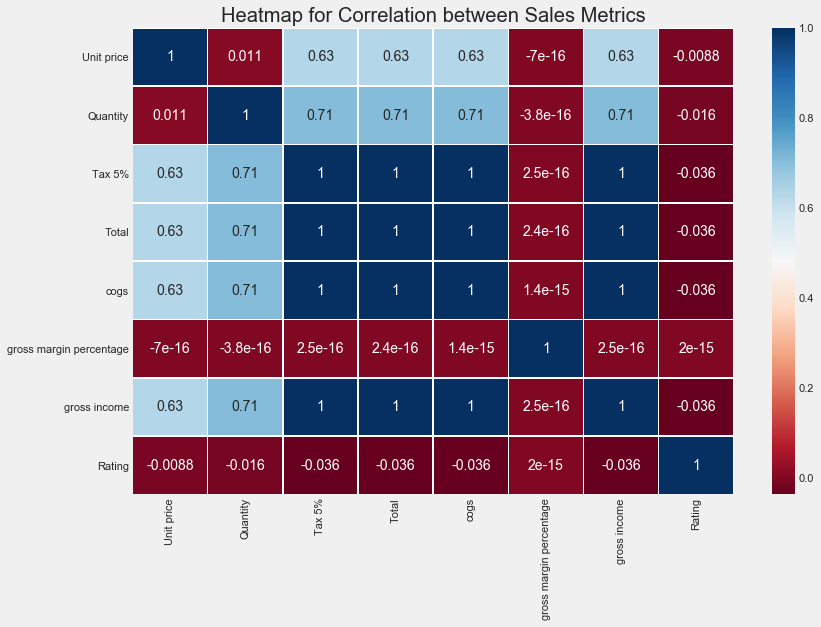

In [32]:
#Heatmap for Correlation between Sales Metrics
plt.figure(figsize=(12,8))
sales_heatmap= sns.heatmap(sales.corr(),annot=True,
                        linewidths=.5,cmap='RdBu')
plt.title('Heatmap for Correlation between Sales Metrics')

## Analysing best performing city branch based on maximum revenue generated

In [33]:
#Analysis of City vs Total
df_test=sales[['City','Total']]
df_grp=df_test.groupby(['City'],as_index=False).sum()
df_grp

City        Total
0   Mandalay  106197.6720
1  Naypyitaw  110568.7065
2     Yangon  106200.3705

**Analysis**

Based on the sum of the 3 branches of the supermarket, Naypyitaw is generating the most sales revenue, followed by Yangon with Mandalay with almost similar revenue.  

In [34]:
#analysing best performing city branch based on gross income generated
df_pro=sales[['City','gross income']]
df_grp1=df_pro.groupby(['City'],as_index=False).sum()
df_grp1

City  gross income
0   Mandalay     5057.0320
1  Naypyitaw     5265.1765
2     Yangon     5057.1605

**Analysis**

Based on the total income generated of the three supermarket, Naypyitaw has generated the maximum profit followed by Mandalay and Yangon with similar incomes.

In [35]:
#analysing the sales revenue for each product line
df_sal=sales[['Product line','Total']]
df_sal_grp= df_sal.groupby('Product line', as_index=False).sum()
df_sal_grp

Product line       Total
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
2      Food and beverages  56144.8440
3       Health and beauty  49193.7390
4      Home and lifestyle  53861.9130
5       Sports and travel  55122.8265

Text(0, 0.5, 'Product Line')

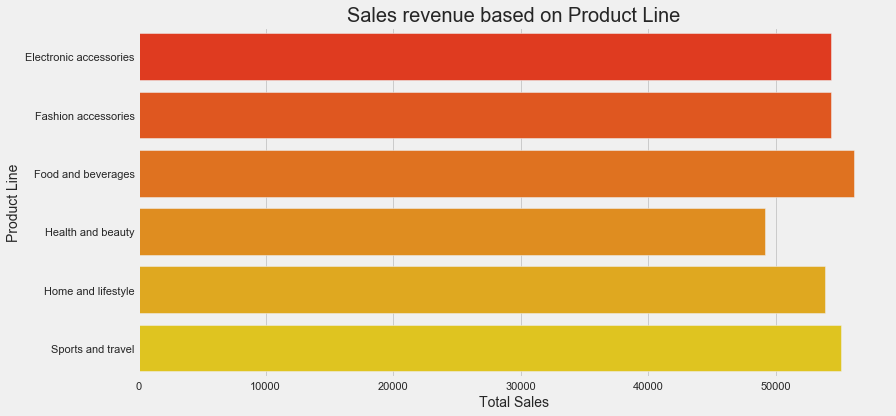

In [36]:
#visualising sales revenue for each product line
plt.figure(figsize=(12,6))
sns.barplot(x='Total',y='Product line',data=df_sal_grp,palette='autumn')
plt.title('Sales revenue based on Product Line',fontsize=20)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Product Line',fontsize=14)

****Analysis****

Based on the above representation we can see that Food and Beverages as brought in the most sales revenue and Health and Beauty products have brought in the least revenue.

Text(0, 0.5, 'Count')

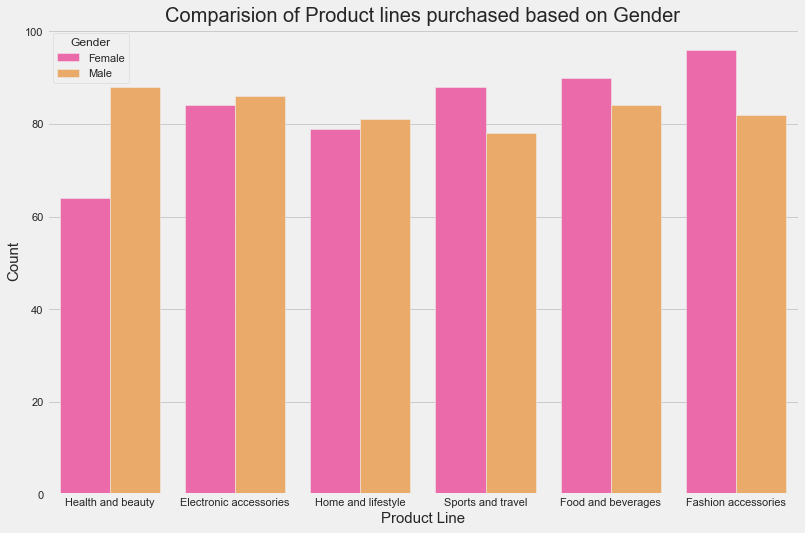

In [37]:
#Comparision of Product lines purchased based on Gender
plt.figure(figsize=(12,8))
sns.countplot(x='Product line', hue='Gender',data= sales, 
              palette='spring')
plt.title('Comparision of Product lines purchased based on Gender',fontsize=20)
plt.xlabel('Product Line',fontsize=15)
plt.ylabel('Count',fontsize=15)

**Analysis**

Based on the representation of the bar graph above, it can be inferred that over the 3 branch locations of the supermarket there are 6 categories of products being sold with categories such as 'Health and Beauty', 'Electronic accessories' and 'Home and Lifestyle' products are more popular categories among men. Whereas, 'Sports and Travel', 'Food and Beverage', 'Fashion Accessories' products are more popular categories among women.

'Health and Beauty' products is the most preferred category of products for Men. Whereas, 'Fashion Accessories' are the most in demand by women as compared to other categories.

In [38]:
#analysing if the sales revenue generated is more through members or normal customers
df_cust=sales[['Customer type','Total']]
df_grp_cust=df_cust.groupby('Customer type',as_index=False).sum()
df_grp_cust

Customer type       Total
0        Member  164223.444
1        Normal  158743.305

In [39]:
#analysing the average spend of members vs normal customers
df_grp_cust_avg=df_cust.groupby('Customer type',as_index=False).mean()
df_grp_cust_avg

Customer type       Total
0        Member  327.791305
1        Normal  318.122856

**Analysis**

From the above analysis it can be concluded that the 'Member customers' of the supermarket bring in more revenue than the normal customers. However the difference isn't very significant between the two. 

Similarly, Member Customers have an average spending of (327.79) higher than the average spending of a Normal customer(318.12)

In [40]:
#analysing the most profitable product line in each of the city branches
df_prof_prod=sales[['City','Product line','gross income']]
df_grp_prof_prod= df_prof_prod.groupby(['City','Product line'], as_index=False).sum()
df_grp_prof_prod_piv= df_grp_prof_prod.pivot(index='City',columns='Product line')
df_grp_prof_prod_piv

gross income                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                   811.9735            781.5865           724.5185   
Naypyitaw                  903.2845           1026.6700          1131.7550   
Yangon                     872.2435            777.7385           817.2905   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay               951.460           835.6745          951.8190  
Naypyitaw              791.206           661.6930          750.5680  
Yangon                 599.893          1067.4855          922.5095

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

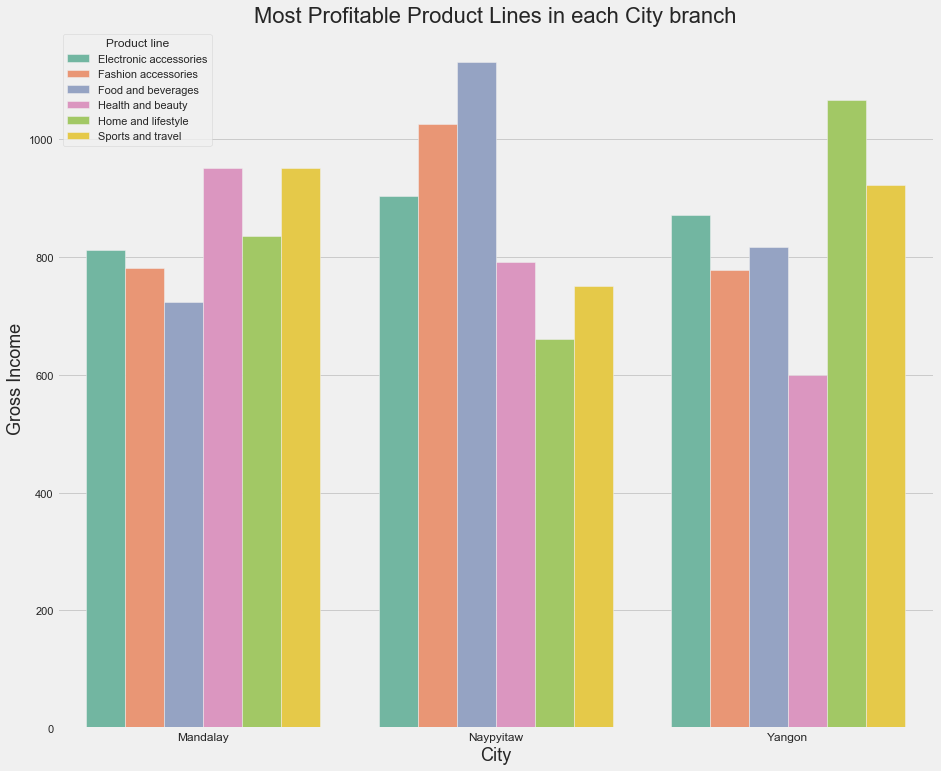

In [41]:
#visualzing the most profitable product line in each of the city branches
plt.figure(figsize=(14,12))
sns.barplot(x='City',y='gross income',hue='Product line',
           data= df_grp_prof_prod, palette='Set2')
plt.title('Most Profitable Product Lines in each City branch',fontsize=22)
plt.xlabel('City',fontsize=18)
plt.ylabel('Gross Income',fontsize=18)
plt.xticks(fontsize=12)

*Branch Analysis*****
* **Mandalay Branch**- 'Health and Beauty' and 'Sports and Travel' are the highest profit making product lines. Least being 'Food and Beverage'
* **Naypyitaw Branch**- 'Food and Beverage' generate the most profit of all the lines sold, followed by 'Fashion Accessories'. Least being 'Home and Lifestyle'
* **Yangon Branch**- 'Home and Lifestyle'generates the maximum profit followed by 'Sports and Travel'. Least being 'Health and Beauty'

*Product Line Analysis*****
* Electronic Accessories are most successful in Naypyitaw Branch and least in Mandalay Branch
* Fashion Accessories are most successful in Naypyitaw Branch and least in Yangon Branch
* Food and Beverages are most successful in Naypyitaw Branch and least in Mandalay Branch
* Health and Beauty are most successful in Mandalay Branch and least in Yangon Branch
* Home and Lifestyle are most successful in Yangon Branch and least in Naypyitaw Branch
* Sports and Travel are most successful in Mandalay Branch and least in Naypyitaw Branch

In [42]:
#average rating of each city branch based on their product line
df_rating= sales[['City','Product line','Rating']]
df_rating_city=df_rating.groupby(['City','Product line'], as_index=False).mean()
df_rating_city_piv=df_rating_city.pivot(index='City',columns='Product line')
df_rating_city_piv

Rating                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                   7.116364            6.722581           6.994000   
Naypyitaw                  6.747273            7.440000           7.080303   
Yangon                     6.911667            6.878431           7.253448   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay              7.100000           6.516000          6.509677  
Naypyitaw             6.998077           7.060000          7.028889  
Yangon                6.900000           6.930769          7.257627

Text(0.5, 1.0, 'Branch wise Ratings')

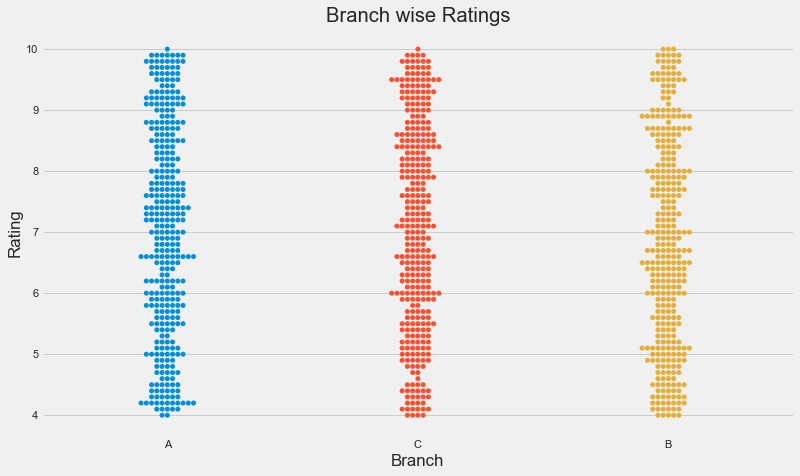

In [43]:
sns.swarmplot(x = sales['Branch'], y = sales['Rating']).set_title('Branch wise Ratings')

Text(0, 0.5, 'City')

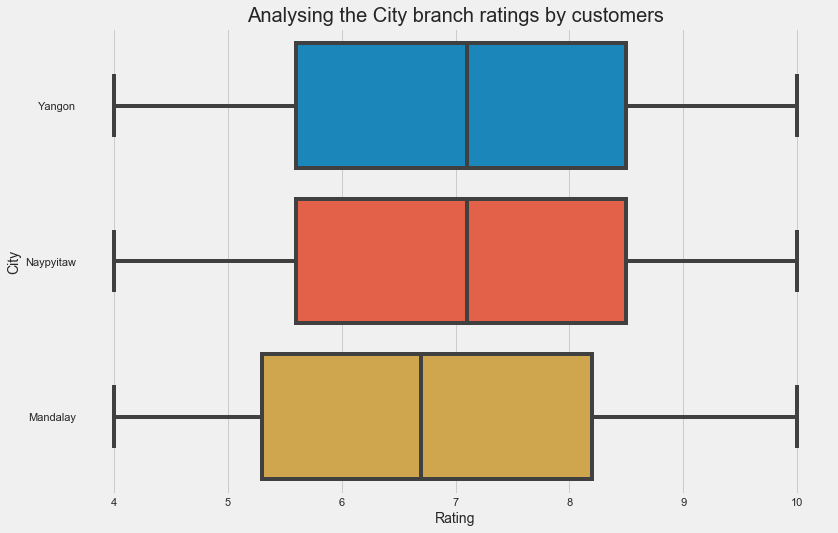

In [44]:
#visualising the best city branch based on their overall ratings
plt.figure(figsize=(12,8))
sns.boxplot(x='Rating',y='City',data= sales)
plt.title('Analysing the City branch ratings by customers', fontsize=20)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('City',fontsize=14)

**Analysis**

The average rating of Naypyitaw is the highest amongst the three branches with Mandalay having the least average rating.
The minimum rating that any branch gets is about 4.0 with the highest being 10.0.

Analysing the performance based on customer ratings of all branches, Yangon and Naypyitaw seem to be doing the best with very similar rating range.

Text(0, 0.5, 'Rating')

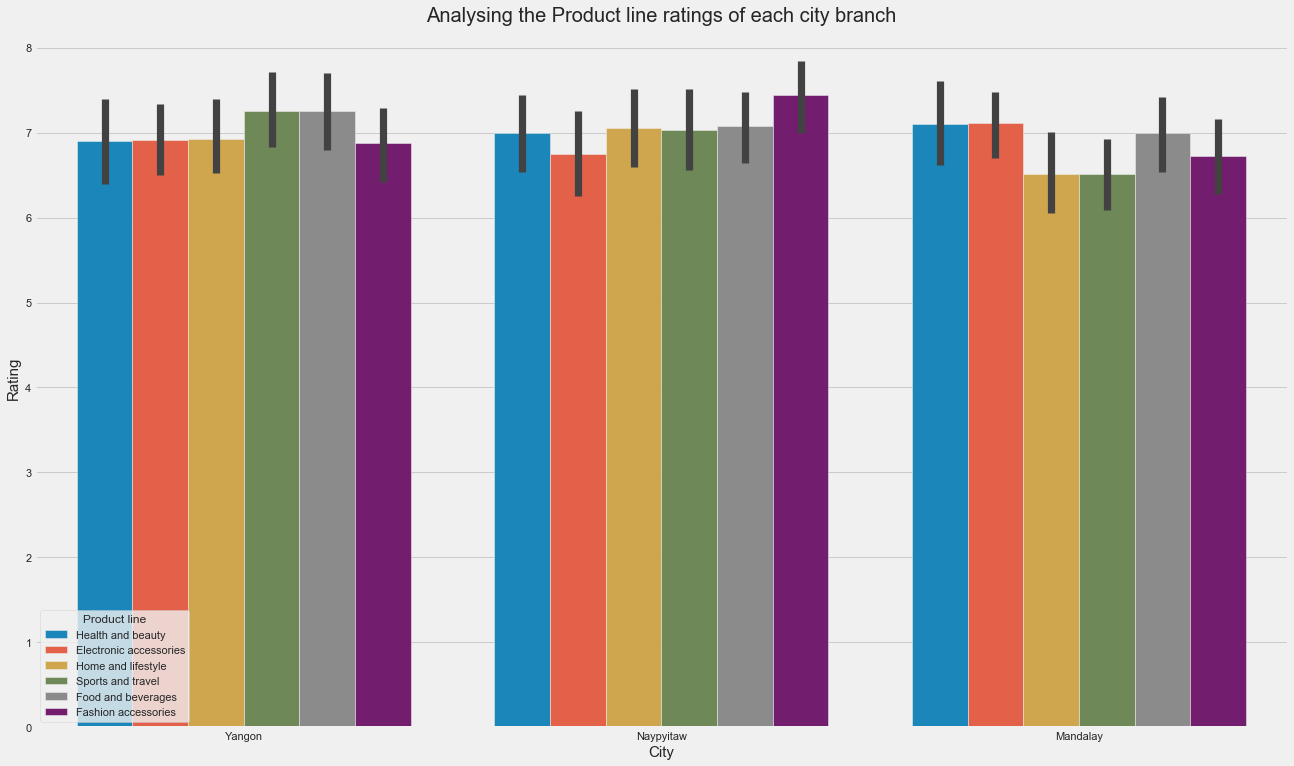

In [45]:
#visualising the product line with the best rating per city branch
plt.figure(figsize=(20,12))
sns.barplot(x='City',y='Rating',hue='Product line',data= sales)
plt.title('Analysing the Product line ratings of each city branch', fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Rating',fontsize=15)

Analysis****

* Mandalay Branch- 'Health and Beauty' and 'Electronic accessories' are the highest rated product lines in Mandalay with Sports and Travel least rated.
* Naypyitaw Branch- 'Fashion Accessories' have the highest rating at Naypyitaw Branch with 'Electronic accessories' least rated.
* Yangon Branch- 'Sports and Travel' and 'Food and Beverages' are the highest rated product lines at Yangon with 'Fashion accessories' being the least rated.

In [46]:
#analysing quantity of products sold every month
df_mon=sales[['Product line','City','Quantity']]
df_mon_grp= df_mon.groupby(['Product line','City'],as_index=False).sum()
df_mon_piv= df_mon_grp.pivot(index='Product line',columns='City')
df_mon_piv

Quantity                 
City                   Mandalay Naypyitaw Yangon
Product line                                    
Electronic accessories      316       333    322
Fashion accessories         297       342    263
Food and beverages          270       369    313
Health and beauty           320       277    257
Home and lifestyle          295       245    371
Sports and travel           322       265    333

Analysis:
    Naypytitaw: High Sale of Food & Beverage, Fashion Accessories, Electronic Accessories
    Yangon: Sports & Travel, Electronic Acccessories, Food & Beverages
    Mandalay: Sports & Travel, Health & Beauty, Electronic Accessories

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

<Figure size 864x576 with 0 Axes>

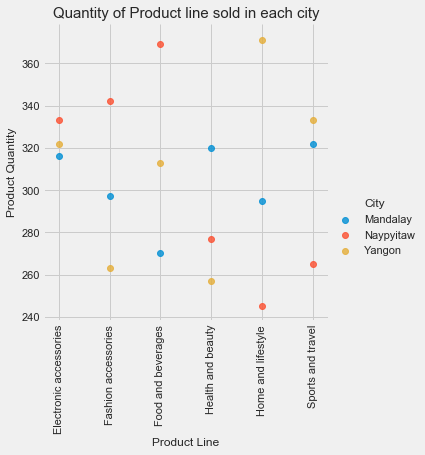

In [47]:
#visualizing the monthly product quantity sold
plt.figure(figsize=(12,8))
sns.lmplot(x='Product line',y='Quantity',hue='City',fit_reg=False, 
           data=df_mon_grp)
plt.title('Quantity of Product line sold in each city',fontsize=15)
plt.xlabel('Product Line',fontsize=12)
plt.ylabel('Product Quantity',fontsize=12)
plt.xticks(rotation=90)

**Analysis**

As per the above analysis:

Mandalay: This city has top sells from these prodcuts categories: Electronic, Health & Beauty, Sports & Travel.
Naypyitaw: This city has top sells from Food & Beverage, Fashion Accessories and Electronic Accessories sequentially.
Yangon: This city has high sells from Home and Lifestyle, Sports and Travel and Electronic Accessories accordingly.

## Product Analysis

Let's look at the various products' performance.

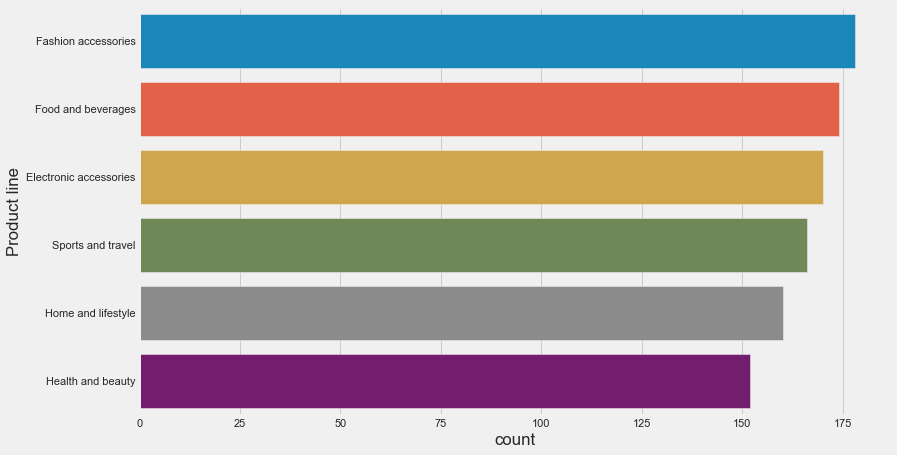

In [48]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

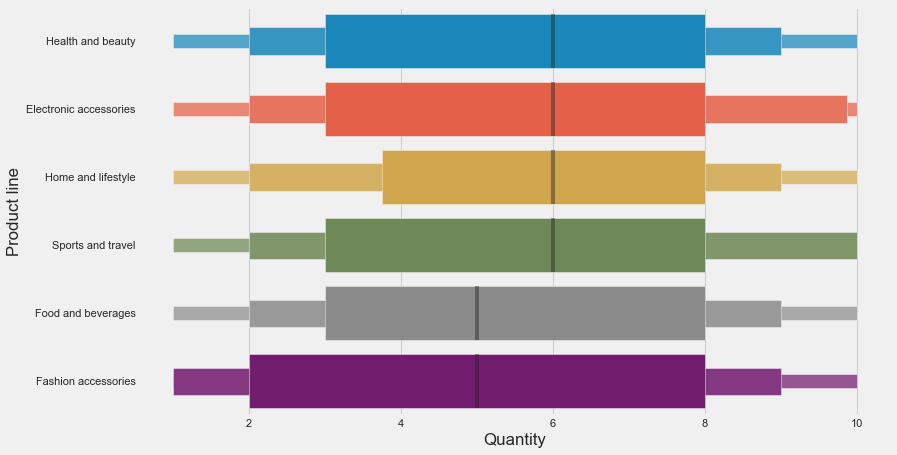

In [49]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories. 

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

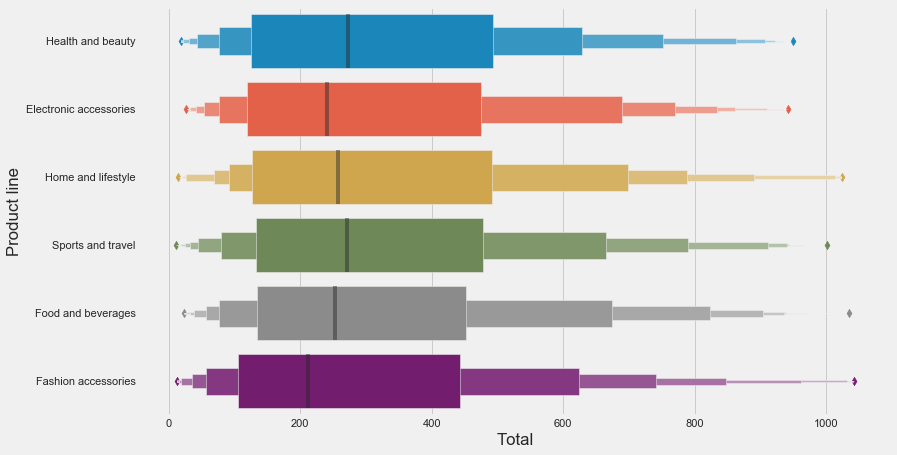

In [50]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

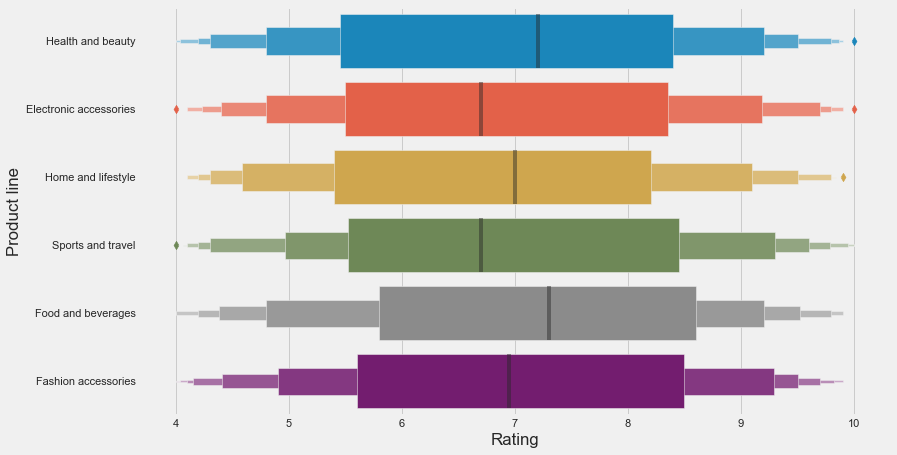

In [51]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

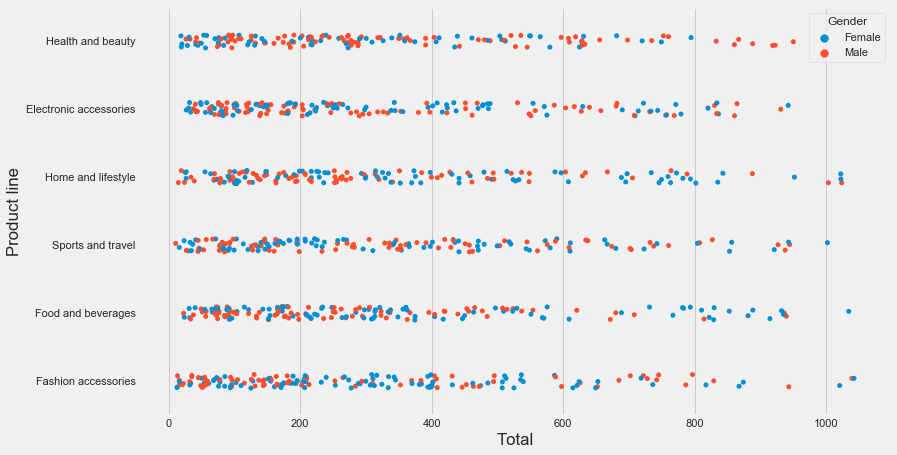

In [52]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

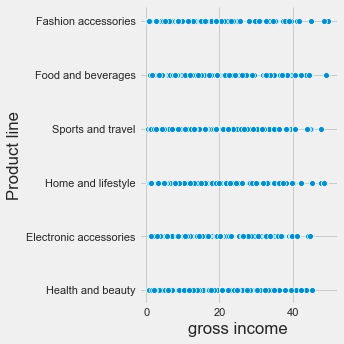

In [53]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

Food and Beverages have the highest average rating while sports and travel the lowest

Let's see when customers buy certain products in the various branches. 

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00 

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

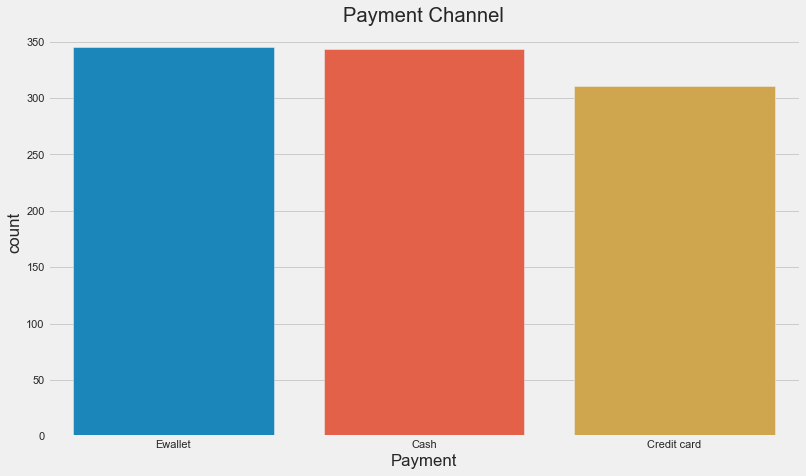

In [54]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

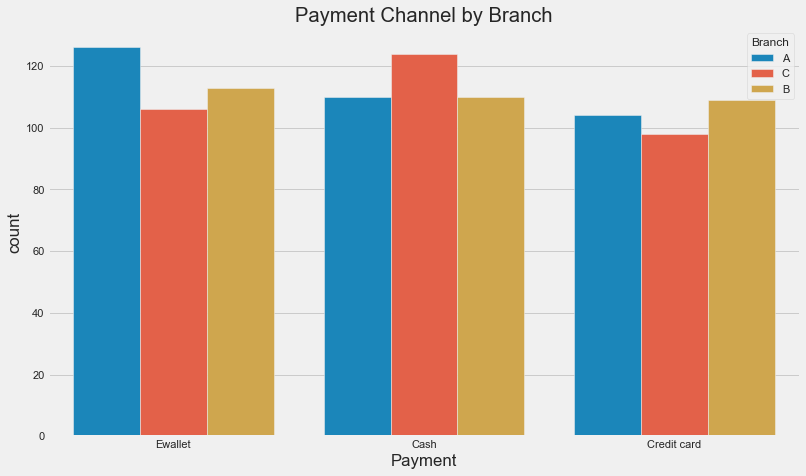

In [55]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [56]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

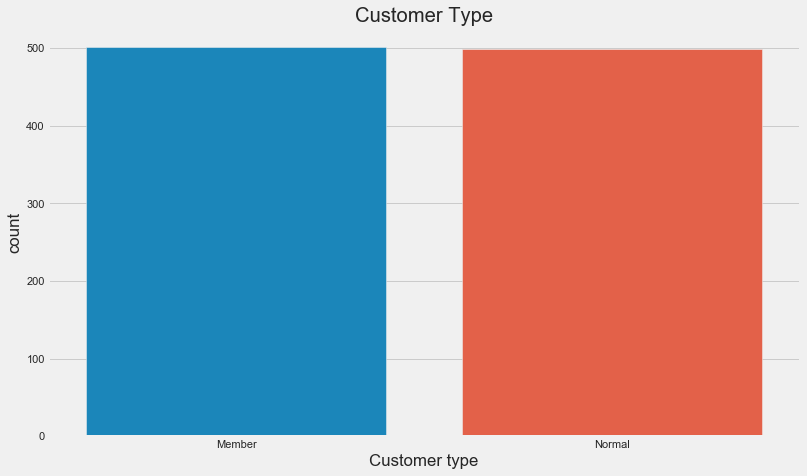

In [57]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

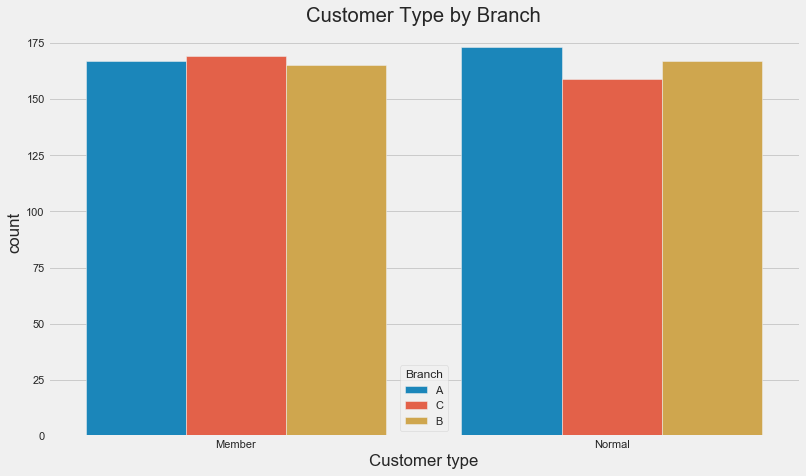

In [58]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

## Does customer type influences the sales 

In [59]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

Total
Customer type            
Member         164223.444
Normal         158743.305

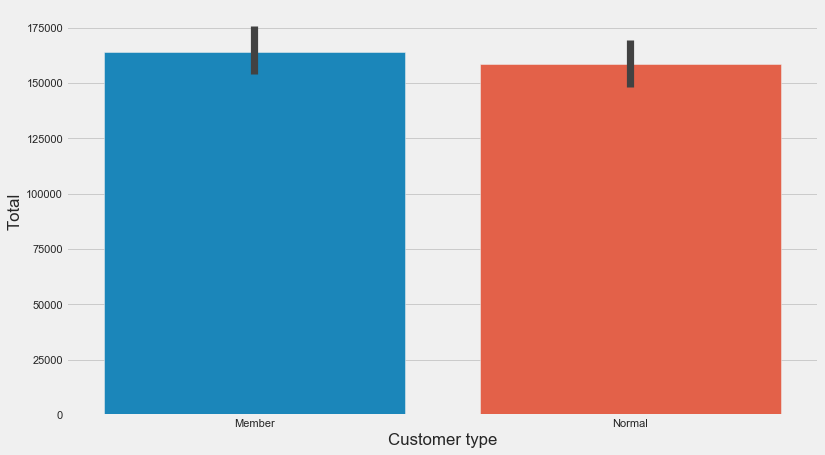

In [60]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Do the customer type influence customer rating? Let's find out 

Text(0.5, 1.0, 'Customer Type')

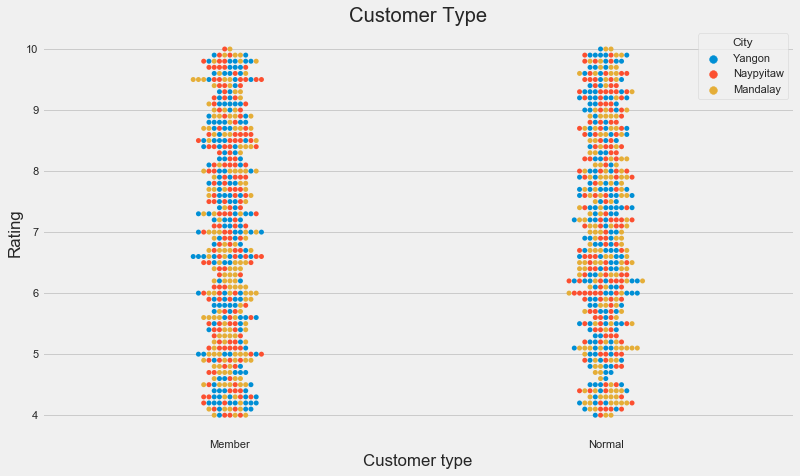

In [61]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

With the use of google search, I was able to get the longitude and latitude of each cities. We can 

In [62]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

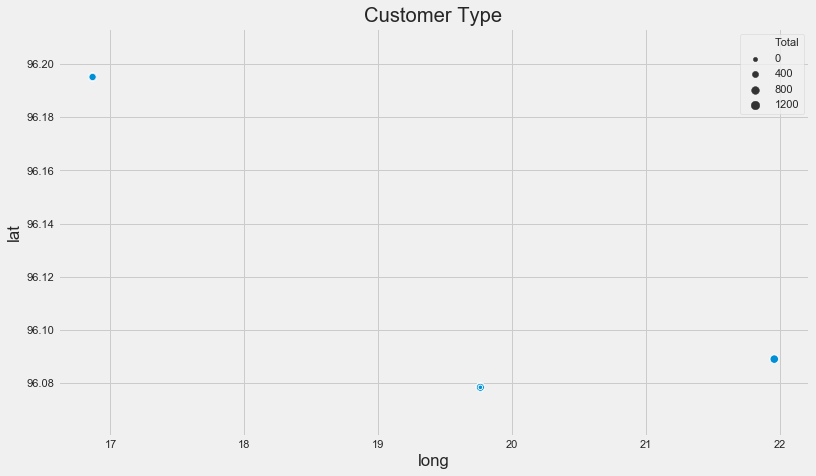

In [63]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

So, we understand that customer type has influence on sales

# Model Creation

# LINEAR REGRESION 

#### Research Questions:
- a.	Which days are the busiest day?
- b.	What is the average amount customer spend in a single transaction? 
- c.	How much sales does the store generate from member and non- member?
- d.	What is the average profit for each branch in a month?
- e.    Which branch has more customers but lower profit?
- f.    Product lines sales for each month?

### a. Busiest Day 
Answer: The busiest days are the following

### Dates where stores generates more sales

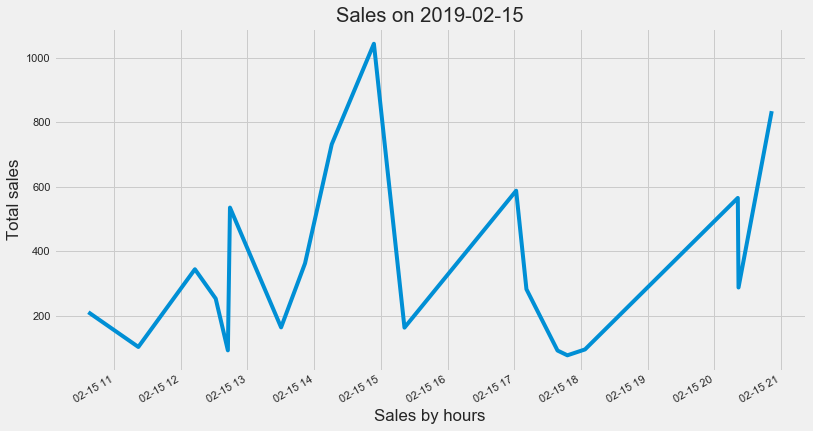

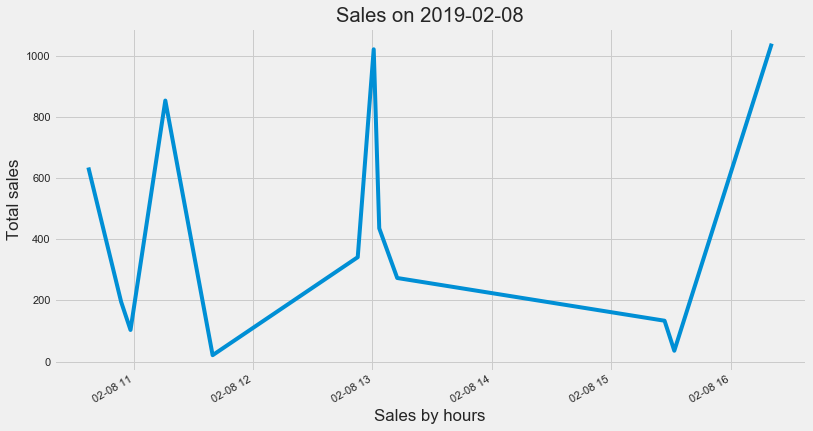

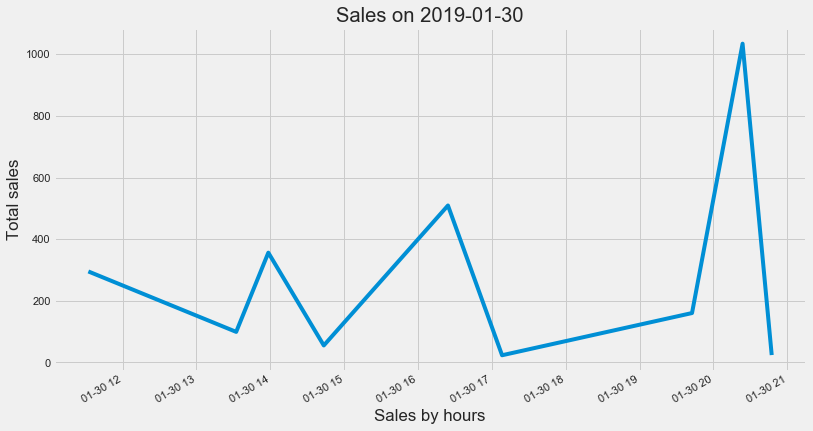

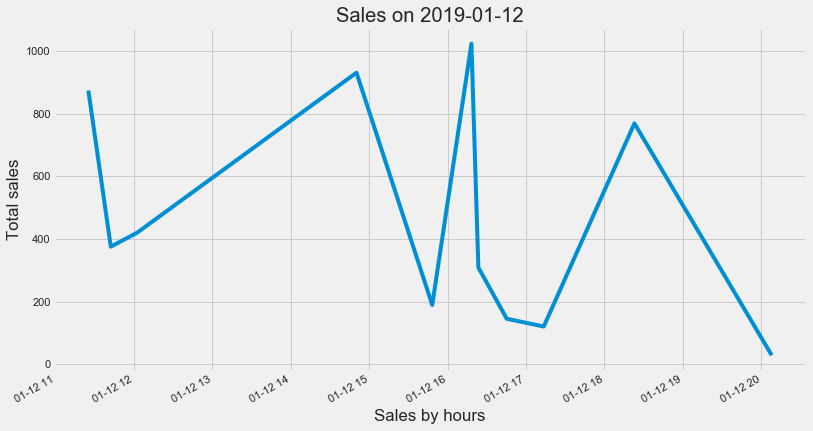

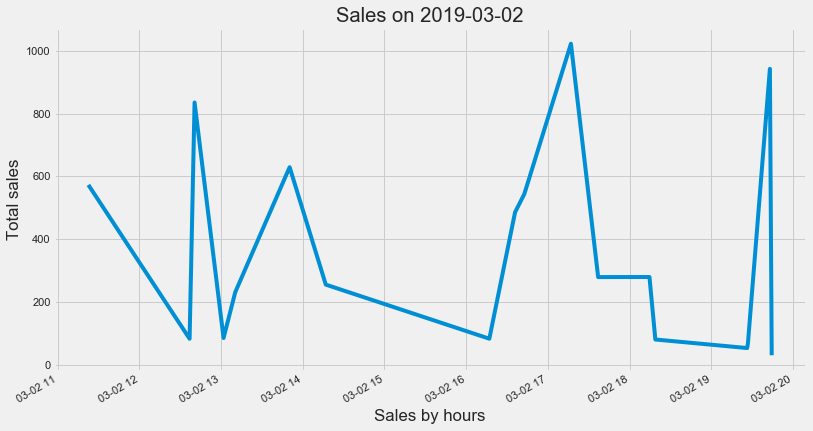

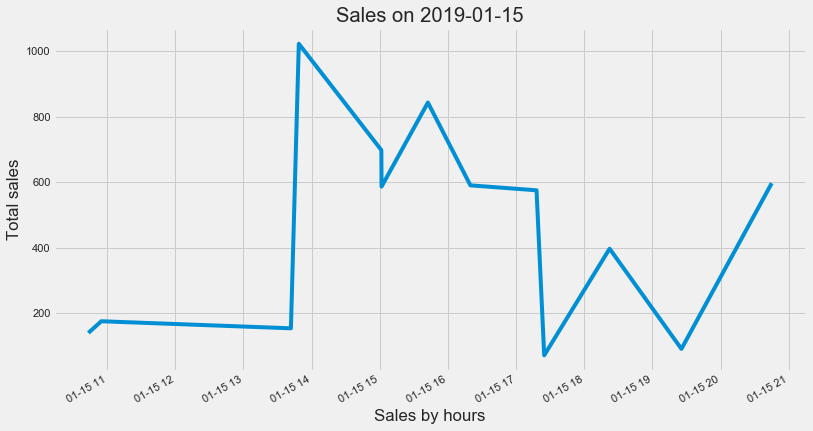

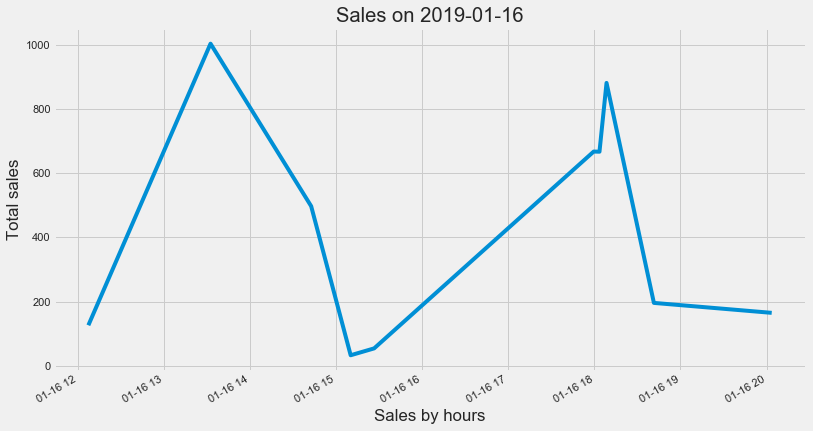

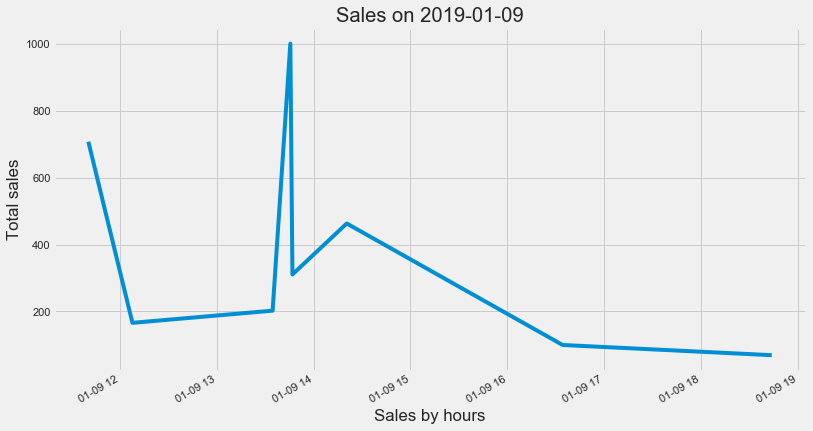

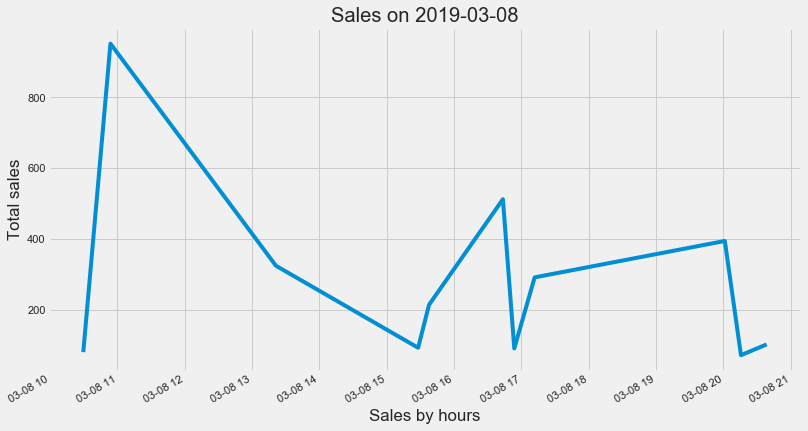

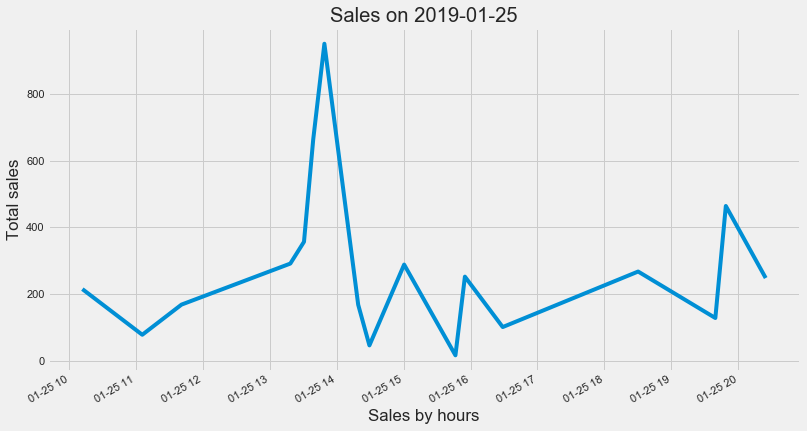

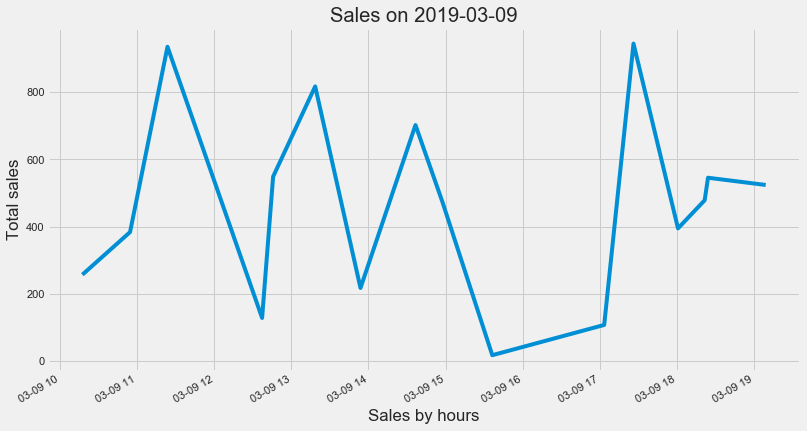

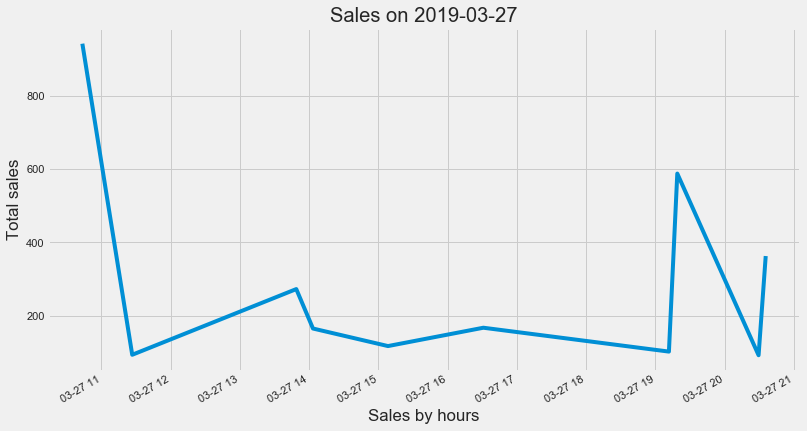

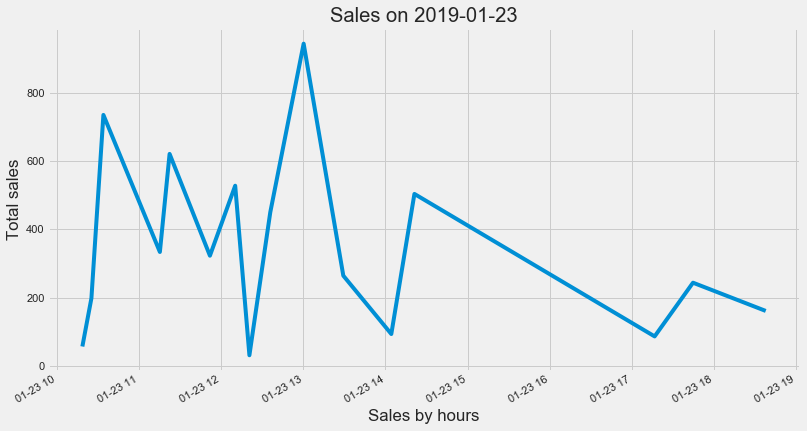

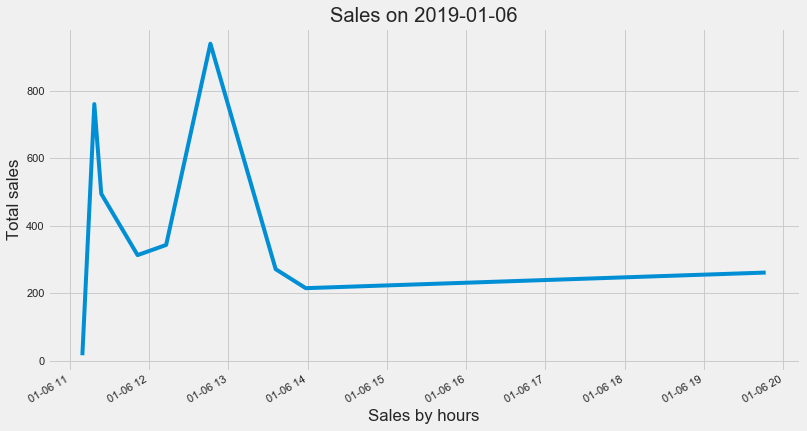

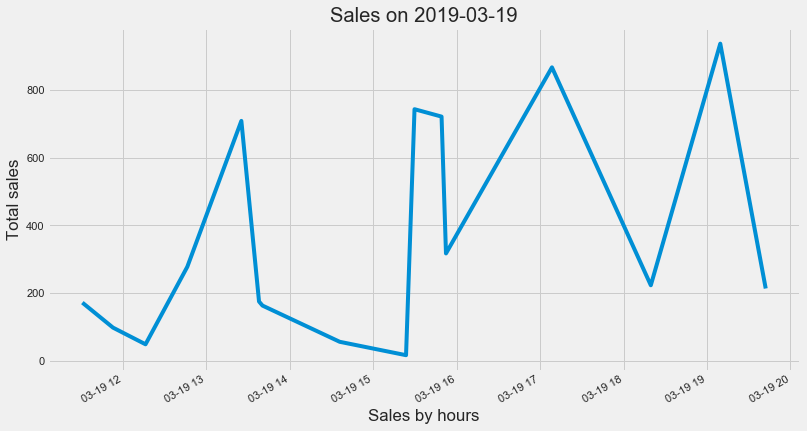

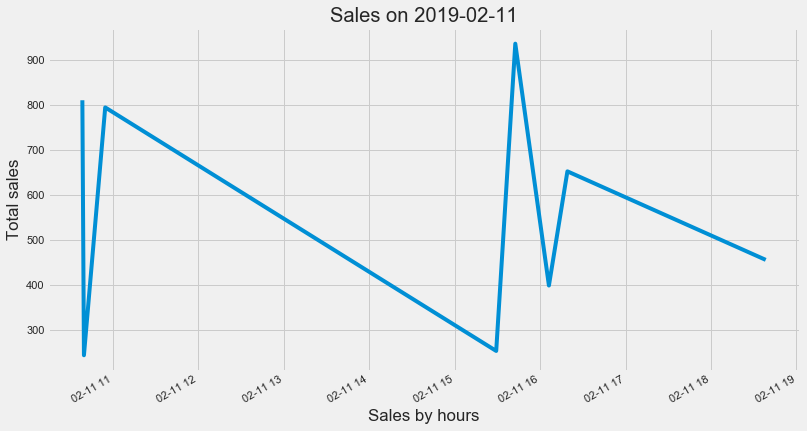

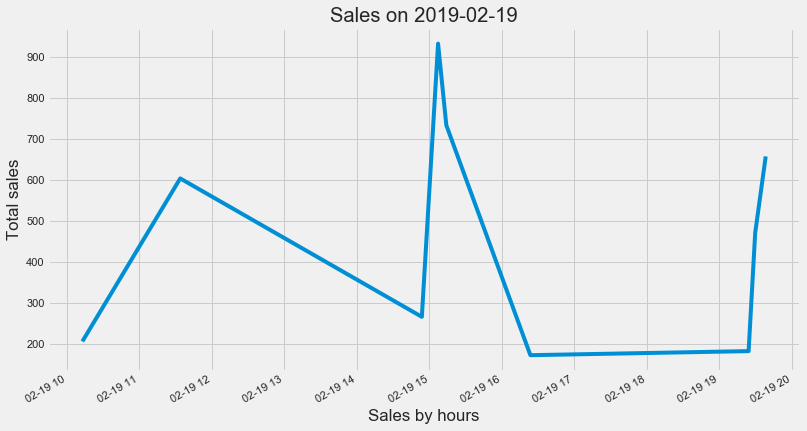

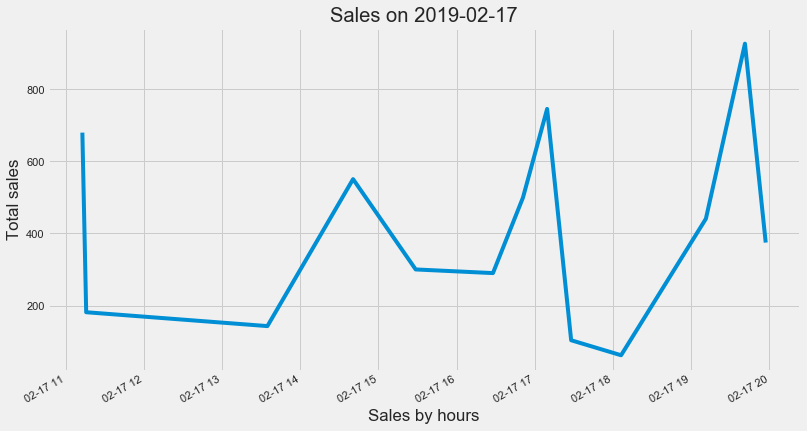

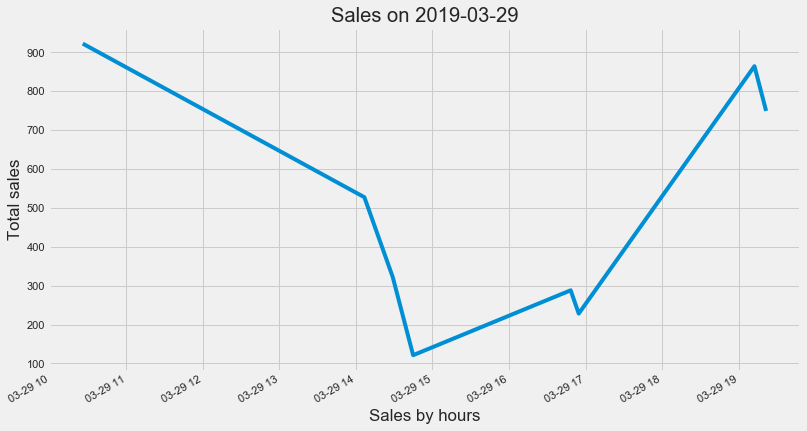

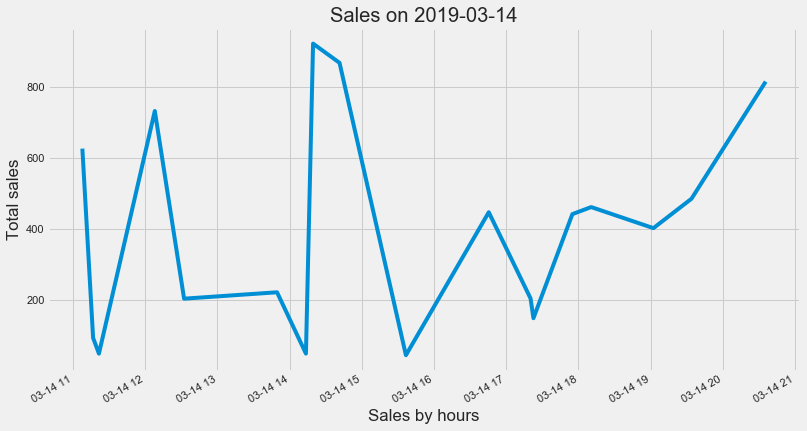

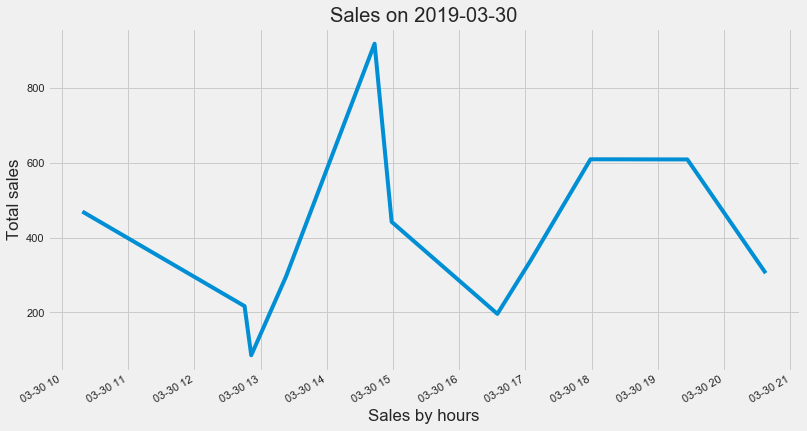

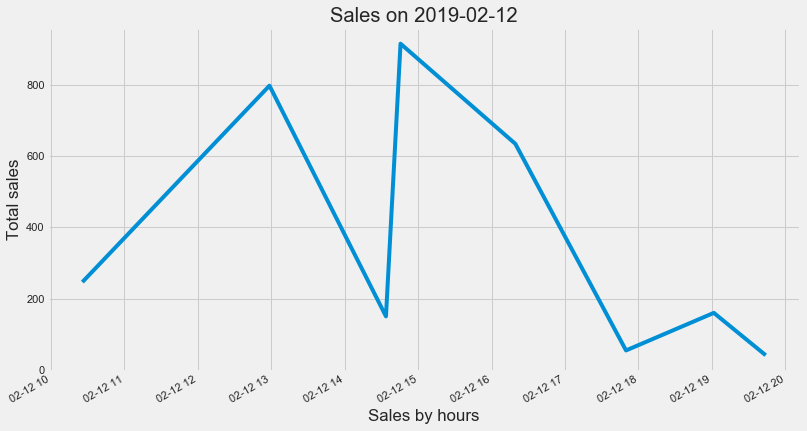

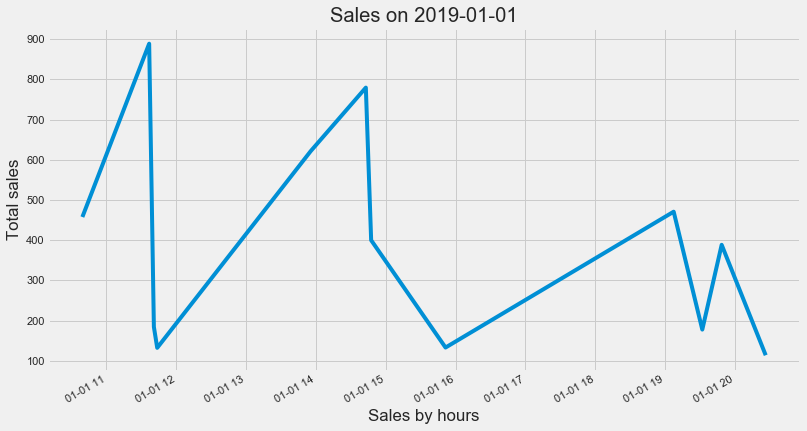

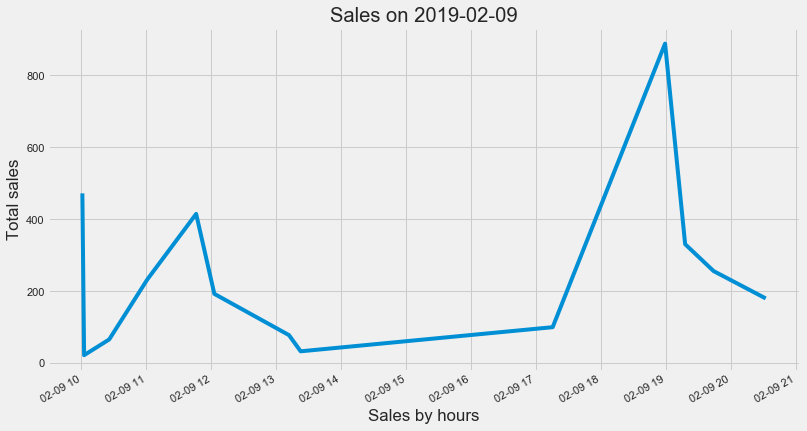

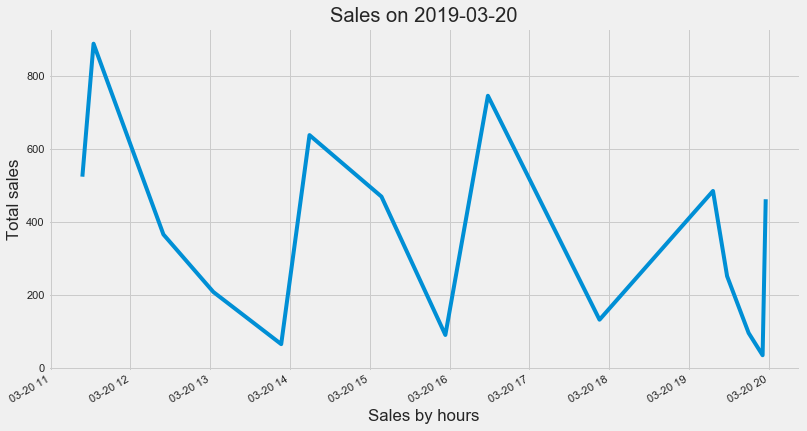

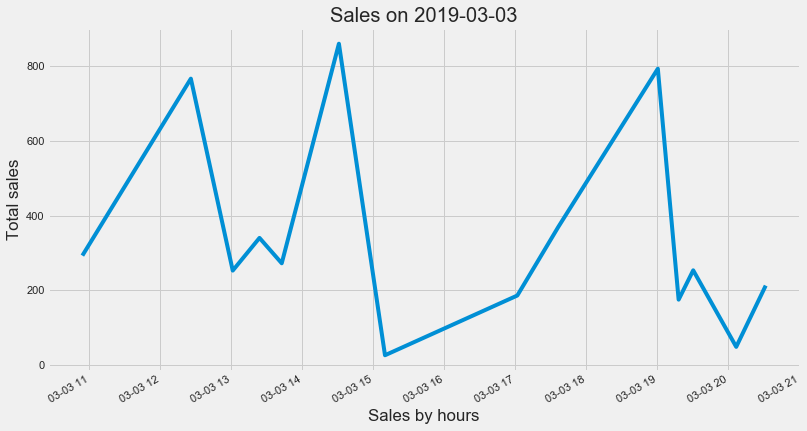

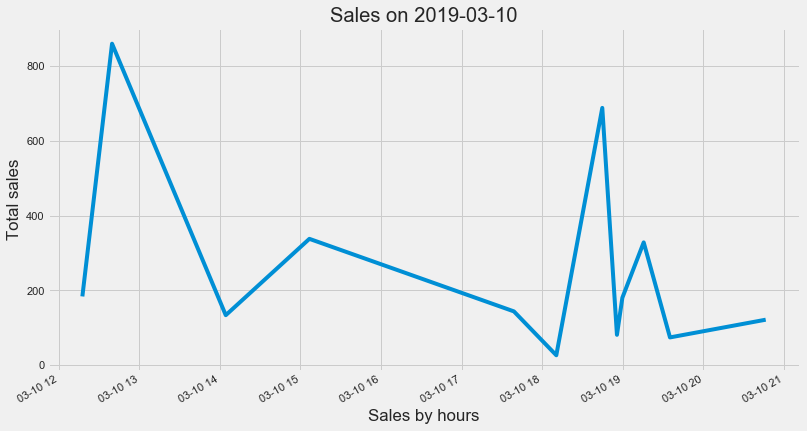

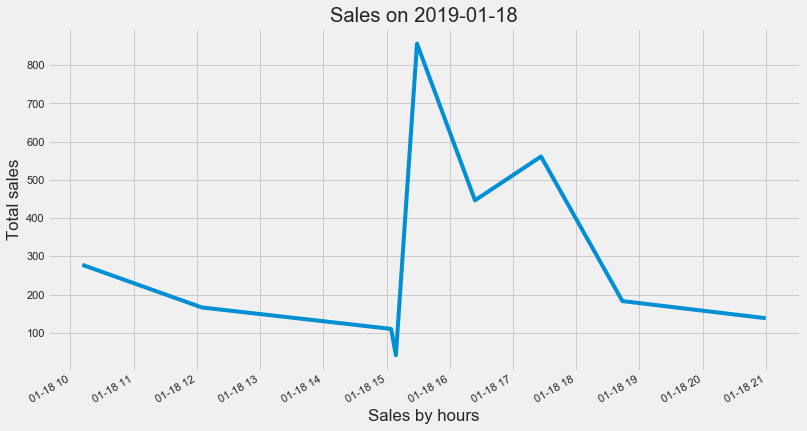

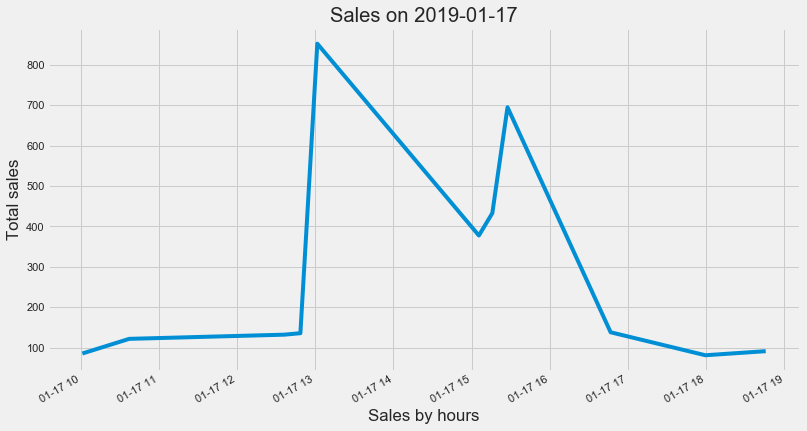

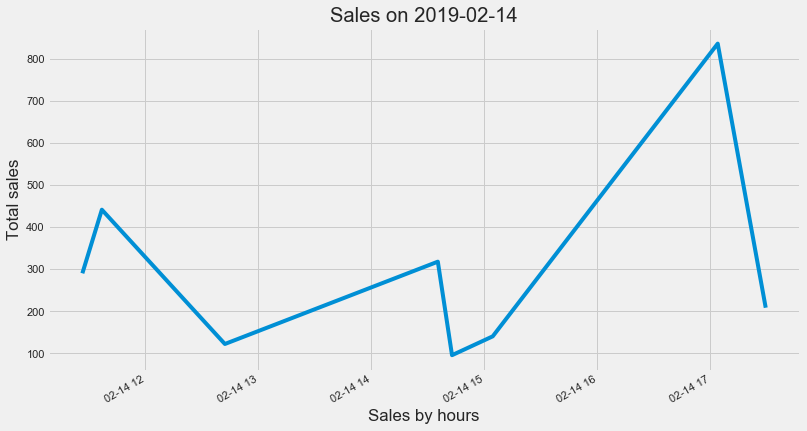

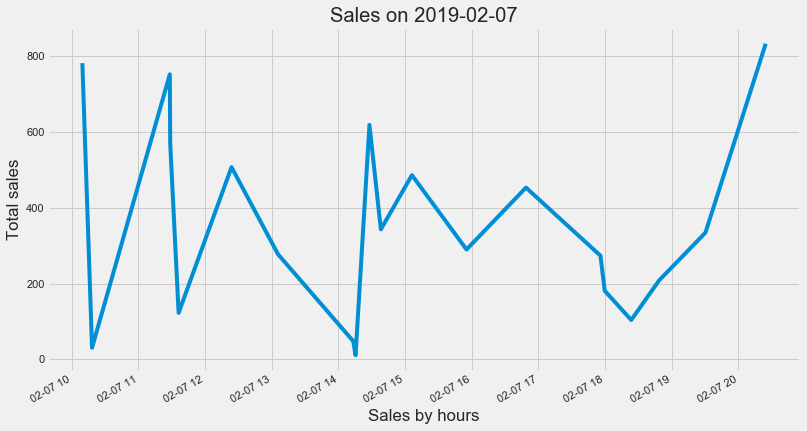

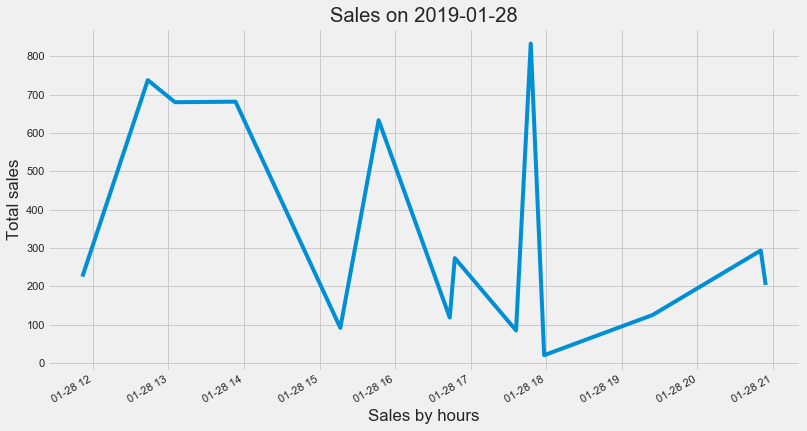

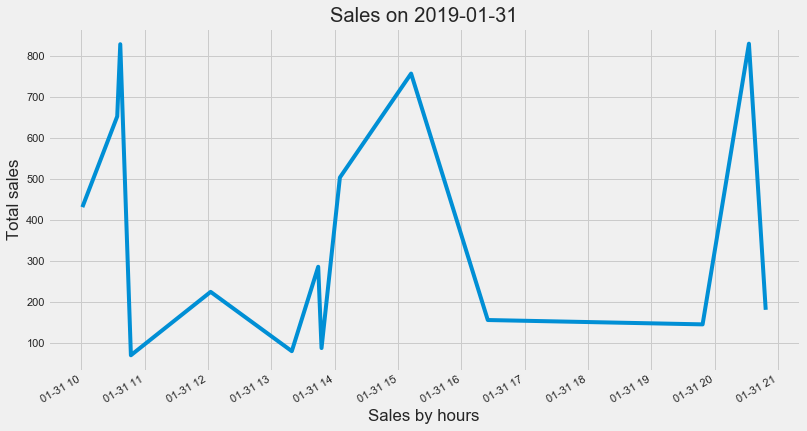

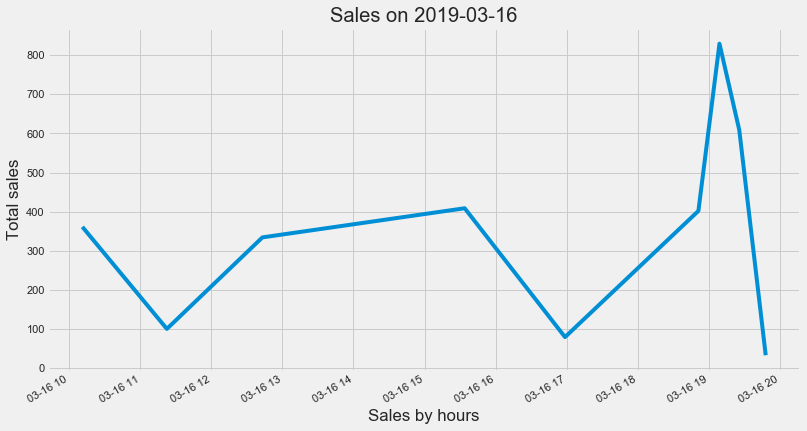

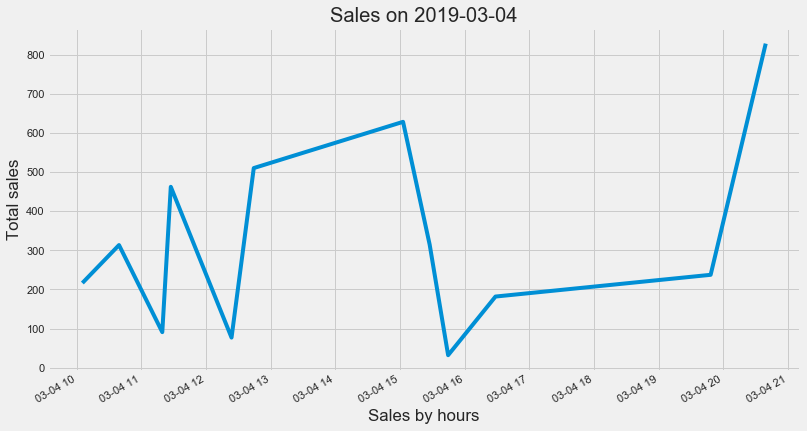

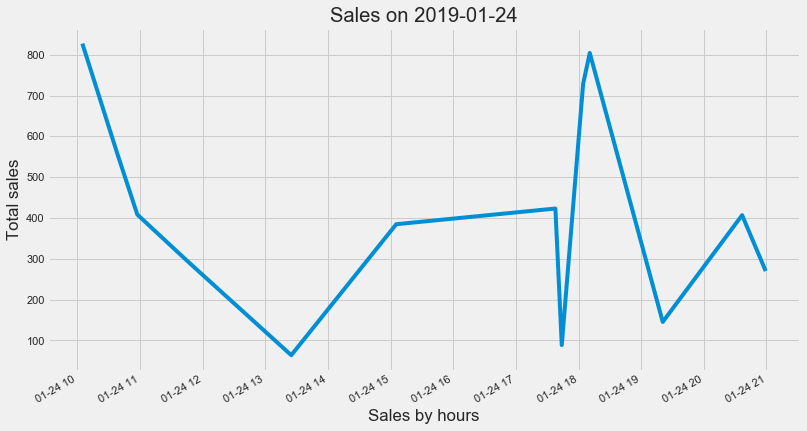

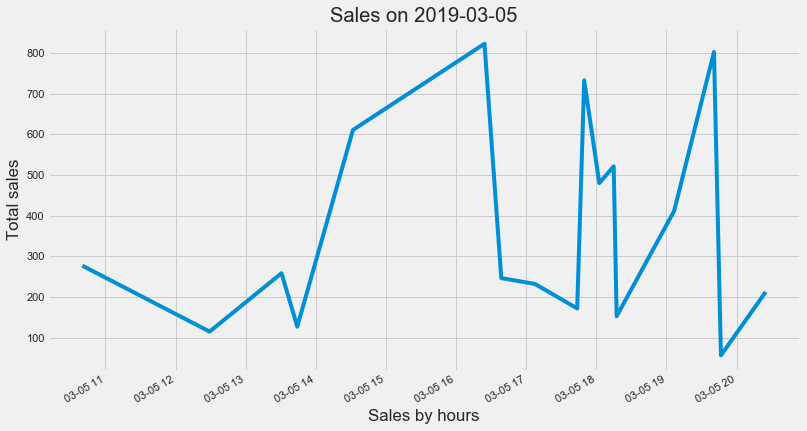

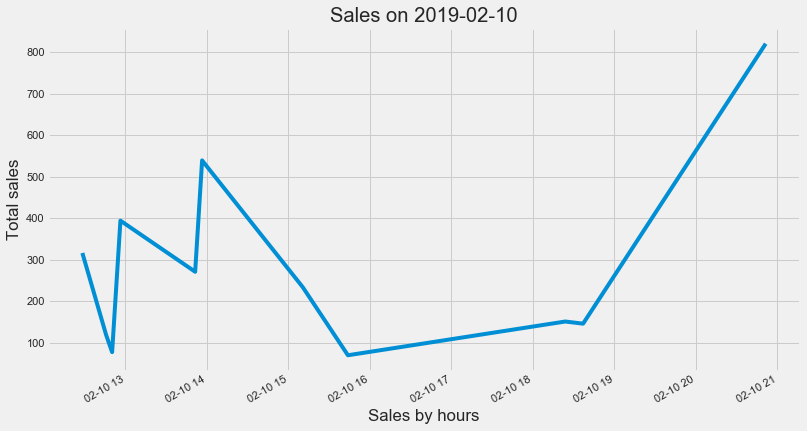

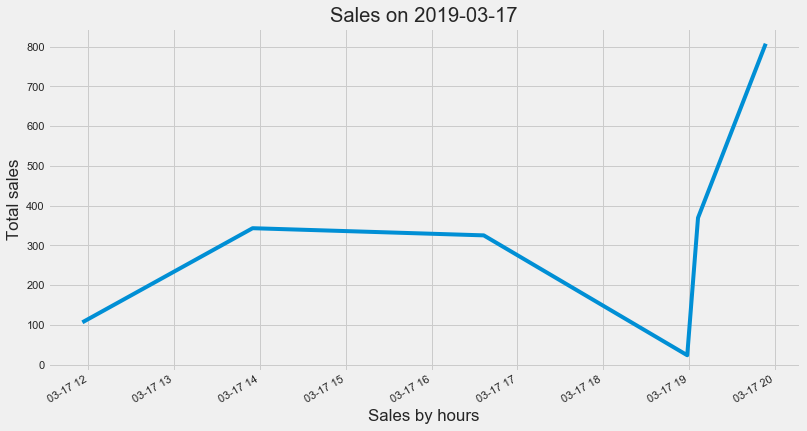

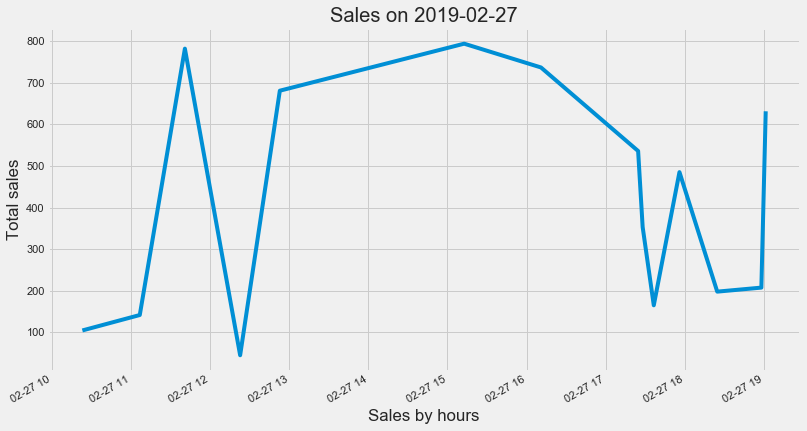

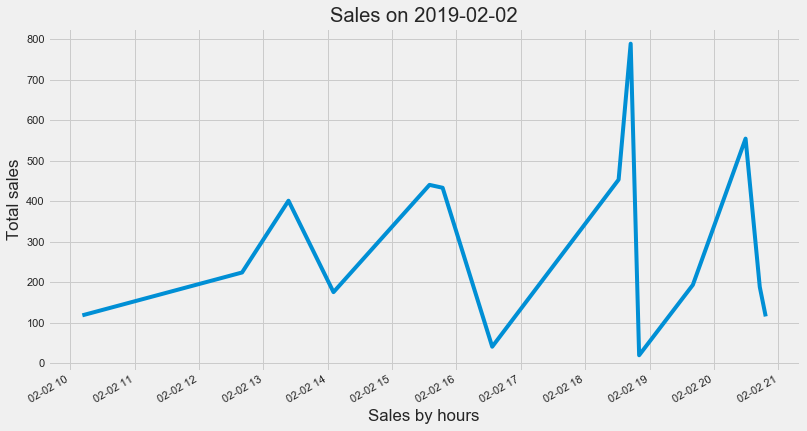

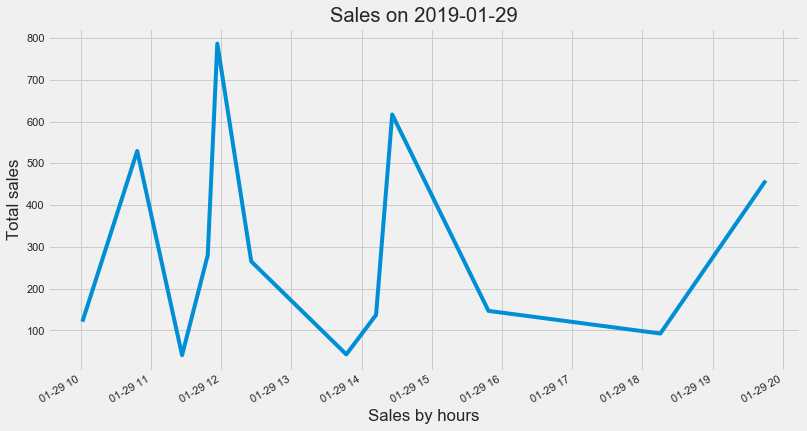

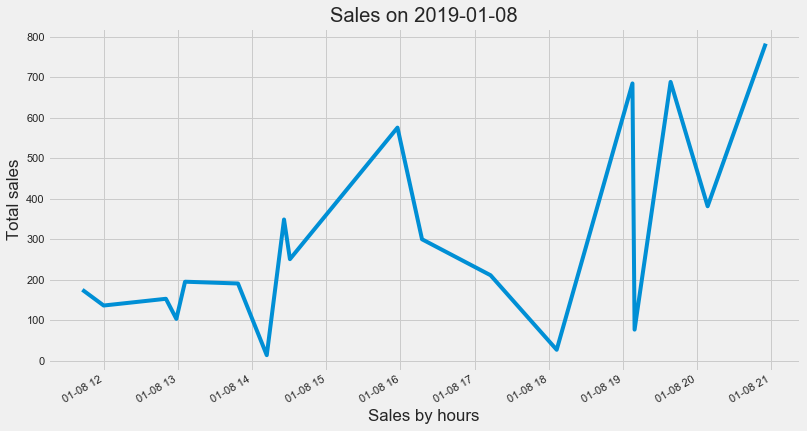

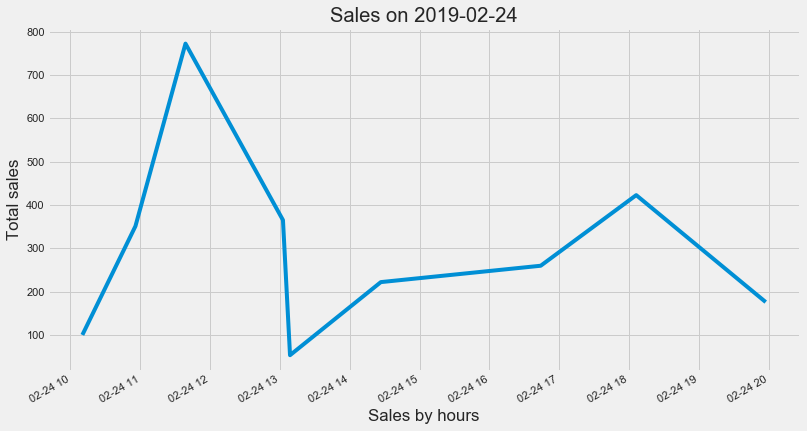

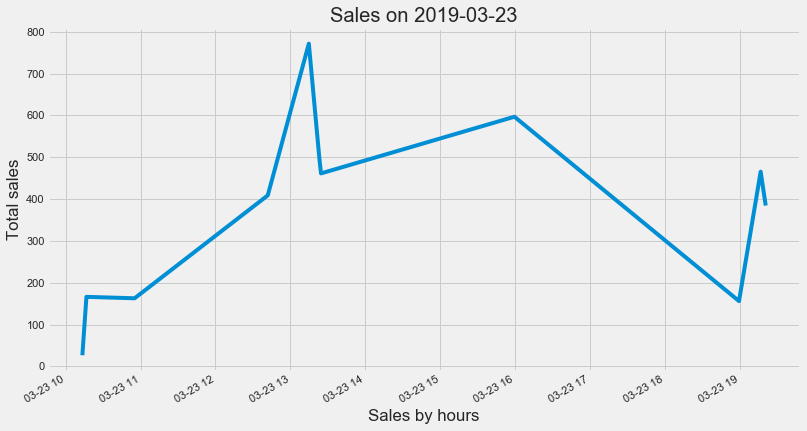

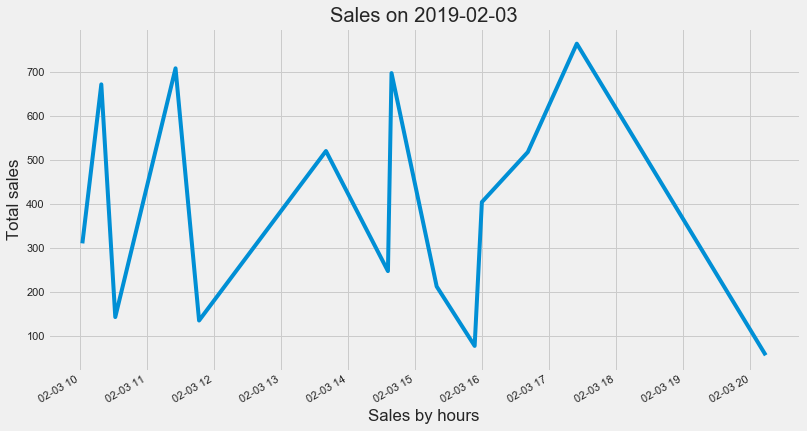

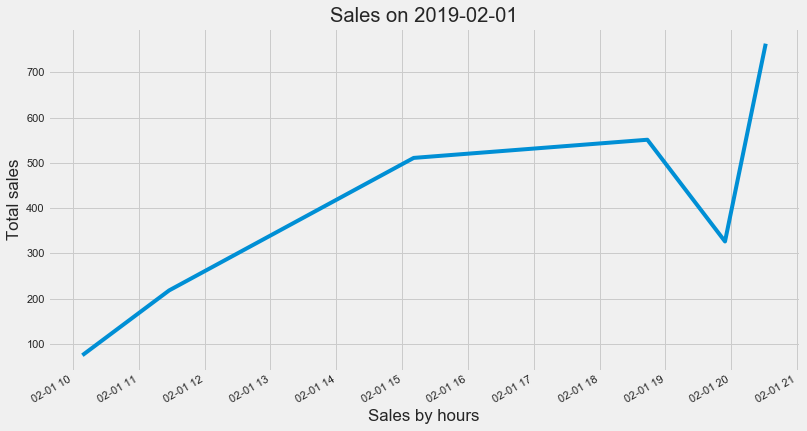

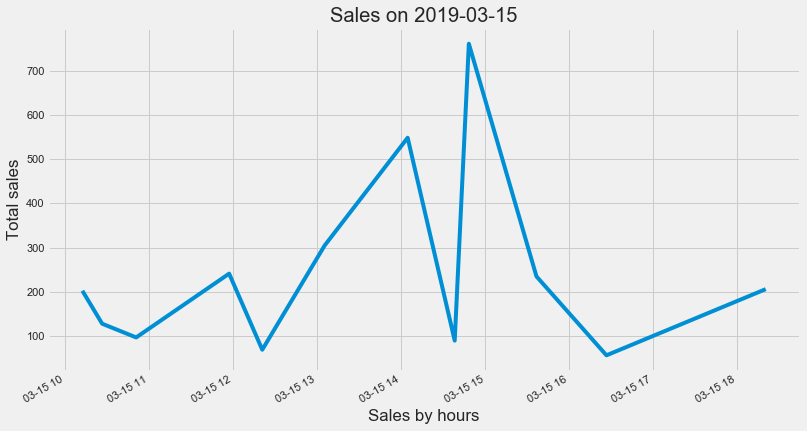

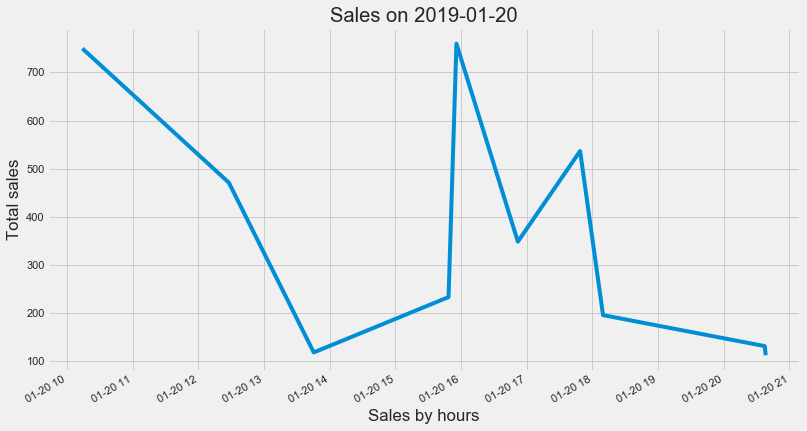

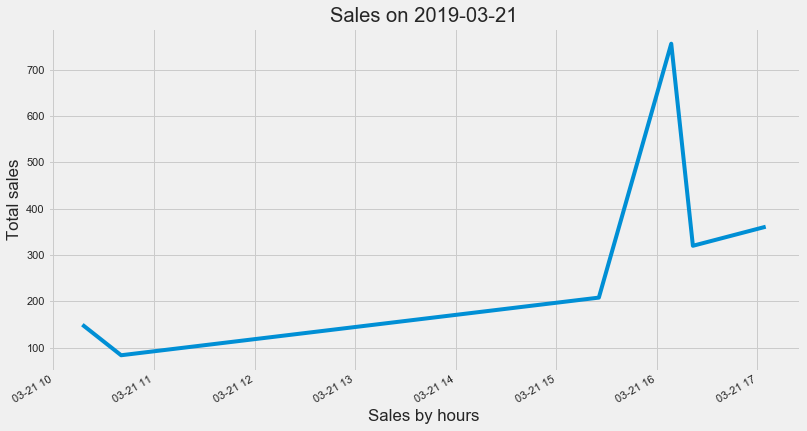

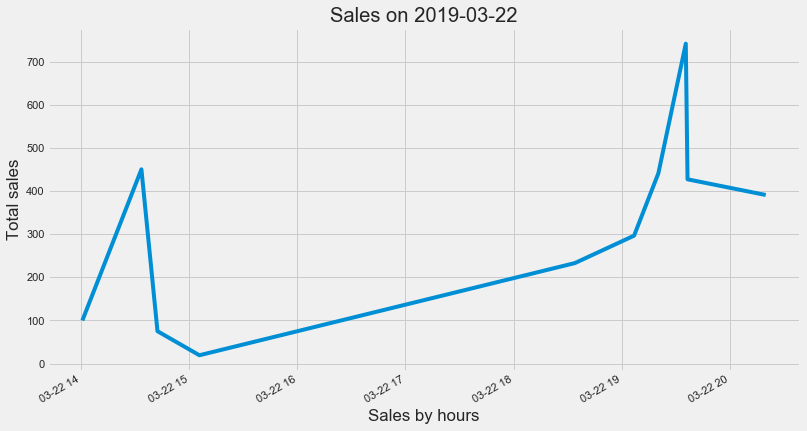

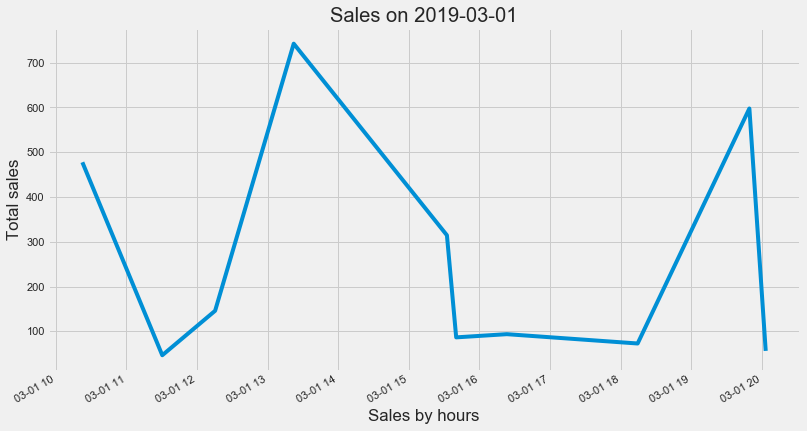

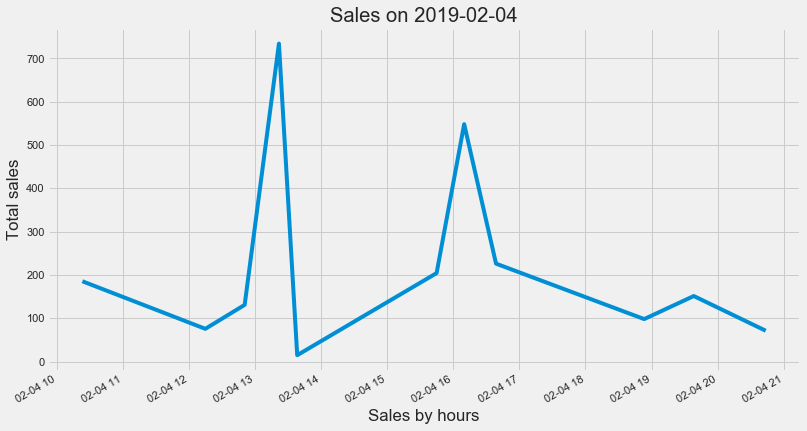

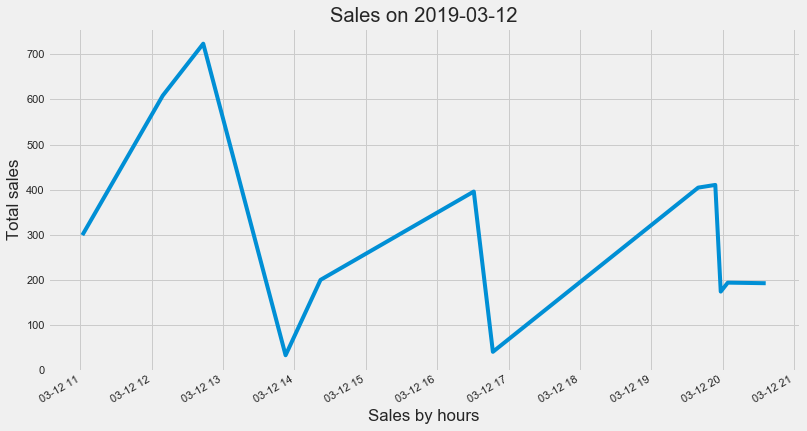

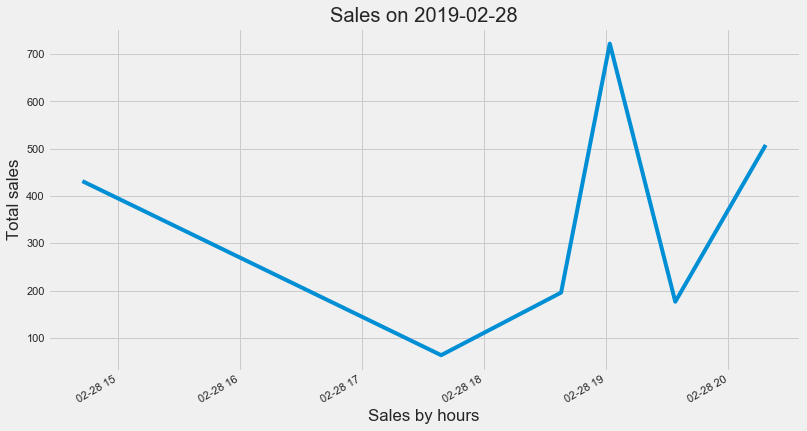

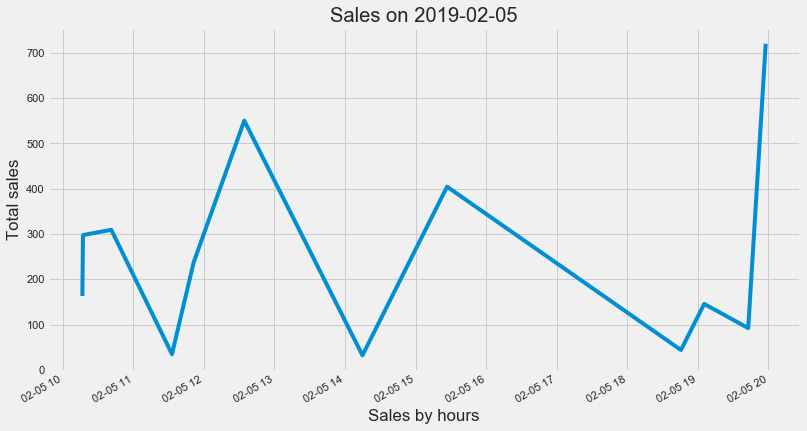

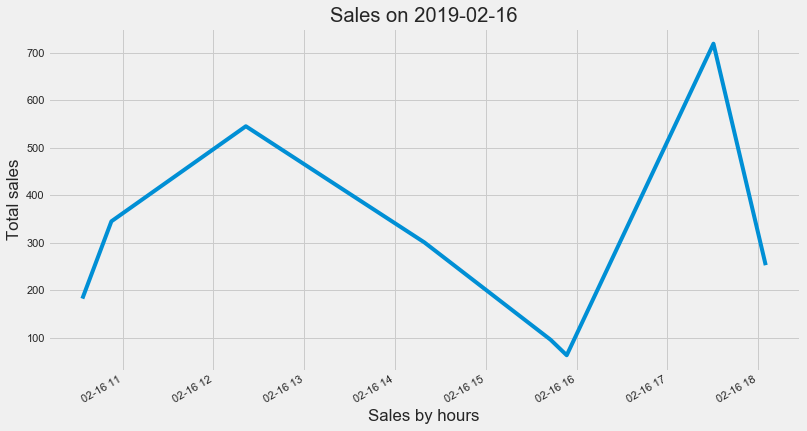

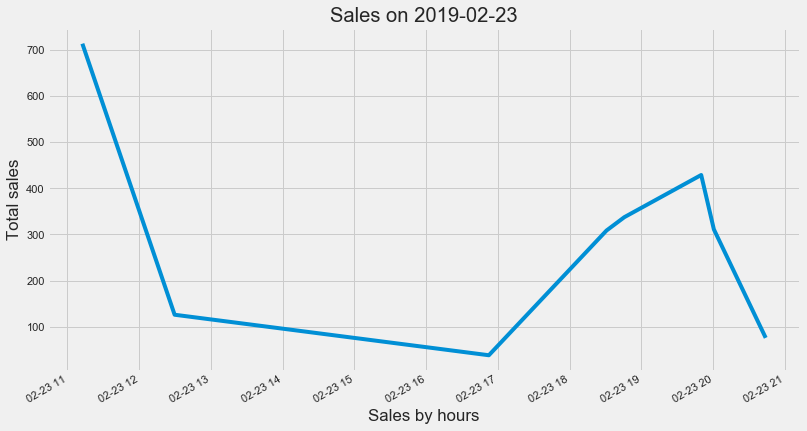

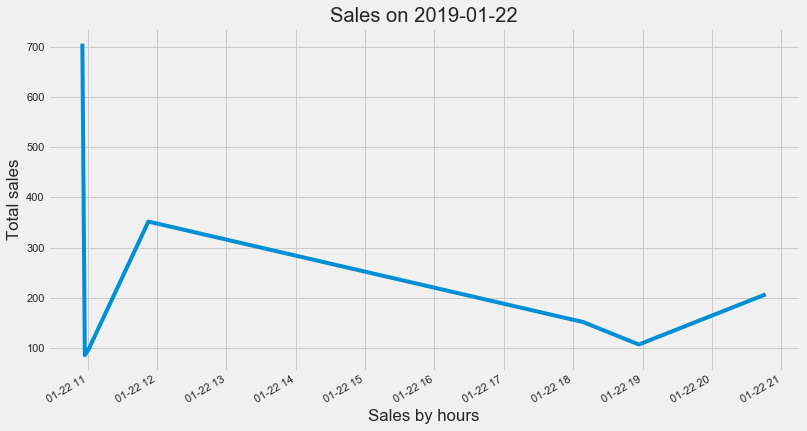

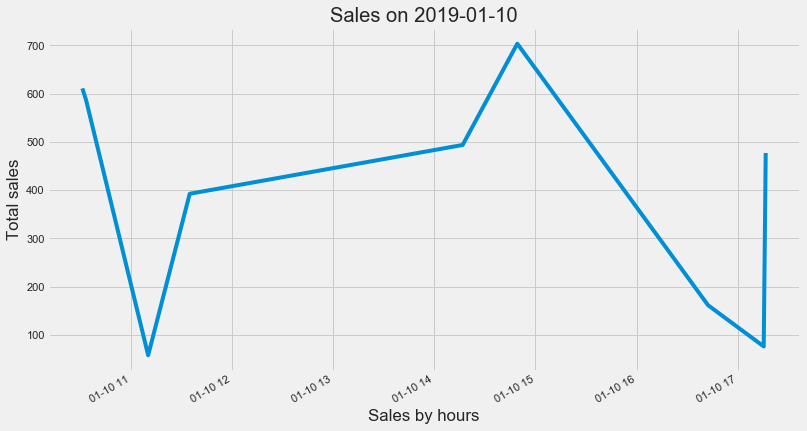

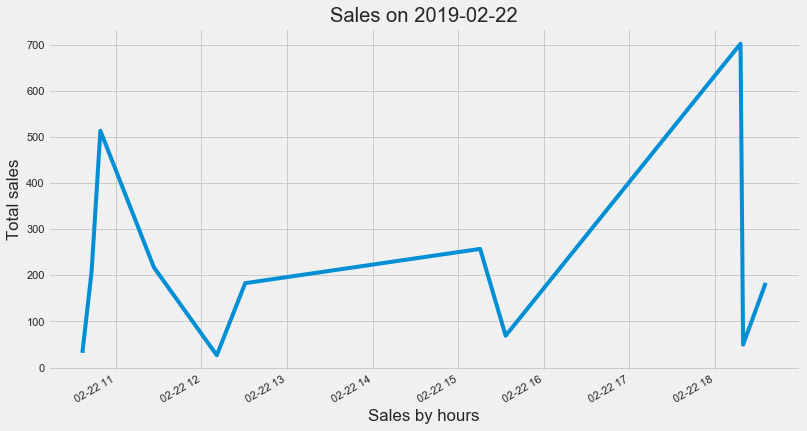

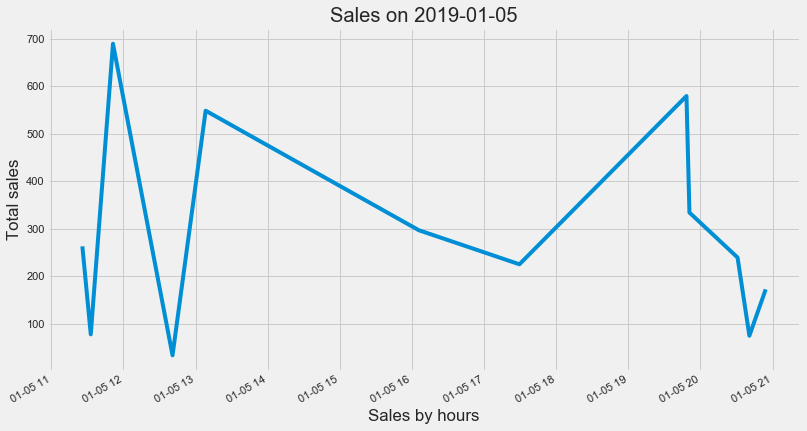

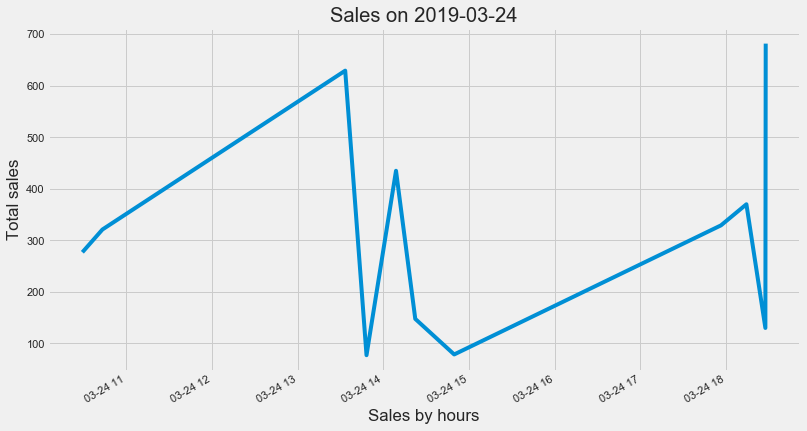

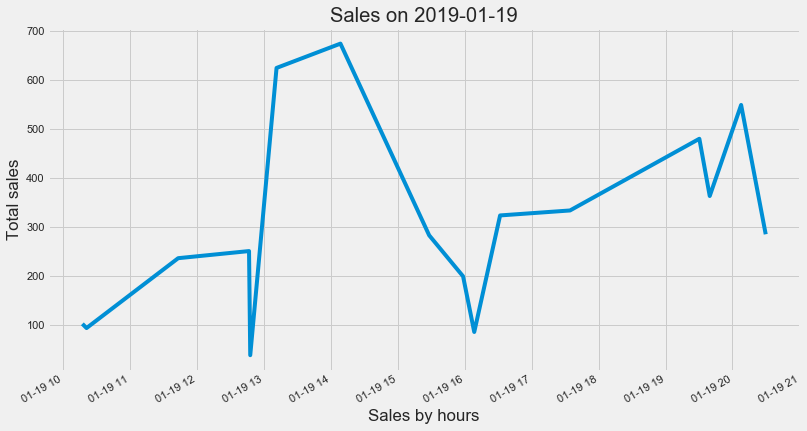

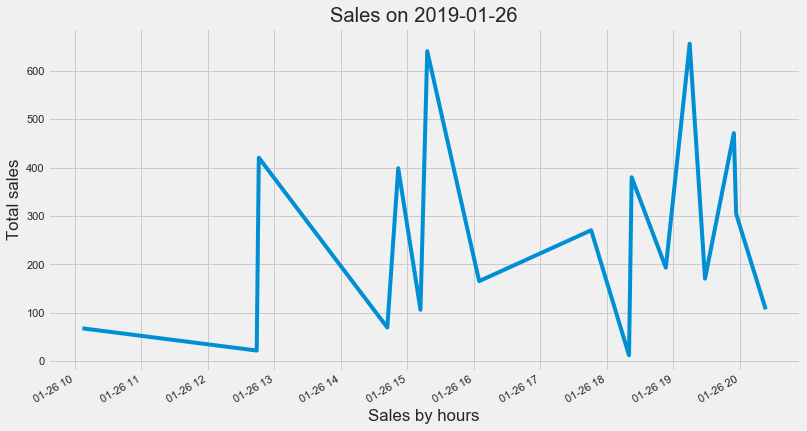

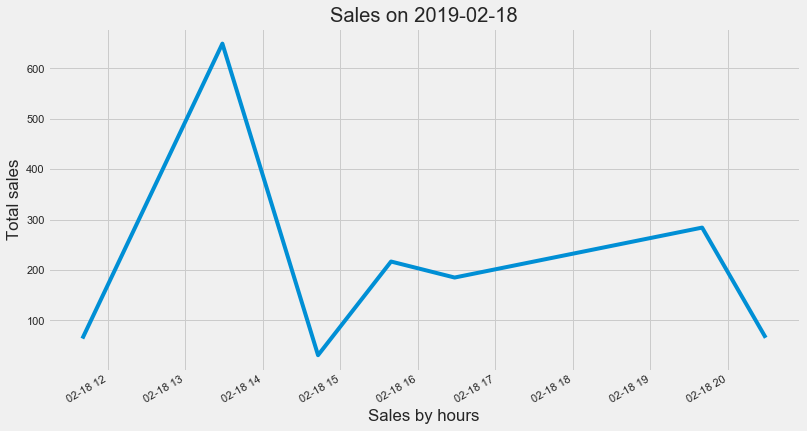

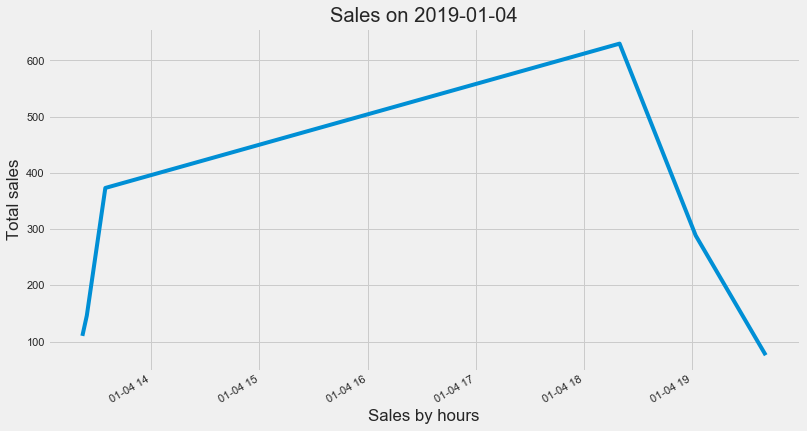

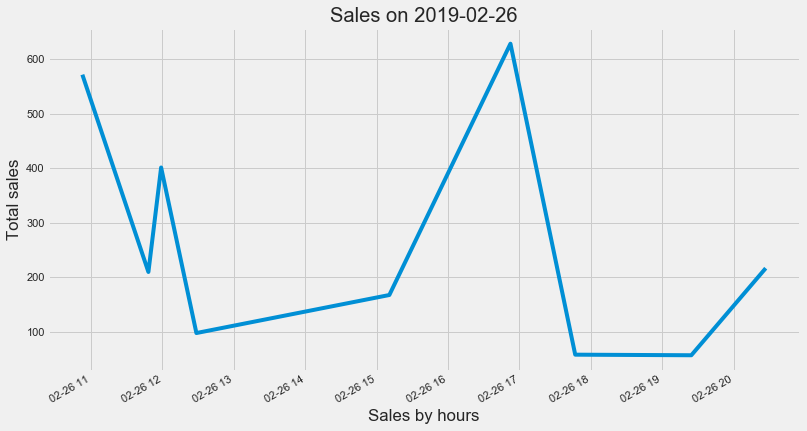

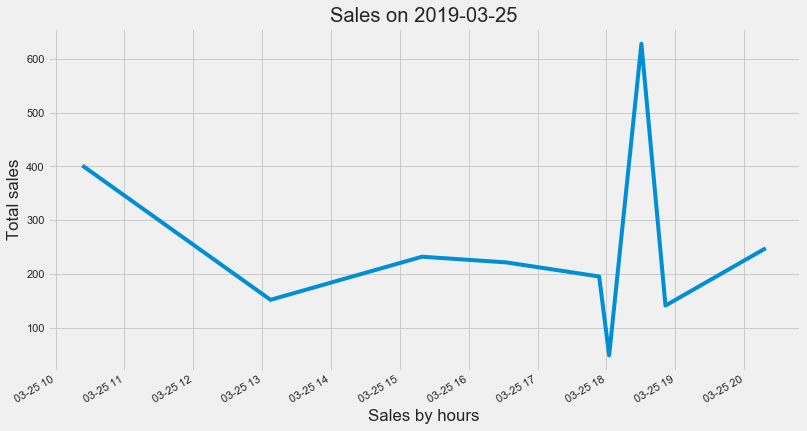

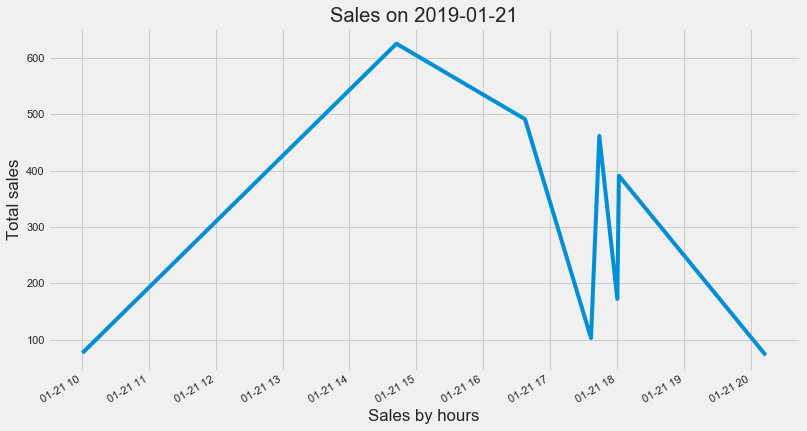

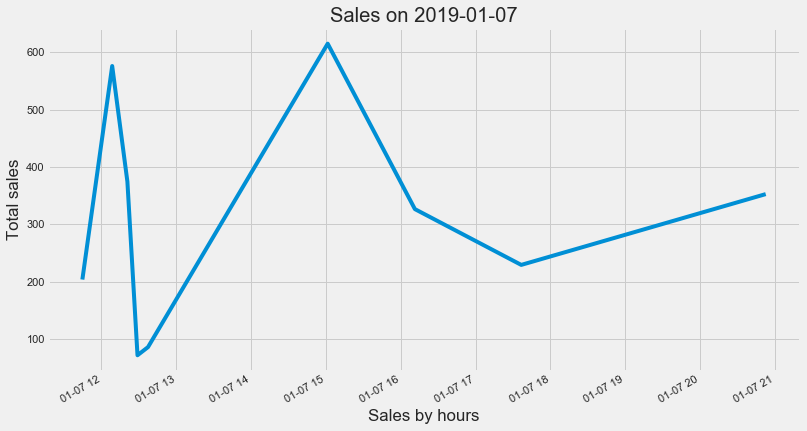

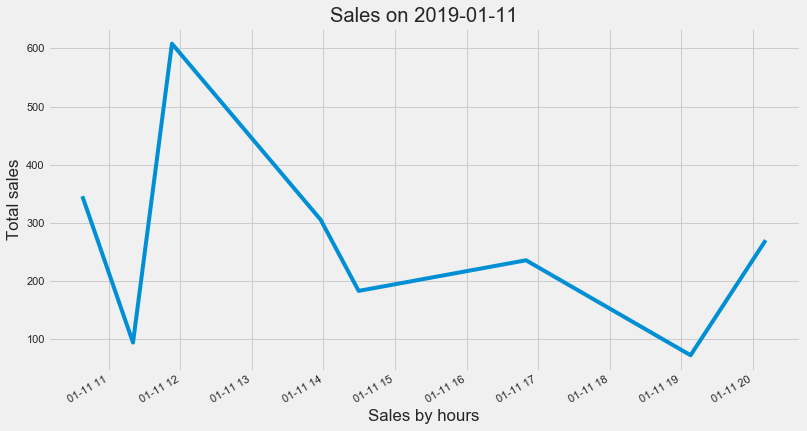

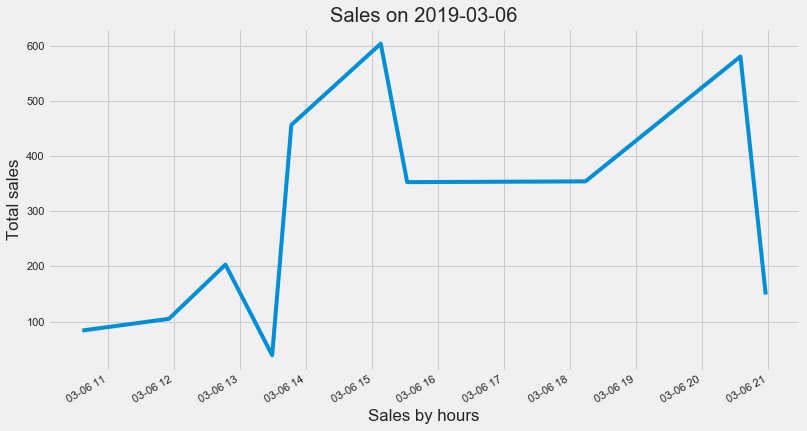

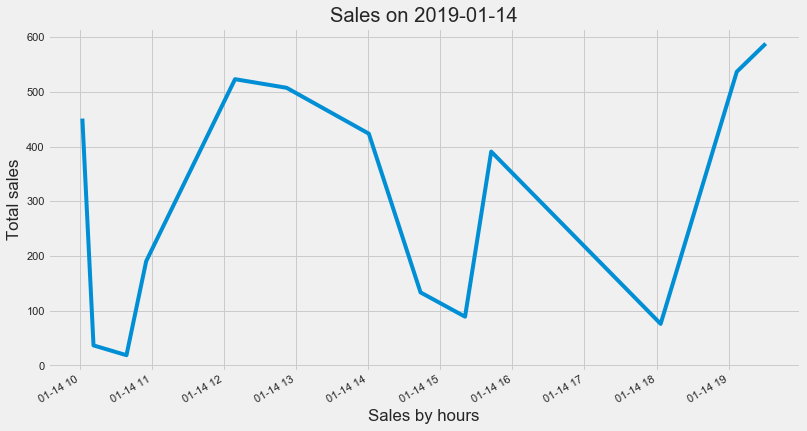

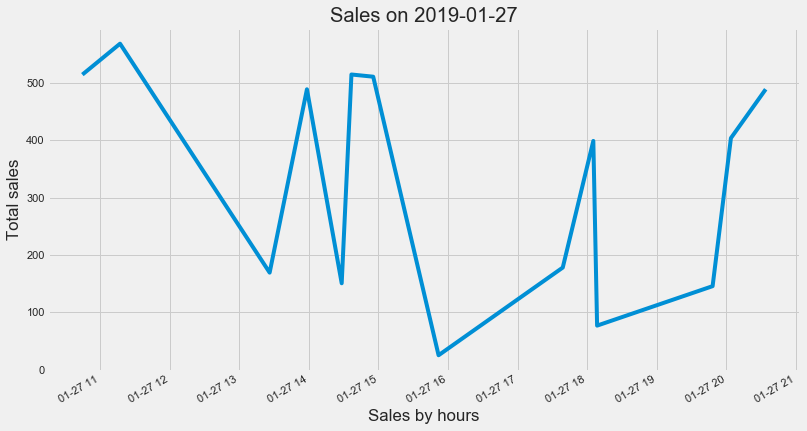

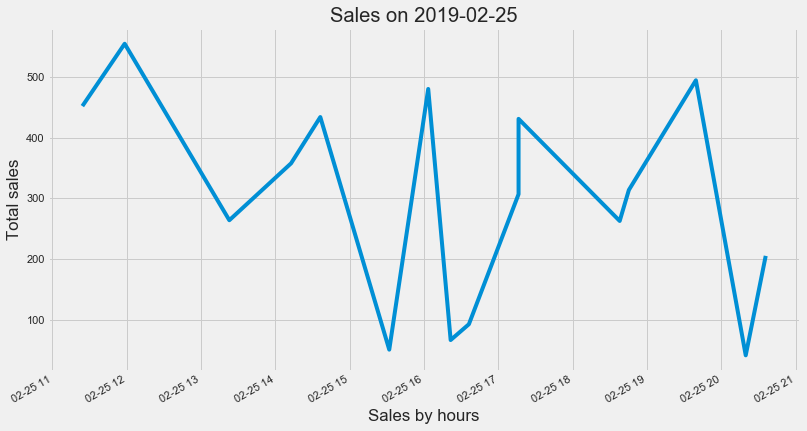

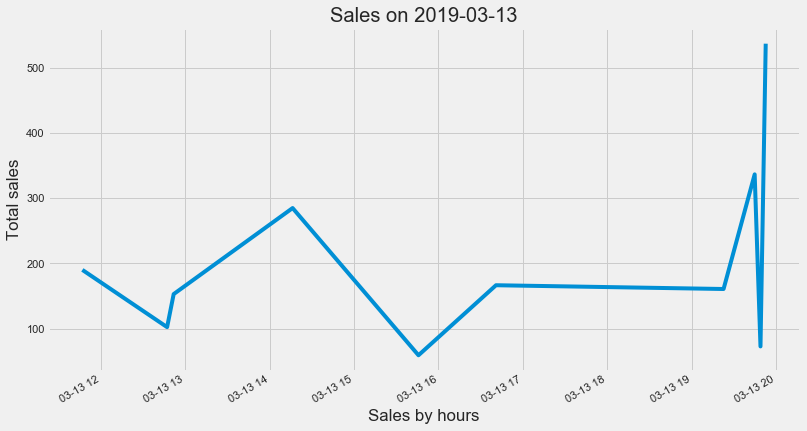

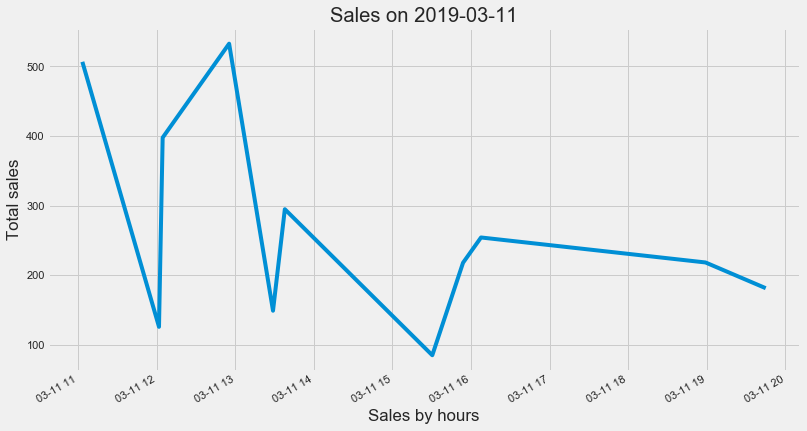

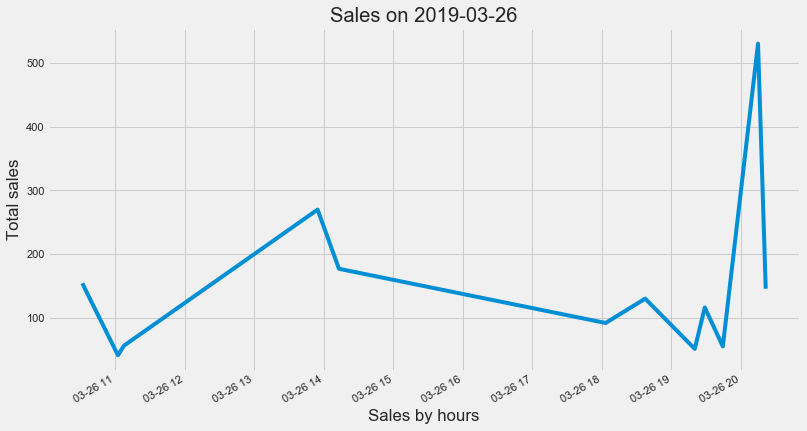

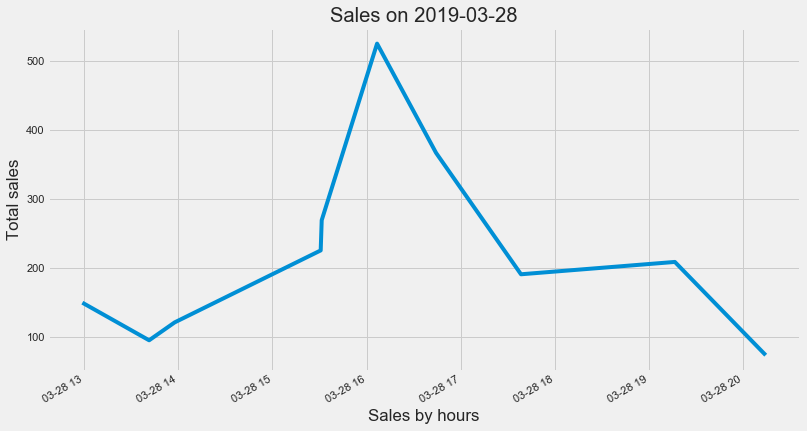

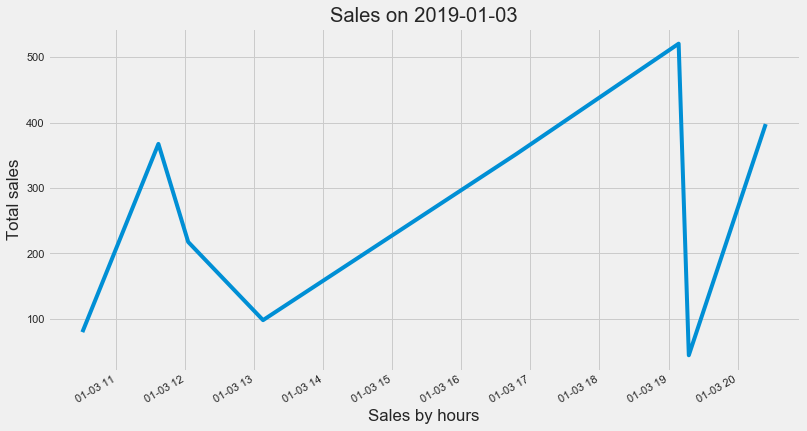

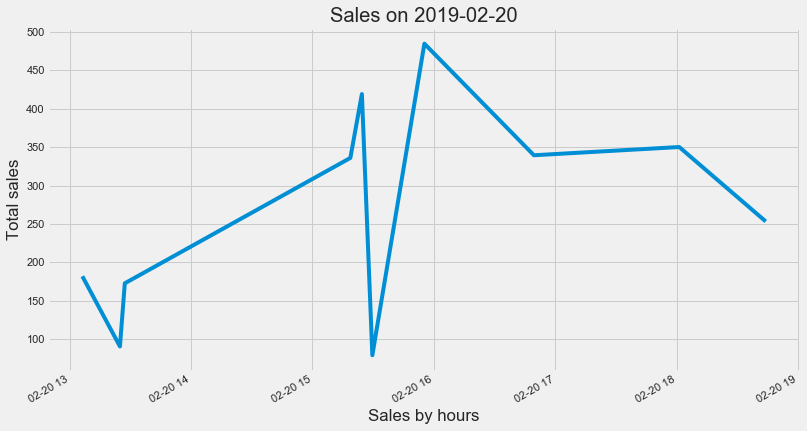

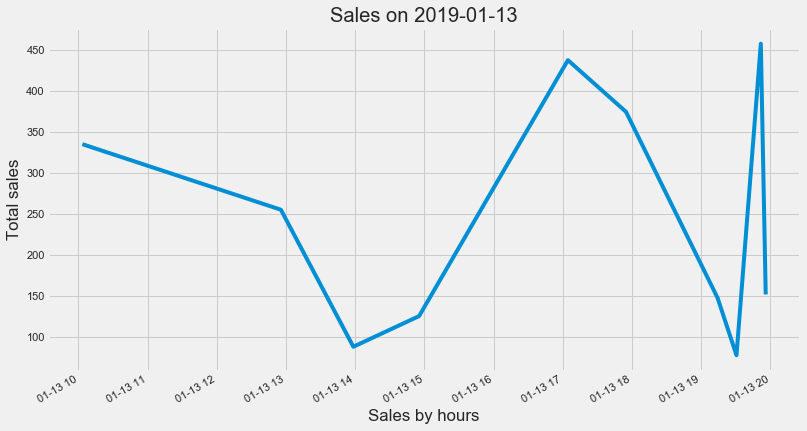

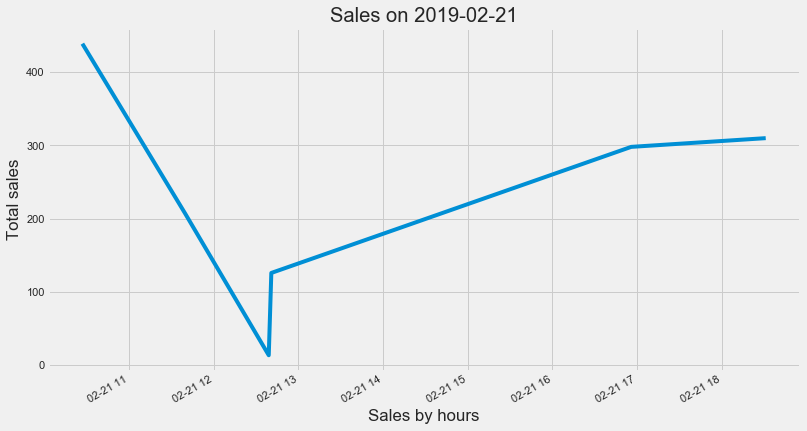

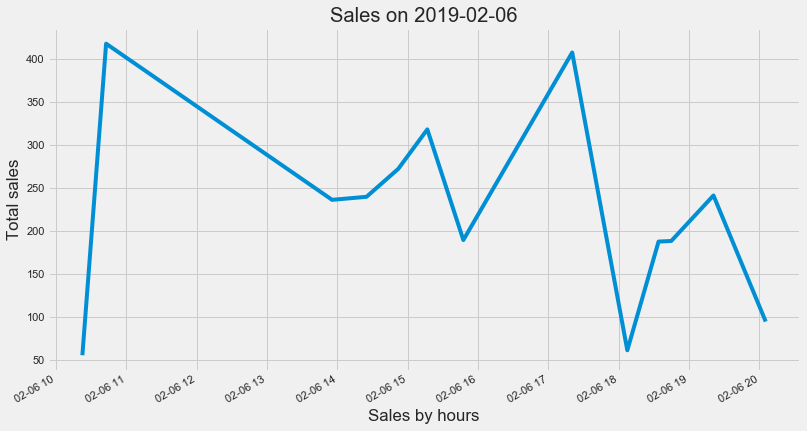

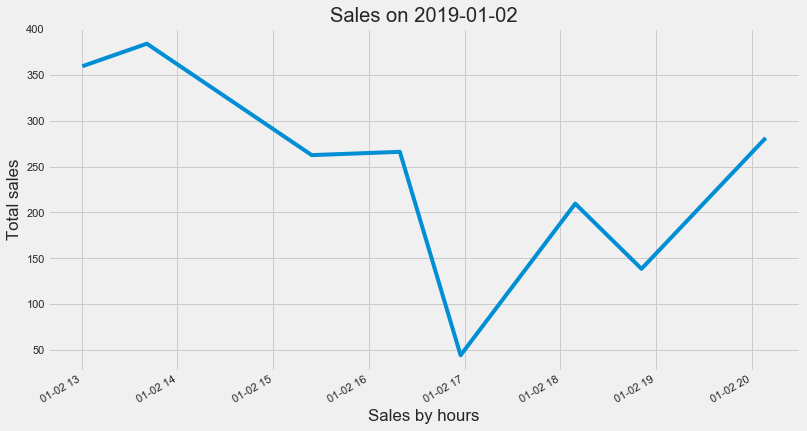

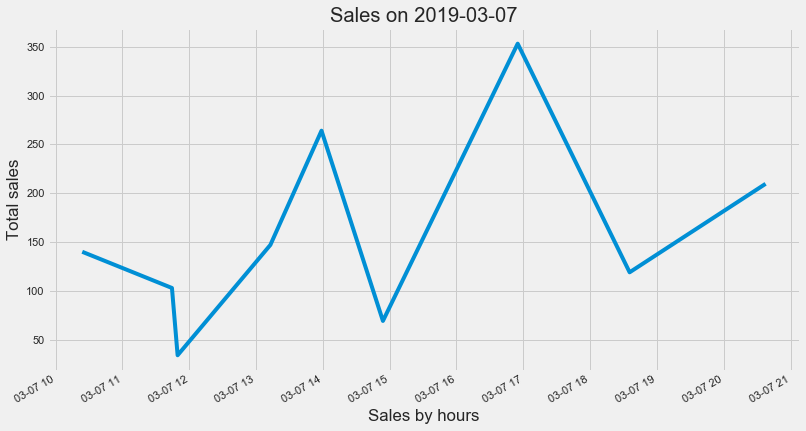

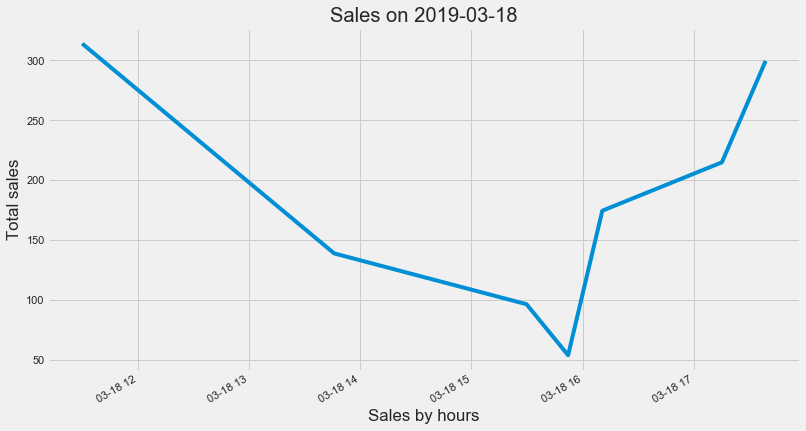

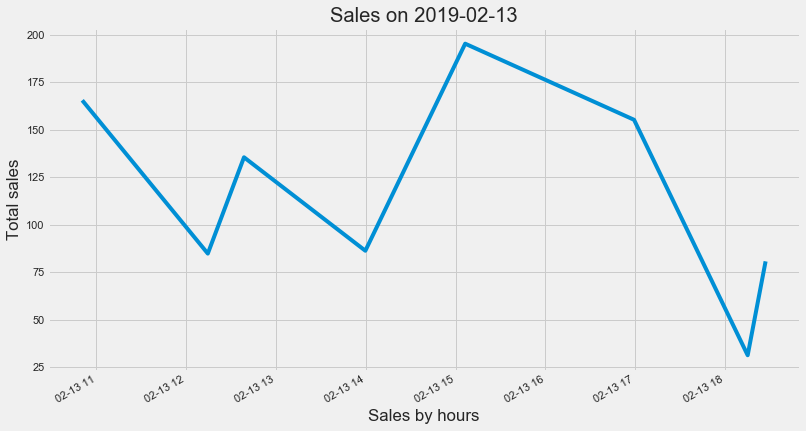

In [64]:
# fig, ax = plt.subplots(1, len(business_dates), sharey=True)
business_dates: List[Timestamp] = pd.DataFrame(sales.Total.resample('1D').max()).sort_values('Total', ascending=False).index.tolist() 
for index,business_date in enumerate(pd.DataFrame(sales.Total.resample('1D').max()).sort_values('Total', ascending=False).index):
    busy_day: str = str( business_date).split(' ')[0]
    #print(f"[\033[92m+\033[0m] Business Date: {busy_day}")
    # Todo: Get store branch and location 
    sales[busy_day]['Total'].plot()
    plt.title(f"Sales on {busy_day}")
    plt.xlabel("Sales by hours")
    plt.ylabel("Total sales")
    plt.savefig(f"busy_store_{busy_day}.jpg")
    plt.show() 

### Sales on New Years 

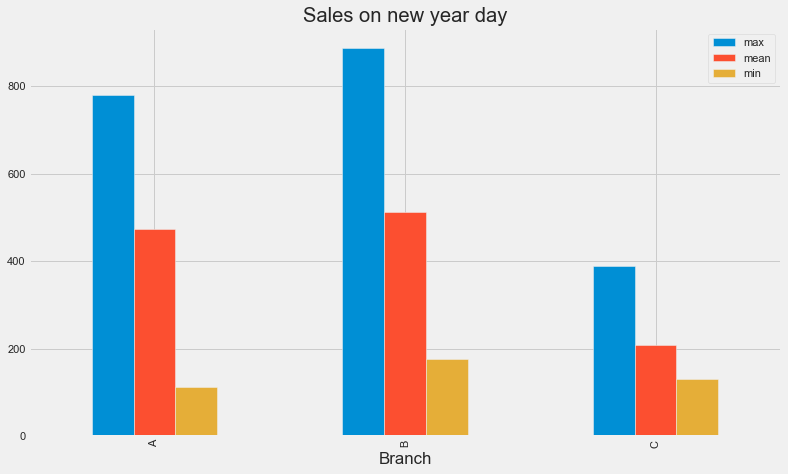

In [65]:
sales[ str(list(filter(lambda operation_date: str(operation_date).split(' ')[0] == "2019-01-01", business_dates) )[0] ).split(" ")[0] ].groupby('Branch')['Total'].agg(['max', 'mean','min']).plot(kind='bar')
plt.title("Sales on new year day")
plt.grid(True)

### b.Average money spend in a single transaction 
- People spend in avearge about $322.97 

In [66]:
round( sales.describe()['Total'].to_dict().get('mean'), 4 )

322.9667

### c.Sales Members vs Non-Members

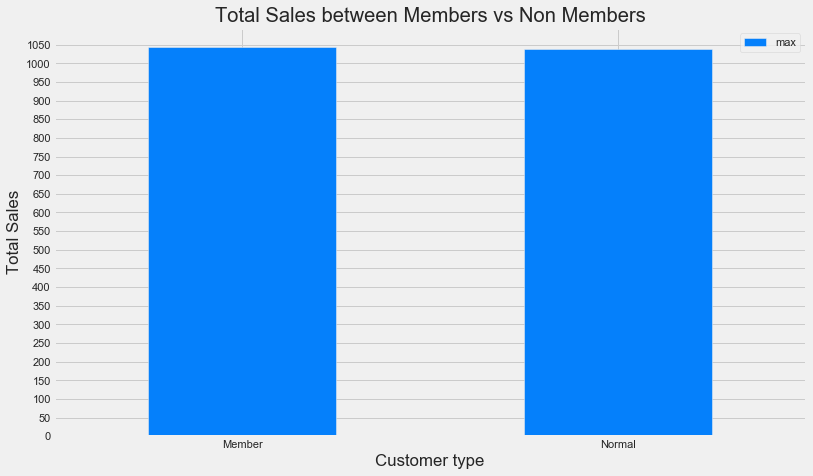

In [67]:
sales['Customer type'].map({'Member': 'Member', 'Normal': 'Non-Member'})
sales.groupby('Customer type').agg(['max'])['Total'].plot(kind='bar',colormap=ListedColormap(["#0580FB"]), rot=0)
plt.yticks(range(0,1100, 50))
plt.title("Total Sales between Members vs Non Members")
plt.ylabel("Total Sales")
plt.grid(True)

### d.Branch avearge profit each months 

In [68]:
pd.DataFrame( sales.groupby('Branch')['Total'].resample('M').mean() )

Total
Branch Date                  
A      2019-01-31  325.051500
       2019-02-28  317.660856
       2019-03-31  296.528516
B      2019-01-31  334.919446
       2019-02-28  315.819000
       2019-03-31  308.904844
C      2019-01-31  331.431811
       2019-02-28  329.349825
       2019-03-31  350.934368

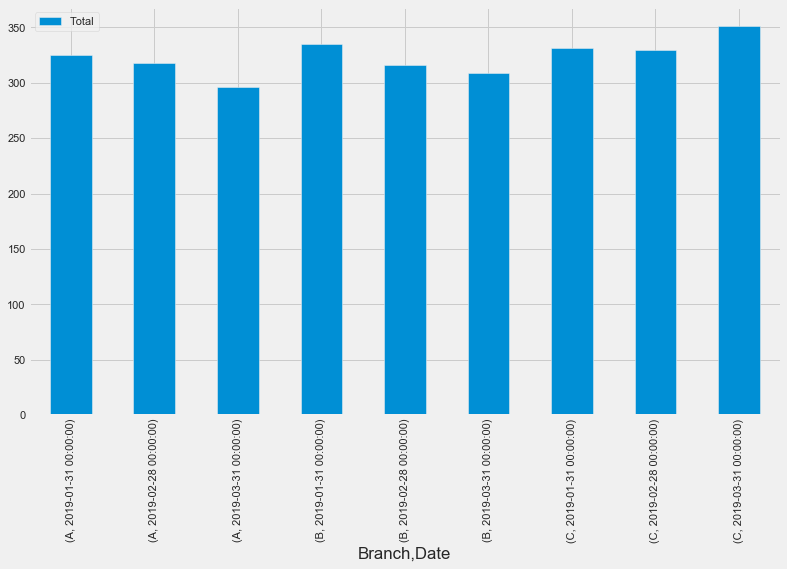

In [69]:
pd.DataFrame( sales.groupby('Branch')['Total'].resample('M').mean() ).plot(kind='bar') # .plot(kind='bar')  #.hist(by='Total',sharey=True) 


### e.Branch with the most customer but lower profit

In [70]:
sales.groupby('Branch').agg(['min','count'])['Total']

min  count
Branch                
A       12.6945    340
B       18.6375    332
C       10.6785    328

Text(0.5, 1.0, 'Branch with the most customer but lower profit ')

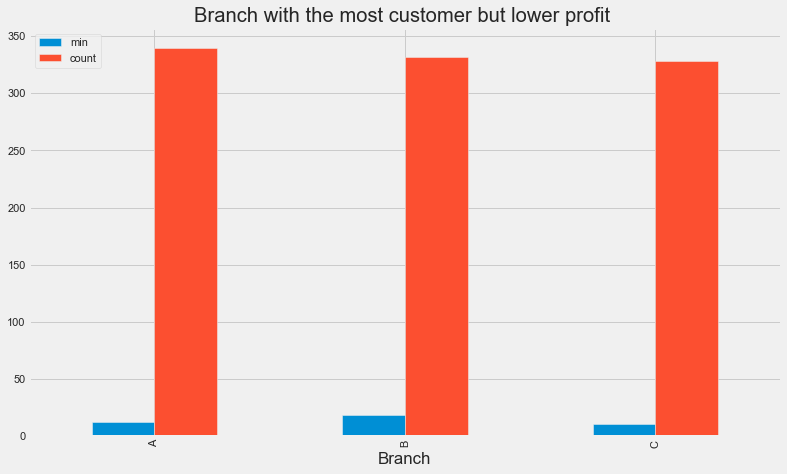

In [71]:
sales.groupby('Branch').agg(['min','count'])['Total'].plot(kind='bar')
plt.grid(True)
plt.title("Branch with the most customer but lower profit ")

### f.Product lines sales in January , February and March

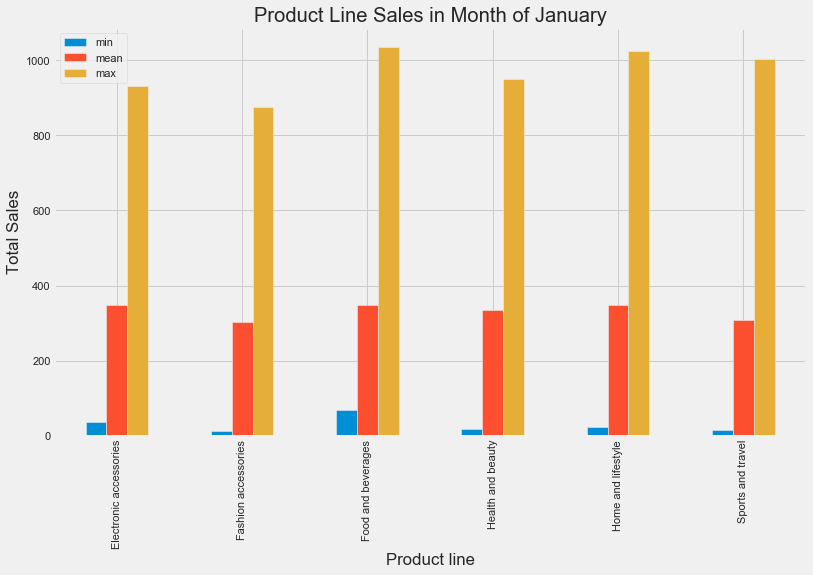

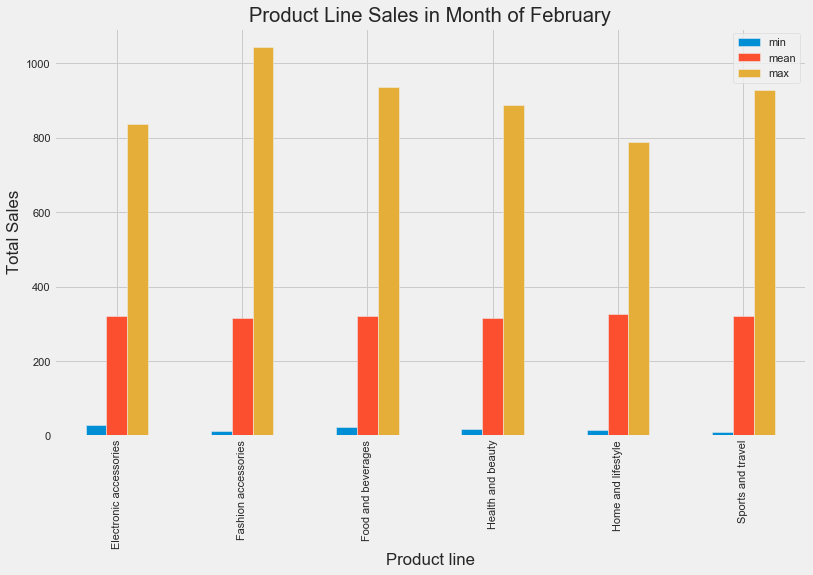

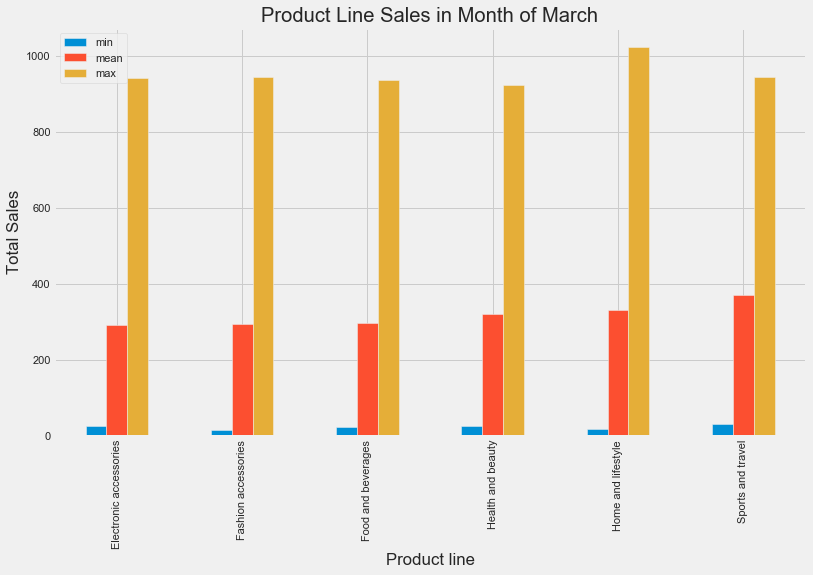

In [72]:
for index,month in enumerate(range(1,4)):
    sales[f'2019-0{month}'].groupby('Product line')['Total'].agg(['min','mean', 'max']).plot(kind='bar')
    map_months: List[str] = list( map(lambda month: 'January' if month == 1  else 'February' if month == 2 else 'March', range(1,4)) )
    plt.title(f"Product Line Sales in Month of {map_months[index]}")
    plt.ylabel("Total Sales")

# K-Means Clustering 

### Descriptions: Clusters based on 
- Locations 
- Branch 
- Customer Types 
- Genders 
- Incomes
- Rating
- Products sold 
- Price

In [73]:
# Clusters sales based on the following columns
col_names: List[str] = sales.columns.tolist()
sales[[col_names[7], col_names[9]]] = sales[[col_names[7], col_names[9]]].astype(float)
clusters: List[str] = [col_names[7], col_names[9]] + col_names[13:]

In [74]:
pd.plotting.scatter_matrix( sales[clusters] , figsize=(150,150))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020601630408>,
      dtype=object)

In [75]:
#Printing the Cluter Score
km_sales = KMeans(n_clusters=np.random.randint(5,10), random_state=np.random.randint(100,150))
km_sales.fit(sales[clusters])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=148, tol=0.0001, verbose=0)

In [76]:
# Number of cluster equals random number from 5 - 10  
sales['sales_cluster'] = km_sales.labels_

# The score from K Means Cluster

In [77]:
# Sillhouete scores 
silhouette_score(sales[clusters], km_sales.labels_ )

0.555794951064128

In [78]:
cluster_colors: List[str] = np.array( ['red', 'blue', 'gold', 'darkviolet', 'lime', 'yellow', 'green', 'blueviolet', 'lime', 'tomato', 'orangered','aqua','cyan', 'turquoise','steelblue'] )
cluster_colors

array(['red', 'blue', 'gold', 'darkviolet', 'lime', 'yellow', 'green',
       'blueviolet', 'lime', 'tomato', 'orangered', 'aqua', 'cyan',
       'turquoise', 'steelblue'], dtype='<U10')

# So, this is the first cluster analysis with these columns:
- Locations 
- Branch 
- Customer Types 
- Genders 
- Incomes
- Rating
- Products sold 
- Price

In [79]:
sales.groupby('sales_cluster').mean() 

Unit price  Quantity     Tax 5%       Total        cogs  \
sales_cluster                                                            
0               57.094823  5.404255  13.247184  278.190872  264.943688   
1               92.128718  9.666667  44.452436  933.501154  889.048718   
2               77.914559  7.882353  29.792257  625.637404  595.845147   
3               37.754680  2.580000   3.383358   71.050518   67.667160   
4               59.845932  6.703390  18.336530  385.067123  366.730593   
5               43.958084  4.934579   8.321890  174.759694  166.437804   
6               69.132551  7.244898  23.821230  500.245821  476.424592   
7               84.000556  8.791667  36.487257  766.232396  729.745139   

               gross margin percentage  gross income    Rating       long  \
sales_cluster                                                               
0                             4.761905     13.247184  6.883688  19.219905   
1                             4.761905     44.452436  6.892308  19.731951   
2                             4.761905     29.792257  6.530882  19.621491   
3                             4.761905      3.383358  6.822800  19.582666   
4                             4.761905     18.336530  7.066949  19.846151   
5                             4.761905      8.321890  7.297196  19.429167   
6                             4.761905     23.821230  7.183673  19.267182   
7                             4.761905     36.487257  6.722222  19.580640   

                     lat  
sales_cluster             
0              96.127741  
1              96.105136  
2              96.116224  
3              96.119416  
4              96.115420  
5              96.125705  
6              96.126741  
7              96.122961

# NOW WE ARE GOING TO LOOK FOR ANOTHER CLUSTERS IN FOLLOWING COLUMNS
# Mapping Columns

In [80]:
# Factorize catogries attributes
sales['Map_Payment'] = pd.factorize(sales['Payment'])[0] # PAYMENT 
sales['Map_Gender'] = pd.factorize(sales['Gender'])[0]
sales['Map_City'] = pd.factorize(sales['City'])[0]
sales['Map_Branch'] = pd.factorize(sales['Branch'])[0]
sales['Map_Product_Line'] = pd.factorize(sales['Product line'])[0]
sales['Map_Customer_Type'] = pd.factorize(sales['Customer type'])[0]
col_names: List[str] = sales.columns.tolist() # store the colum names 

## Relationship: Gross Income vs Store Locations 

Text(0, 0.5, 'Gross Income')

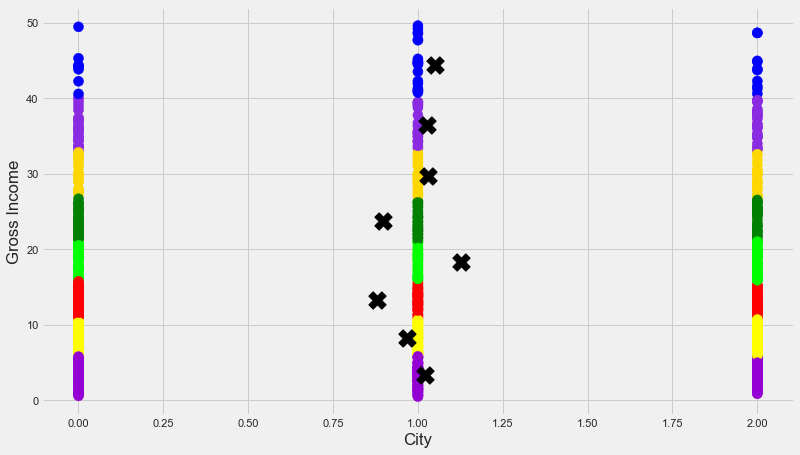

In [81]:
cluster_centers = sales.groupby('sales_cluster').mean() 
plt.scatter(sales['Map_City'], sales['gross income'], c=cluster_colors[sales['sales_cluster']], s=100 )
plt.scatter(cluster_centers['Map_City'], cluster_centers['gross income'], linewidths=1, marker="X",  c='black',s=300 )
plt.xlabel("City")
plt.ylabel("Gross Income")

So, we can see that City 1 (Yangon) has most number of cluster

### Rating vs Total

In [82]:
table_colors = pd.DataFrame.from_dict( cluster_colors )
table_colors.columns = ['Table Colors']
table_colors 

Table Colors
0           red
1          blue
2          gold
3    darkviolet
4          lime
5        yellow
6         green
7    blueviolet
8          lime
9        tomato
10    orangered
11         aqua
12         cyan
13    turquoise
14    steelblue

Text(0, 0.5, 'Total')

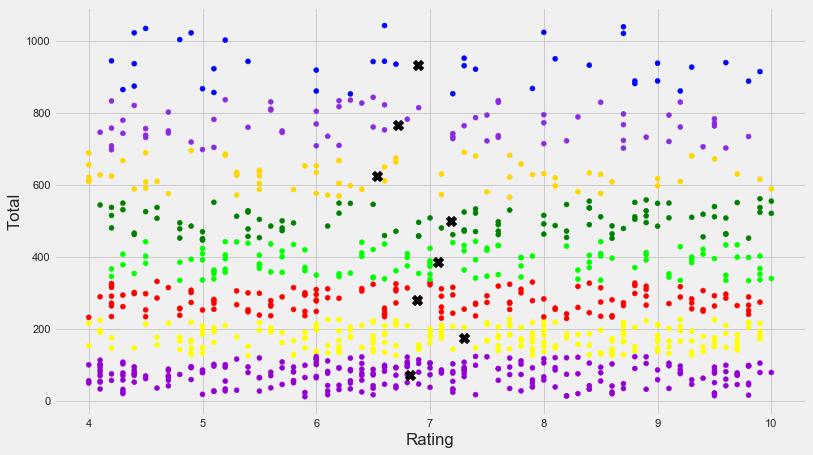

In [83]:
cluster_centers = sales.groupby('sales_cluster').mean() 
plt.scatter(sales['Rating'], sales['Total'], c=cluster_colors[sales['sales_cluster']], s=25 )
plt.scatter(cluster_centers['Rating'], cluster_centers['Total'], linewidths=1, marker="X",  c='black',s=100 )
plt.xlabel("Rating")
plt.ylabel("Total")

### Rating vs Gross Income 

In [84]:
sales['Total'].max() 

1042.65

Text(0, 0.5, 'Rating')

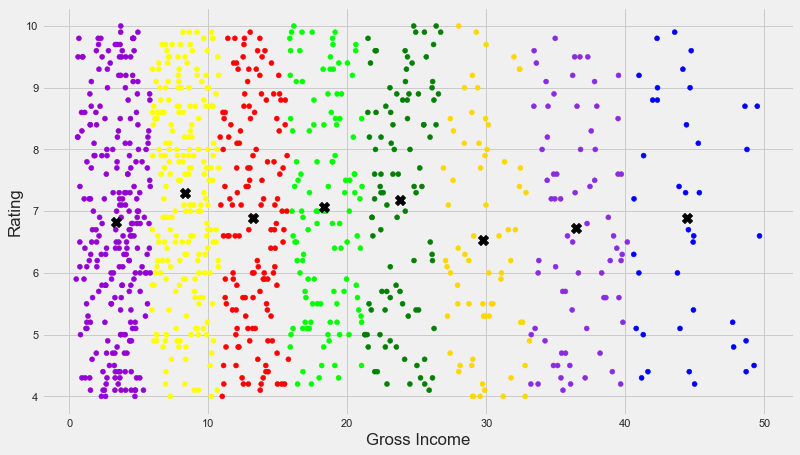

In [85]:
plt.scatter(sales['gross income'], sales['Rating'], c=cluster_colors[sales['sales_cluster']], s=25 )
plt.scatter(cluster_centers['gross income'], cluster_centers['Rating'], linewidths=1, marker="X",  c='black',s=100 )
plt.xlabel("Gross Income")
plt.ylabel("Rating")

# Now we are going to check all the features in a cluster.
### Scatter Matrix Clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020601881748>,
      dtype=object)

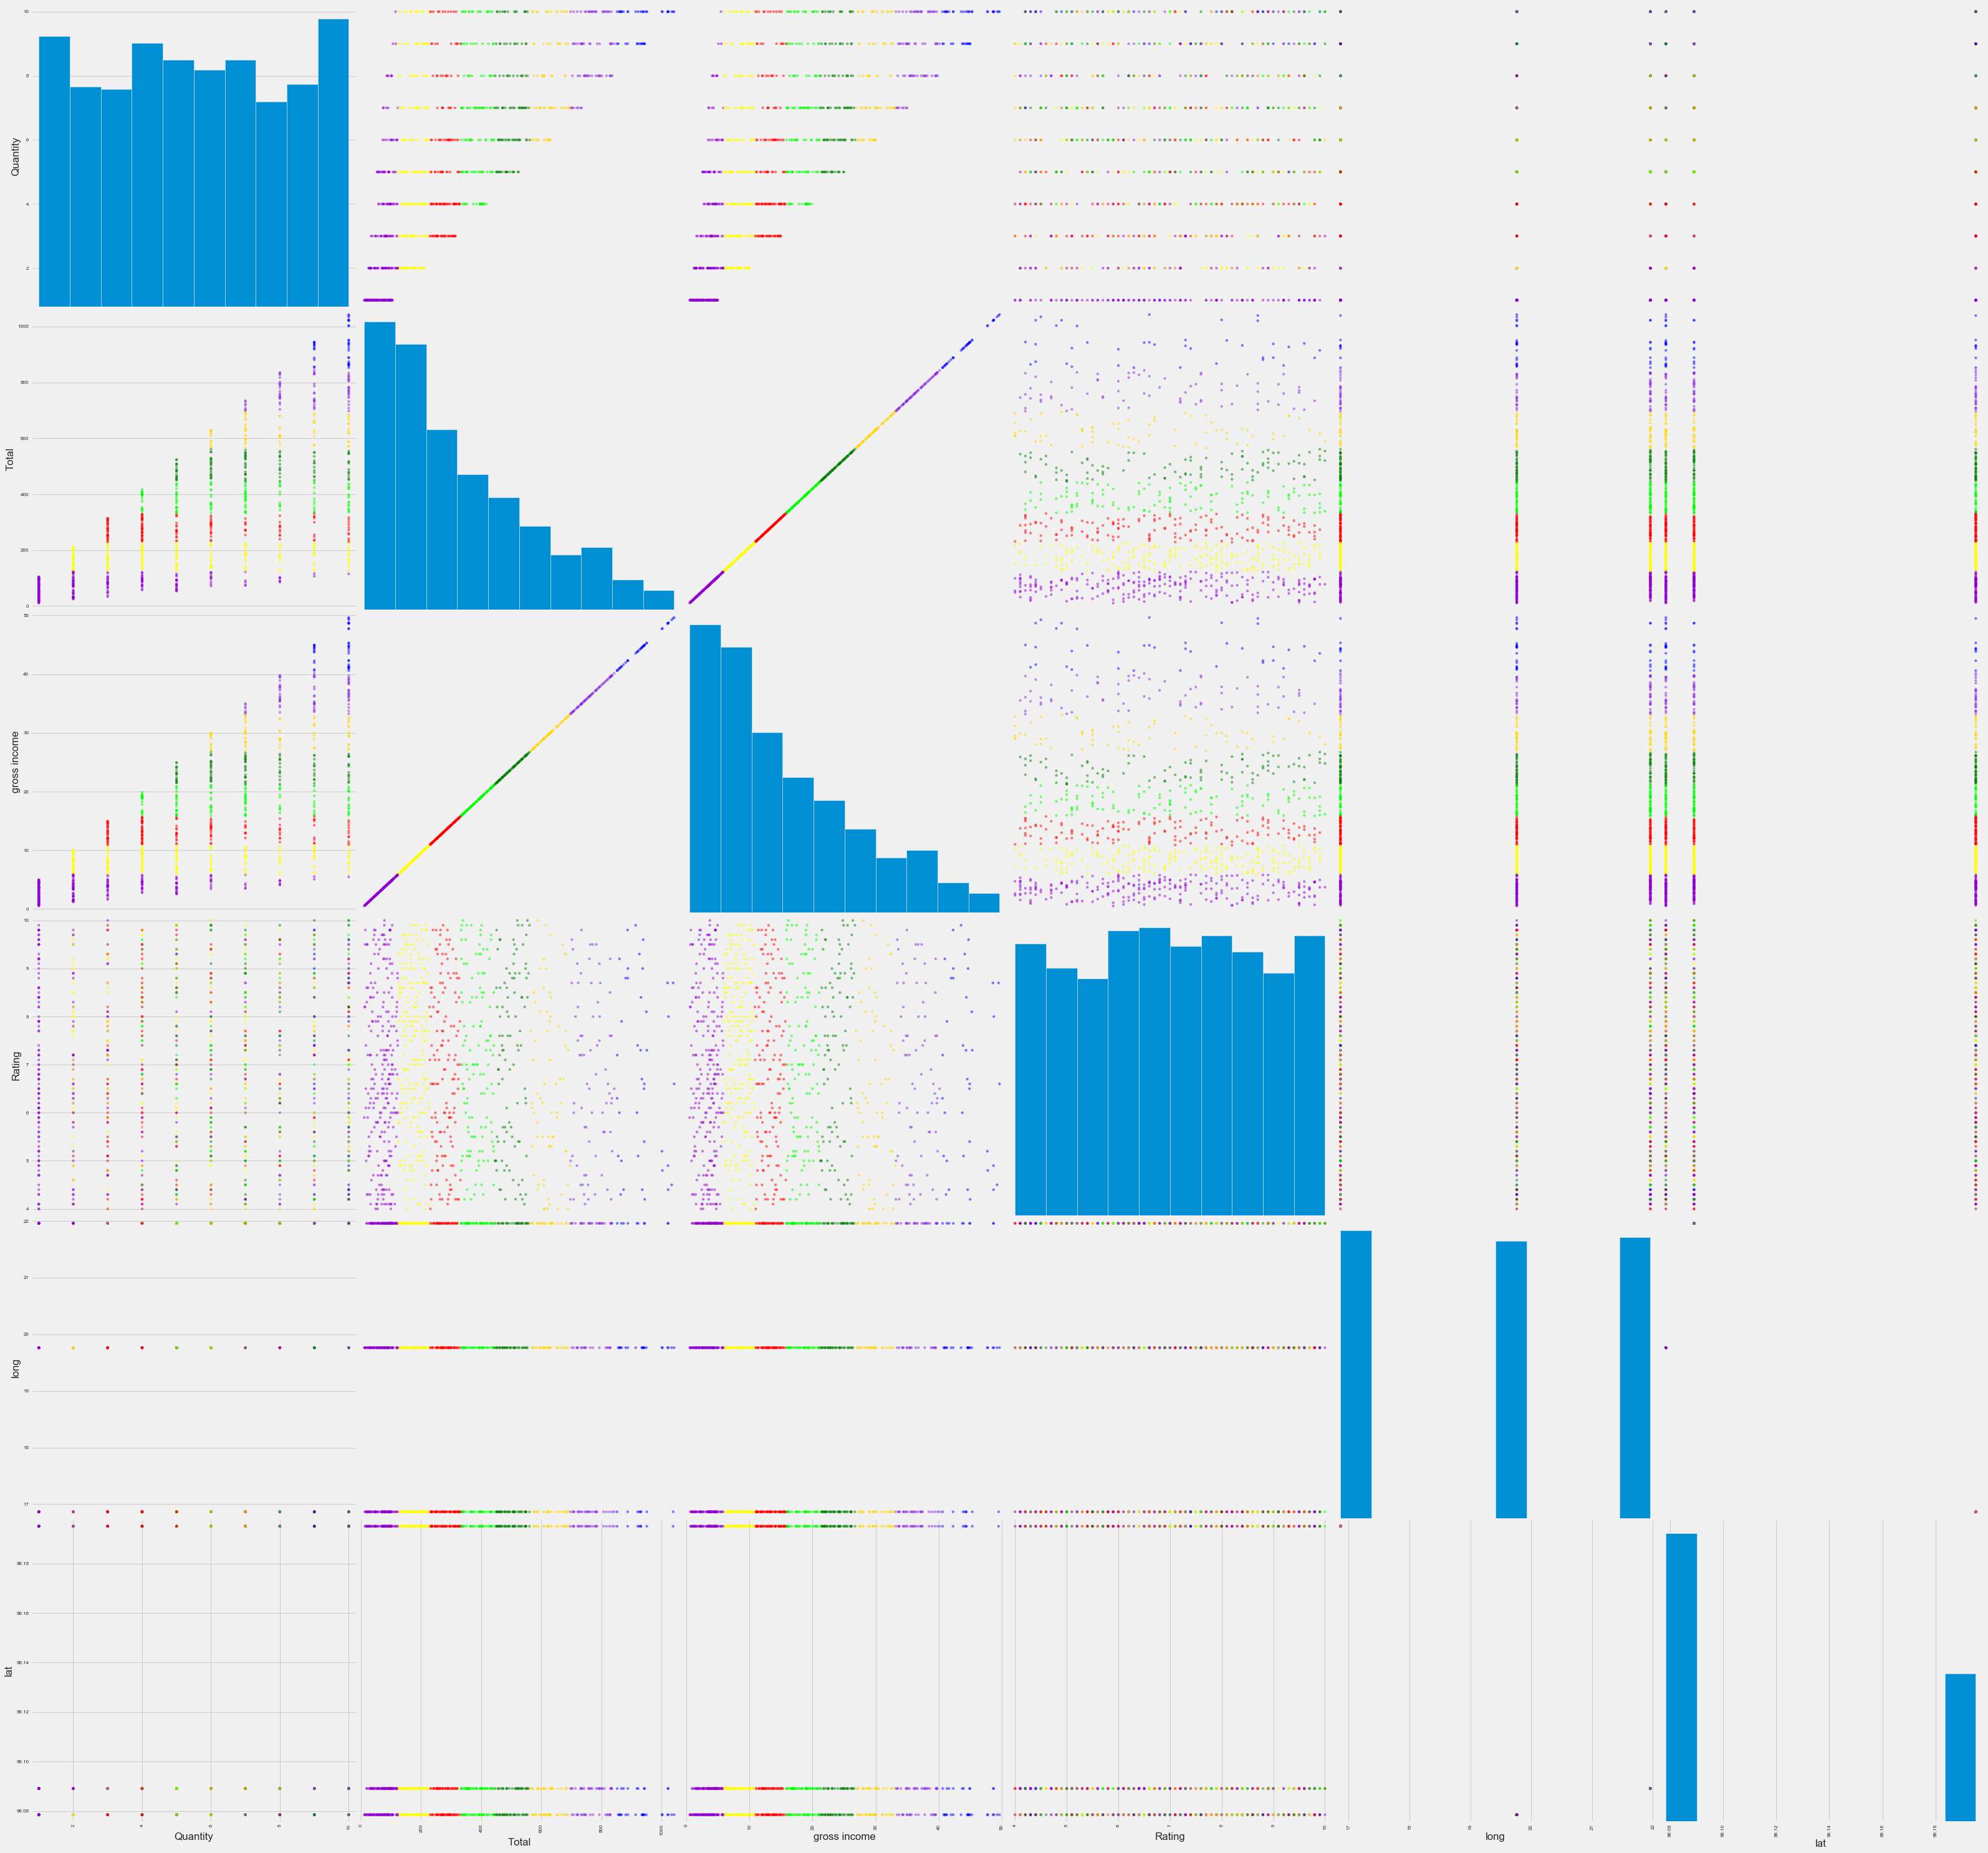

In [86]:
pd.plotting.scatter_matrix(sales[clusters], c=cluster_colors[sales['sales_cluster']], figsize=(50,50), s=75)

### The best n_cluster based on Sillhoute scores

In [87]:
cluster_ranges = range(5,100)
inertias: List[float] = []
silhouette_scores: List[float] = [] 
for n_cluster in cluster_ranges:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(sales[clusters])
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sales[clusters], kmeans.labels_))

In [88]:
# Datframe Silhouette Scores and Inertias 
cluster_scores = pd.DataFrame(np.array([inertias, silhouette_scores]).transpose() , columns=['Inertias', 'Silhouete Scores'], index=range(5,100))

In [89]:
cluster_scores[ cluster_scores['Silhouete Scores'] == cluster_scores['Silhouete Scores'].max() ] # The best n_cluster = 7

Inertias  Silhouete Scores
7  1.421386e+06          0.560909

### The best n_cluster based on Elbow Methods 

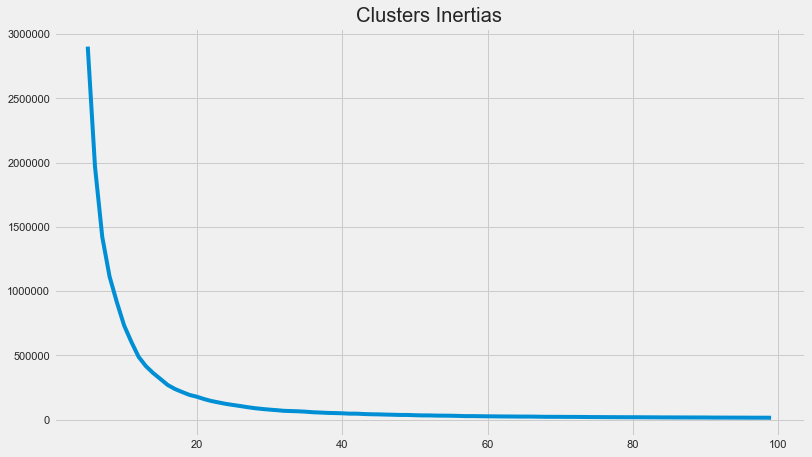

In [90]:
cluster_scores['Inertias'].plot() 
plt.title("Clusters Inertias")
plt.grid(True)

Text(0, 0.5, 'Silhouette Coefficients')

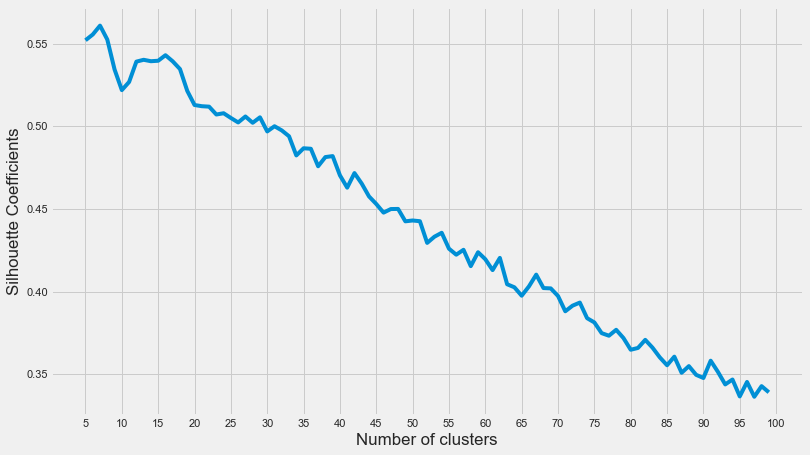

In [91]:
cluster_scores['Silhouete Scores'].plot() 
plt.xticks(range(5,101,5))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

### Scaled Models, Where n_cluster = 7

In [92]:
scaled_models: List[float] = [] 
for n_cluster in range(5,101):
    kmeans = KMeans(n_clusters=n_cluster, random_state=np.random.randint(100,150))
    kmeans.fit( StandardScaler().fit_transform(sales[clusters]) )
    scaled_models.append( silhouette_score(StandardScaler().fit_transform(sales[clusters]), kmeans.labels_) )

In [93]:
cluster_scores['scaled_silhouette'] = scaled_models[0:95]

([<matplotlib.axis.XTick at 0x20603a8af88>,
 <a list of 20 Text xticklabel objects>)

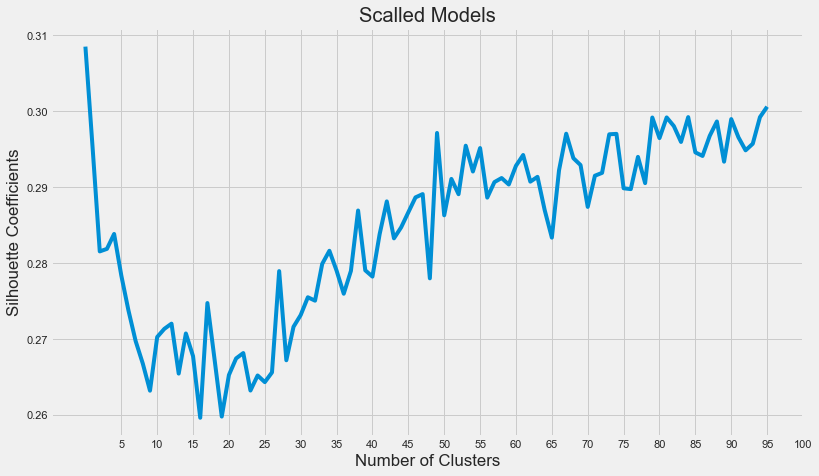

In [94]:
plt.plot(scaled_models)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.title("Scalled Models")
plt.xticks(range(5,101,5))

In [95]:
cluster_scores[ cluster_scores['scaled_silhouette']  == cluster_scores['scaled_silhouette'].max() ]

Inertias  Silhouete Scores  scaled_silhouette
5  2.903237e+06          0.552043           0.308526

### Scalled Model n_cluster=100 

In [96]:
kmeans = KMeans(n_clusters=99, random_state=123)
kmeans.fit(StandardScaler().fit_transform(sales[clusters]))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=99, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

# Random Forest Regression

A randomforest model is created and then the training data is fit to that model. Later the trained model is used to predict in order to validate the model. The mean absolute error is calculated to estimate the error difference between the predicted values and the actual values.

In [97]:
pd.DataFrame(sales.Payment.value_counts())

Payment
Ewallet          345
Cash             344
Credit card      311

In [98]:
sales.rename(columns={'Product line':'Product_line'} , inplace=True)

# Payment method opted with respect to the product category

Text(0.5, 1.0, 'Product line')

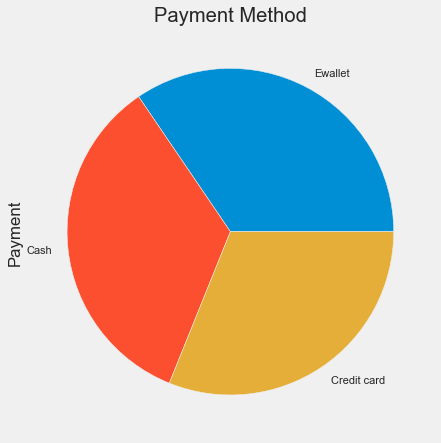

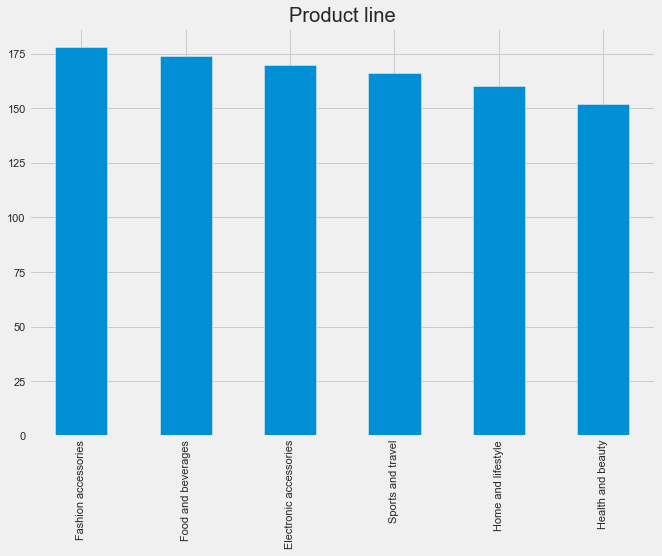

In [99]:
plt.figure(figsize = (10,7));sales.Payment.value_counts().plot(kind = "pie" );plt.title("Payment Method")
plt.figure(figsize = (10,7));sales.Product_line.value_counts().plot(kind = "bar" );plt.title("Product line")

## Here in the bar chart and pie chart we found that  the most sold goods are Fashon Accessories and most used payment methods Cash and E-Wallet

## Now lets check which Gender puts more ratings. So that we can measure rating as a sales features.

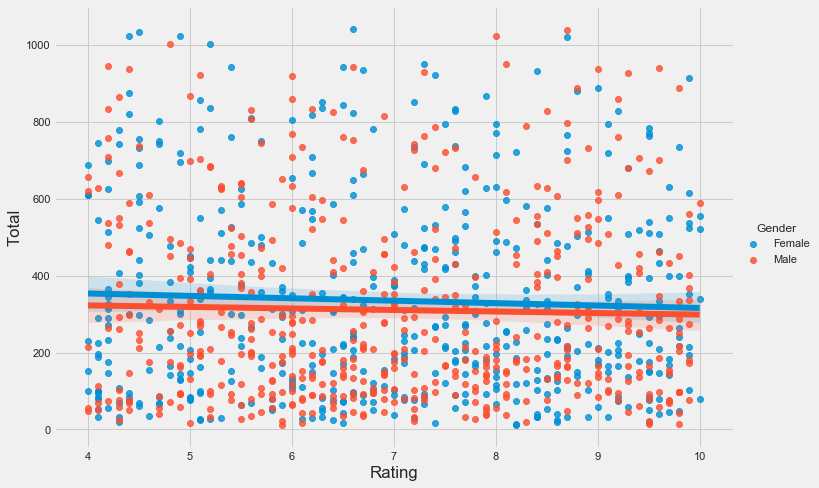

In [100]:
sns.lmplot(x = 'Rating' , y = 'Total' , data = sales, hue = 'Gender' , height = 7 , aspect = 1.5)

In [101]:
#Making Rating as Measure to Find Sales Features (Product-Line, Unit Price, Quantity, Tax, Customer type, City)
y = sales['Rating']
features = ['Product_line', 'Unit price','Quantity','Tax 5%','Customer type','City'] #sale Features
X = sales[features]
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
train_X= pd.get_dummies(train_X)
train_y= pd.get_dummies(train_y)
val_X= pd.get_dummies(val_X)
val_y= pd.get_dummies(val_y)
train_X.head()

Unit price  Quantity   Tax 5%  \
Date                                                 
2019-01-25 15:54:55       60.01       4.0  12.0020   
2019-01-19 19:39:36       43.18       8.0  17.2720   
2019-01-05 16:05:40       70.74       4.0  14.1480   
2019-01-29 15:48:28       27.93       5.0   6.9825   
2019-03-02 17:16:52       97.38      10.0  48.6900   

                     Product_line_Electronic accessories  \
Date                                                       
2019-01-25 15:54:55                                    0   
2019-01-19 19:39:36                                    0   
2019-01-05 16:05:40                                    0   
2019-01-29 15:48:28                                    0   
2019-03-02 17:16:52                                    0   

                     Product_line_Fashion accessories  \
Date                                                    
2019-01-25 15:54:55                                 0   
2019-01-19 19:39:36                                 0   
2019-01-05 16:05:40                                 0   
2019-01-29 15:48:28                                 0   
2019-03-02 17:16:52                                 0   

                     Product_line_Food and beverages  \
Date                                                   
2019-01-25 15:54:55                                0   
2019-01-19 19:39:36                                1   
2019-01-05 16:05:40                                0   
2019-01-29 15:48:28                                0   
2019-03-02 17:16:52                                0   

                     Product_line_Health and beauty  \
Date                                                  
2019-01-25 15:54:55                               0   
2019-01-19 19:39:36                               0   
2019-01-05 16:05:40                               0   
2019-01-29 15:48:28                               0   
2019-03-02 17:16:52                               0   

                     Product_line_Home and lifestyle  \
Date                                                   
2019-01-25 15:54:55                                1   
2019-01-19 19:39:36                                0   
2019-01-05 16:05:40                                1   
2019-01-29 15:48:28                                0   
2019-03-02 17:16:52                                1   

                     Product_line_Sports and travel  Customer type_Member  \
Date                                                                        
2019-01-25 15:54:55                               0                     1   
2019-01-19 19:39:36                               0                     0   
2019-01-05 16:05:40                               0                     1   
2019-01-29 15:48:28                               1                     1   
2019-03-02 17:16:52                               0                     0   

                     Customer type_Normal  City_Mandalay  City_Naypyitaw  \
Date                                                                       
2019-01-25 15:54:55                     0              0               0   
2019-01-19 19:39:36                     1              0               1   
2019-01-05 16:05:40                     0              0               0   
2019-01-29 15:48:28                     0              0               0   
2019-03-02 17:16:52                     1              1               0   

                     City_Yangon  
Date                              
2019-01-25 15:54:55            1  
2019-01-19 19:39:36            0  
2019-01-05 16:05:40            1  
2019-01-29 15:48:28            1  
2019-03-02 17:16:52            0

# Training and testing the data set using RandomForestRegressor Model

In [102]:
leaf_model = RandomForestRegressor(random_state = 1)
leaf_model.fit(train_X,train_y)
predict_value = leaf_model.predict(val_X)
predict_value
mean_error = mean_absolute_error(val_y,predict_value)
print('The Mean Absolute Error is : {}'.format(mean_error))

The Mean Absolute Error is : 0.032192786885245864


## This is the Mean Absolute Error 0.032

# Anomaly Detection

Now we are going to check for outliers or values that out of bound by using anomaly detection. In this section, we are going to use box-plot and scatter diagram to check the outliers in some columns.

In [103]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

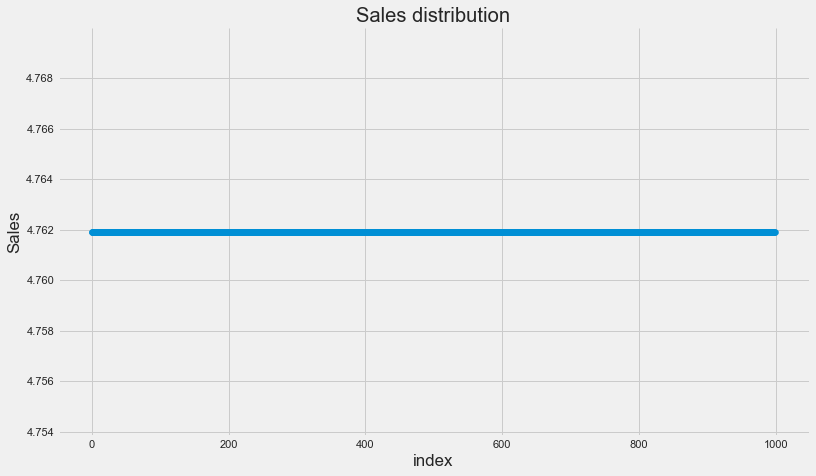

In [104]:
#Plotting a histogram diagram for Checking Gross Margin Percentage
plt.scatter(range(sales.shape[0]), np.sort(sales['gross margin percentage'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

In [105]:
print("Skewness: %f" % sales['gross margin percentage'].skew())
print("Kurtosis: %f" % sales['gross margin percentage'].kurt())

Skewness: 0.000000
Kurtosis: 0.000000


# Creating Isolation Forest to check the anomaly score

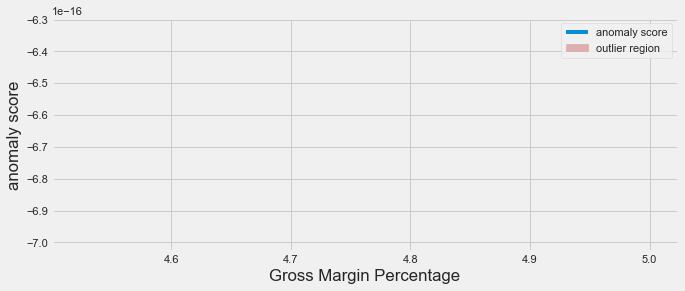

In [106]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(sales['gross margin percentage'].values.reshape(-1, 1))
xx = np.linspace(sales['gross margin percentage'].min(), sales['gross margin percentage'].max(), len(sales)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Gross Margin Percentage')
plt.show();

# So, no outlier in gross margin percentage

# But we would like to check our other columns for anomaly

In [107]:
sales

Invoice ID Branch       City Customer type  Gender  \
Date                                                                       
2019-01-05 13:08:22  750-67-8428      A     Yangon        Member  Female   
2019-03-08 10:29:41  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03 13:23:50  631-41-3108      A     Yangon        Normal    Male   
2019-01-27 20:33:57  123-19-1176      A     Yangon        Member    Male   
2019-02-08 10:37:12  373-73-7910      A     Yangon        Normal    Male   
...                          ...    ...        ...           ...     ...   
2019-01-29 13:46:57  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02 17:16:52  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09 13:22:27  727-02-1313      A     Yangon        Member    Male   
2019-02-22 15:33:16  347-56-2442      A     Yangon        Normal    Male   
2019-02-18 13:28:44  849-09-3807      A     Yangon        Member  Female   

                               Product_line  Unit price  Quantity   Tax 5%  \
Date                                                                         
2019-01-05 13:08:22       Health and beauty       74.69       7.0  26.1415   
2019-03-08 10:29:41  Electronic accessories       15.28       5.0   3.8200   
2019-03-03 13:23:50      Home and lifestyle       46.33       7.0  16.2155   
2019-01-27 20:33:57       Health and beauty       58.22       8.0  23.2880   
2019-02-08 10:37:12       Sports and travel       86.31       7.0  30.2085   
...                                     ...         ...       ...      ...   
2019-01-29 13:46:57       Health and beauty       40.35       1.0   2.0175   
2019-03-02 17:16:52      Home and lifestyle       97.38      10.0  48.6900   
2019-02-09 13:22:27      Food and beverages       31.84       1.0   1.5920   
2019-02-22 15:33:16      Home and lifestyle       65.82       1.0   3.2910   
2019-02-18 13:28:44     Fashion accessories       88.34       7.0  30.9190   

                         Total  ... Rating     long      lat  sales_cluster  \
Date                            ...                                           
2019-01-05 13:08:22   548.9715  ...    9.1  16.8661  96.1951              6   
2019-03-08 10:29:41    80.2200  ...    9.6  19.7633  96.0785              3   
2019-03-03 13:23:50   340.5255  ...    7.4  16.8661  96.1951              4   
2019-01-27 20:33:57   489.0480  ...    8.4  16.8661  96.1951              6   
2019-02-08 10:37:12   634.3785  ...    5.3  16.8661  96.1951              2   
...                        ...  ...    ...      ...      ...            ...   
2019-01-29 13:46:57    42.3675  ...    6.2  19.7633  96.0785              3   
2019-03-02 17:16:52  1022.4900  ...    4.4  21.9588  96.0891              1   
2019-02-09 13:22:27    33.4320  ...    7.7  16.8661  96.1951              3   
2019-02-22 15:33:16    69.1110  ...    4.1  16.8661  96.1951              3   
2019-02-18 13:28:44   649.2990  ...    6.6  16.8661  96.1951              2   

                     Map_Payment  Map_Gender  Map_City  Map_Branch  \
Date                                                                 
2019-01-05 13:08:22            0           0         0           0   
2019-03-08 10:29:41            1           0         1           1   
2019-03-03 13:23:50            2           1         0           0   
2019-01-27 20:33:57            0           1         0           0   
2019-02-08 10:37:12            0           1         0           0   
...                          ...         ...       ...         ...   
2019-01-29 13:46:57            0           1         1           1   
2019-03-02 17:16:52            0           0         2           2   
2019-02-09 13:22:27            1           1         0           0   
2019-02-22 15:33:16            1           1         0           0   
2019-02-18 13:28:44            1           0         0           0   

                     Map_Product_Line  Map_Customer_Type  
Date                

In [108]:
print(sales.shape)

(1000, 24)


Text(0, 0.5, 'Product_line')

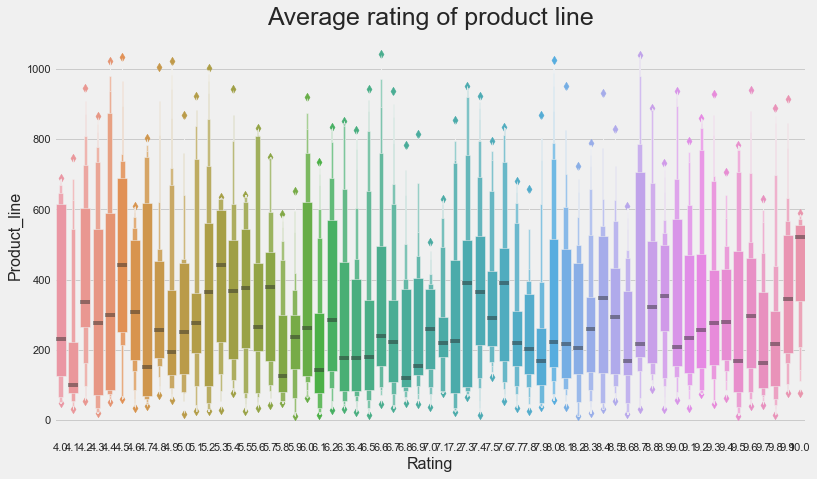

In [109]:
#Checking Average Rating of Product Line in Box-Plot
ax = sns.boxenplot(y = "Total", x = "Rating", data = sales)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product_line", fontsize = 16)

Text(0, 0.5, 'Product Line')

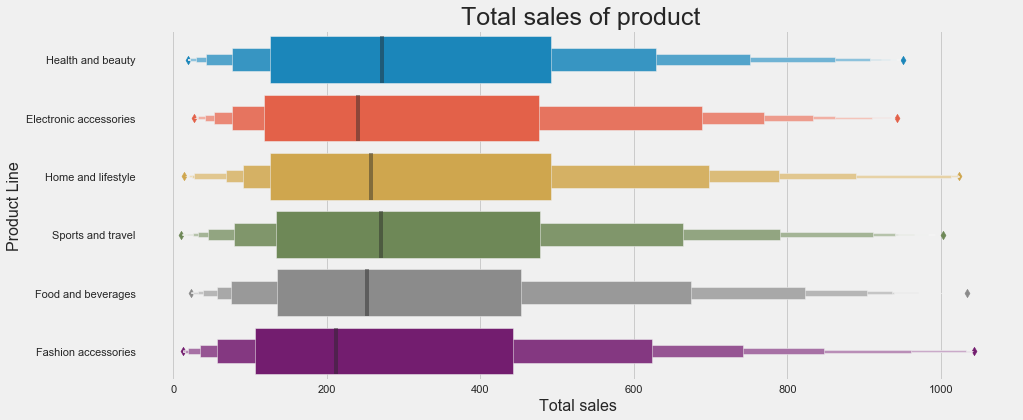

In [110]:
#Total Sales of Product
plt.figure(figsize=(14,6))
ax = sns.boxenplot(y= "Product_line", x= "Total", data = sales)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

In [111]:
#Making Scatter Diagram
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

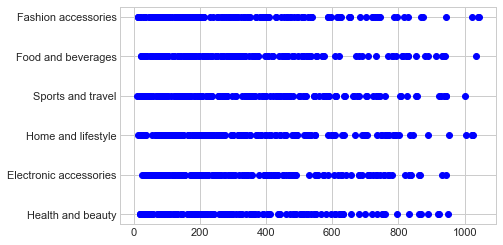

In [112]:
#Setting Total column and Product Line to check for anomalies
x = sales['Total']
y = sales['Product_line']

plt.plot(x, y, 'o', color='Blue');

 ### By Using Scatter Plot we finished the anomaly detection.

# Discussion and Conclusion

### Though, we tried to find customer behavior and analyze data to help the store manager so he can find profitable way.
### So, Finally we completed all steps of this project. We applied 4 models/techniques to our project, those are :

## LINEAR REGRESION 

# Research Questions:

a. Busiest Days are Holidays and New Year

b.Average money spend in a single transaction
People spend in avearge about $322.97

c.Sales Members vs Non-Members
Members: 1040, Non-Members: 1020

d.Branch avearge profit each months

<ul>
A
<li>2019-01-31	<b>325.051500</b></li>
<li>2019-02-28	<b>317.660856</b></li>
<li>2019-03-31	<b>296.528516</b></li>
</ul>
<ul>
B	
<li>2019-01-31	<b>334.919446</b></li>
<li>2019-02-28	<b>315.819000</b></li>
<li>2019-03-31	<b>308.904844</b></li>
</ul>
<ul>
C	
<li>2019-01-31	<b>331.431811</b></li>
<li>2019-02-28	<b>329.349825</b></li>
<li>2019-03-31	<b>350.934368</b></li>
</ul>

e.Branch with the most customer but lower profit

Branch: (min,count)=>	A:(12.6945,340),  B:(18.6375, 332), C:(10.6785, 328)

f.Product lines sales in January , February and March

January- Food & Beverage, February- Fashion Accessories, March- Home & Lifestyle

## K-Means Clustering 

Descriptions: Clusters based on the columns we made clusters of Relationship: Gross Income vs Store Locations, Rating vs Total, Rating vs Gross Income

Scatter Matrix Clusters to check Sale Feature and We found that best cluster is n=7 by using elbow method

## Random Forest Regression

In the random forest regression, we found out the most sold goods are Fashon Accessories and most used payment methods Cash and E-Wallet.
Also, we tried to see all the Sales Features(Product-Line, Unit Price, Quantity, Tax, Customer type, City) in term of Customer Rating.

The mean absolute error is one of a number of ways of comparing forecasts with their eventual outcomes.
The Mean Absolute Error is : 0.032192786885245864 which very low error.

## Anomaly Detection
For anomaly detection, We used Histomgram, Scatter and Box-Plot to check the anomaly values. Also we verified the Gross <b>Margin Percentage</b> by using <b>Isolation Forest</b> Technique to check anomaly.

By using, all of these result, we can do many to things to improvise the supermaket sales.  